In [ ]:
# @title Import library yang akan digunakan

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot
from tensorflow import keras
from IPython.display import display
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams["font.size"] = (12)


In [ ]:
# @title Unduh data
# unduh data lakop
!git clone https://github.com/farispurnama12/Deep.git

Cloning into 'Deep'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 31 (delta 13), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (31/31), 8.09 MiB | 12.05 MiB/s, done.
Resolving deltas: 100% (13/13), done.


# Preprocessing data

In [ ]:
# @title Untuk Lakop
rainfall = pd.read_excel(("/content/Deep/Lakop.xlsx"), sheet_name="rainfall",
                     skiprows=2,
                     names=["date", "time", "raw", "rainfall"])

airtemp = pd.read_excel("/content/Deep/Lakop.xlsx", sheet_name="airtemp",
                     skiprows=2,
                     names=["date", "time", "raw", "airtemp"])

airhum = pd.read_excel("/content/Deep/Lakop.xlsx", sheet_name="airhum",
                     skiprows=2,
                     names=["date", "time", "raw", "airhum"])

windspeed = pd.read_excel("/content/Deep/Lakop.xlsx", sheet_name="windspeed",
                     skiprows=2,
                     names=["date", "time", "raw", "windspeed"])

windir = pd.read_excel("/content/Deep/Lakop.xlsx", sheet_name="windir",
                     skiprows=2,
                     names=["date", "time", "raw", "windir"])

airpress = pd.read_excel("/content/Deep/Lakop.xlsx", sheet_name="airpress",
                     skiprows=2,
                     names=["date", "time", "raw", "airpress"])

uvrad = pd.read_excel("/content/Deep/Lakop.xlsx", sheet_name="uvrad",
                     skiprows=2,
                     names=["date", "time", "raw", "uvrad"])



In [ ]:
tgljam = rainfall["date"]+" "+rainfall["time"]
tgljam = pd.to_datetime(tgljam)
rainfall["datetime"] = tgljam
rainfall = rainfall.drop(columns=["date", "time"])

tgljam = airtemp["date"]+" "+airtemp["time"]
tgljam = pd.to_datetime(tgljam)
airtemp["datetime"] = tgljam
airtemp = airtemp.drop(columns=["date", "time"])

tgljam = airhum["date"]+" "+airhum["time"]
tgljam = pd.to_datetime(tgljam)
airhum["datetime"] = tgljam
airhum = airhum.drop(columns=["date", "time"])

tgljam = windspeed["date"]+" "+windspeed["time"]
tgljam = pd.to_datetime(tgljam)
windspeed["datetime"] = tgljam
windspeed = windspeed.drop(columns=["date", "time"])

tgljam = windir["date"]+" "+windir["time"]
tgljam = pd.to_datetime(tgljam)
windir["datetime"] = tgljam
windir = windir.drop(columns=["date", "time"])

tgljam = airpress["date"]+" "+airpress["time"]
tgljam = pd.to_datetime(tgljam)
airpress["datetime"] = tgljam
airpress = airpress.drop(columns=["date", "time"])

tgljam = uvrad["date"]+" "+uvrad["time"]
tgljam = pd.to_datetime(tgljam)
uvrad["datetime"] = tgljam
uvrad = uvrad.drop(columns=["date", "time"])

In [ ]:
len(rainfall), len(airtemp), len(airhum), len(windspeed), len(windir),len(airpress), len(uvrad)

(10576, 10409, 10398, 10394, 10381, 10377, 10437)

In [ ]:
start= "2022-09-05 12:00:00"
end = "2023-11-27 12:00:00"

In [ ]:
df = pd.DataFrame({'datetime':pd.date_range(start=datetime(2022, 9, 5, hour=12),
                                            end=datetime(2023, 11, 27, hour=12),
                                            freq='H')})

In [ ]:
df

datetime
0     2022-09-05 12:00:00
1     2022-09-05 13:00:00
2     2022-09-05 14:00:00
3     2022-09-05 15:00:00
4     2022-09-05 16:00:00
...                   ...
10748 2023-11-27 08:00:00
10749 2023-11-27 09:00:00
10750 2023-11-27 10:00:00
10751 2023-11-27 11:00:00
10752 2023-11-27 12:00:00

[10753 rows x 1 columns]

In [ ]:
rf = pd.merge(df, rainfall[["datetime", "rainfall"]], on="datetime", how="left")
at = pd.merge(rf, airtemp[["datetime", "airtemp"]], on="datetime", how="left")
ah = pd.merge(at, airhum[["datetime", "airhum"]], on="datetime", how="left")
ws = pd.merge(ah, windspeed[["datetime", "windspeed"]], on="datetime", how="left")
wd = pd.merge(ws, windir[["datetime", "windir"]], on="datetime", how="left")
ap = pd.merge(wd, airpress[["datetime", "airpress"]], on="datetime", how="left")
data = pd.merge(ap, uvrad[["datetime", "uvrad"]], on="datetime", how="left")

In [ ]:
data

datetime  rainfall  airtemp  airhum  windspeed  windir  \
0     2022-09-05 12:00:00       0.0     34.3   61.80       7.93   114.0   
1     2022-09-05 13:00:00       0.0     34.3   64.80       7.60   164.0   
2     2022-09-05 14:00:00       0.0     33.9   62.36       4.35    86.0   
3     2022-09-05 15:00:00       1.2     33.6   65.70       4.53   135.0   
4     2022-09-05 16:00:00       0.0      NaN     NaN        NaN     NaN   
...                   ...       ...      ...     ...        ...     ...   
10748 2023-11-27 08:00:00       0.0     26.5   94.92       3.31   315.0   
10749 2023-11-27 09:00:00       0.0     27.9   91.10       3.48   282.0   
10750 2023-11-27 10:00:00       0.0     29.3   85.90       4.64   326.0   
10751 2023-11-27 11:00:00       0.0     29.7   84.34       4.55   338.0   
10752 2023-11-27 12:00:00       0.0     30.6   78.78       4.90     0.0   

       airpress  uvrad  
0       1007.38    0.0  
1       1006.60    0.0  
2       1005.30    0.0  
3       1004.74    0.0  
4           NaN    NaN  
...         ...    ...  
10748   1009.26    0.0  
10749   1009.50    0.0  
10750   1009.58    0.0  
10751   1008.86    0.0  
10752   1008.10    0.0  

[10753 rows x 8 columns]

In [ ]:
data.to_excel("raw_lakop.xlsx")

In [ ]:
X = []
y = []
length = 3
fut = 1
for i in range(length+fut, len(data)-fut):
    potong = data[i-length-fut:i]
    if potong.isnull().values.any():
        # print("ada nan: ", potong)
        continue
    else:
        X.append(potong[:length])
        y.append(potong[length:]["rainfall"])

In [ ]:
len(X), len(y)

(9358, 9358)

In [ ]:
training_number = int(0.8*len(X))
print(training_number)

7486


In [ ]:
perm = np.random.permutation(len(X))

In [ ]:
perm

array([4225, 6919, 4352, ..., 1232, 4471, 5990])

In [ ]:
cols = ["rainfall", "airtemp", "airhum", "windspeed"]

In [ ]:
X[0][cols].values

array([[ 0.  , 34.3 , 61.8 ,  7.93],
       [ 0.  , 34.3 , 64.8 ,  7.6 ],
       [ 0.  , 33.9 , 62.36,  4.35]])

In [ ]:
y[1].values

array([0.])

In [ ]:
X_array = np.array([xx[cols].values for xx in X])

In [ ]:
y_array = np.array([yy.values for yy in y])

In [ ]:
X_array.shape, y_array.shape

((9358, 3, 4), (9358, 1))

In [ ]:
trainX = X_array[perm[:training_number]]
trainY = y_array[perm[:training_number]]

testX = X_array[perm[training_number:]]
testY = y_array[perm[training_number:]]

In [ ]:
trainX.shape, trainY.shape

((7486, 3, 4), (7486, 1))

In [ ]:
testX.shape, testY.shape

((1872, 3, 4), (1872, 1))

In [ ]:
# @title Normalisasi Data

from sklearn.preprocessing import MinMaxScaler

# Normalizing trainX and testX
scaler_X = MinMaxScaler()
trainX_normalized = scaler_X.fit_transform(trainX.reshape(-1, trainX.shape[-1])).reshape(trainX.shape)
testX_normalized = scaler_X.transform(testX.reshape(-1, testX.shape[-1])).reshape(testX.shape)

# Normalizing trainY and testY
scaler_Y = MinMaxScaler()
trainY_normalized = scaler_Y.fit_transform(trainY.reshape(-1, 1)).reshape(trainY.shape)
testY_normalized = scaler_Y.transform(testY.reshape(-1, 1)).reshape(testY.shape)

# Print the shapes of normalized data
print('Normalized trainX shape: {}'.format(trainX_normalized.shape))
print('Normalized trainY shape: {}'.format(trainY_normalized.shape))
print('Normalized testX shape: {}'.format(testX_normalized.shape))
print('Normalized testY shape: {}'.format(testY_normalized.shape))

Normalized trainX shape: (7486, 3, 4)
Normalized trainY shape: (7486, 1)
Normalized testX shape: (1872, 3, 4)
Normalized testY shape: (1872, 1)


In [ ]:
# trainX sebelum dinormalisasi
trainX

array([[[ 0.2 , 23.9 , 94.92,  1.72],
        [ 0.  , 24.6 , 94.92,  1.72],
        [ 0.  , 26.5 , 94.92,  1.95]],

       [[ 0.  , 23.9 , 94.92,  1.24],
        [ 0.  , 24.  , 94.92,  2.46],
        [ 0.  , 23.5 , 94.92,  1.16]],

       [[ 0.  , 33.6 , 67.2 , 10.05],
        [ 0.  , 29.52, 80.22,  8.97],
        [27.2 , 22.5 , 94.92,  6.5 ]],

       ...,

       [[ 0.  , 28.24, 92.2 ,  4.3 ],
        [ 0.  , 27.5 , 94.92,  2.6 ],
        [ 0.  , 27.  , 94.92,  1.94]],

       [[ 0.  , 25.3 , 94.92,  0.52],
        [ 0.  , 24.9 , 94.92,  0.51],
        [ 0.  , 25.18, 94.92,  0.65]],

       [[ 0.  , 31.3 , 70.38,  4.01],
        [ 0.  , 28.6 , 83.7 ,  3.15],
        [ 0.  , 27.1 , 88.96,  2.67]]])

In [ ]:
# trainX setelah dinormalisasi
trainX_normalized

array([[[0.00268097, 0.61597938, 0.99601259, 0.0046125 ],
        [0.        , 0.63402062, 0.99601259, 0.0046125 ],
        [0.        , 0.68298969, 0.99601259, 0.00522928]],

       [[0.        , 0.61597938, 0.99601259, 0.00332529],
        [0.        , 0.6185567 , 0.99601259, 0.00659694],
        [0.        , 0.6056701 , 0.99601259, 0.00311075]],

       [[0.        , 0.86597938, 0.70514166, 0.02695093],
        [0.        , 0.76082474, 0.84176285, 0.02405471],
        [0.36461126, 0.57989691, 0.99601259, 0.01743095]],

       ...,

       [[0.        , 0.72783505, 0.96747114, 0.01153124],
        [0.        , 0.70876289, 0.99601259, 0.00697238],
        [0.        , 0.69587629, 0.99601259, 0.00520247]],

       [[0.        , 0.65206186, 0.99601259, 0.00139448],
        [0.        , 0.64175258, 0.99601259, 0.00136766],
        [0.        , 0.64896907, 0.99601259, 0.00174309]],

       [[0.        , 0.80670103, 0.73850997, 0.01075355],
        [0.        , 0.7371134 , 0.87827912, 0.00

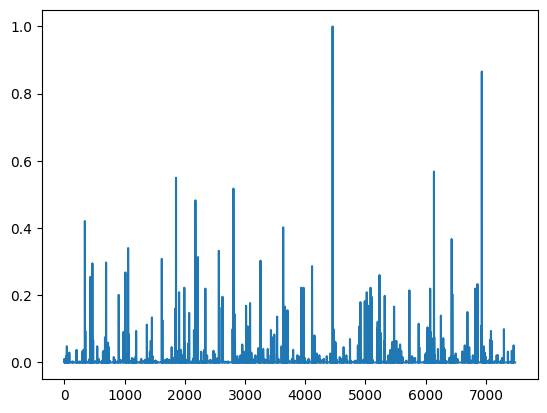

In [ ]:
plt.plot(trainY_normalized)

In [ ]:
# @title Model Vanilla LSTM

# buat model vanilla LSTM
model=Sequential()
model.add(LSTM(units=10, input_shape=(trainX_normalized.shape[1],trainX_normalized.shape[2])))
model.add(Dense(trainY_normalized.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10)                600       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 611 (2.39 KB)
Trainable params: 611 (2.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# @title Epoch dan Batch Size

# fit model untuk pelatihan data
history=model.fit(trainX_normalized, trainY_normalized,
                  epochs=200, batch_size=50,
                  validation_split=0.2, verbose=1, shuffle=False)

Epoch 1/200
120/120 [==============================] - 4s 14ms/step - loss: 0.0030 - val_loss: 0.0010
Epoch 2/200
120/120 [==============================] - 1s 8ms/step - loss: 6.8807e-04 - val_loss: 0.0010
Epoch 3/200
120/120 [==============================] - 1s 7ms/step - loss: 6.6866e-04 - val_loss: 9.9633e-04
Epoch 4/200
120/120 [==============================] - 1s 5ms/step - loss: 6.6198e-04 - val_loss: 9.9600e-04
Epoch 5/200
120/120 [==============================] - 1s 5ms/step - loss: 6.5944e-04 - val_loss: 9.9701e-04
Epoch 6/200
120/120 [==============================] - 1s 6ms/step - loss: 6.5820e-04 - val_loss: 9.9746e-04
Epoch 7/200
120/120 [==============================] - 1s 5ms/step - loss: 6.5750e-04 - val_loss: 9.9726e-04
Epoch 8/200
120/120 [==============================] - 0s 4ms/step - loss: 6.5713e-04 - val_loss: 9.9681e-04
Epoch 9/200
120/120 [==============================] - 0s 4ms/step - loss: 6.5695e-04 - val_loss: 9.9622e-04
Epoch 10/200
120/120 [========

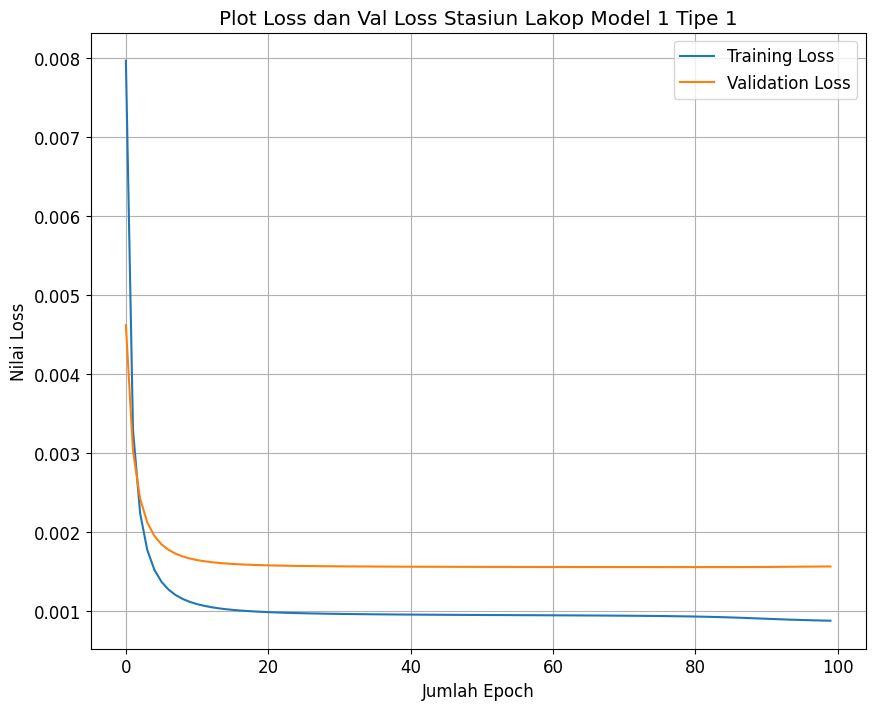

In [ ]:
# plot history loss dan validation loss
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel("Jumlah Epoch")
plt.ylabel("Nilai Loss")
plt.title("Plot Loss dan Val Loss Stasiun Lakop Model 1 Tipe 1")
plt.legend()

In [ ]:
# prediksi data training
trainY_pred= model.predict(trainX_normalized)
trainY_pred = np.maximum(trainY_pred, 0)

#prediksi data testing
testY_pred= model.predict(testX_normalized)
testY_pred= np.maximum(testY_pred, 0)

36/36 [==============================] - 0s 2ms/step


In [ ]:
trainY_pred[trainY_pred<0]

array([], dtype=float32)

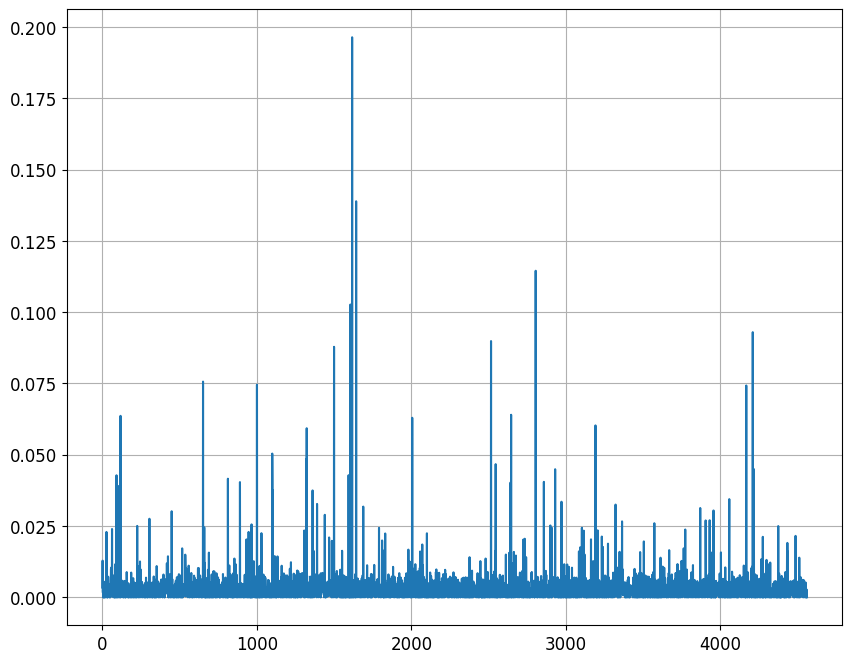

In [ ]:
plt.plot(trainY_pred)

In [ ]:
# denormalisasi nilai hasil prediksi dari data training
trainY_pred_denormalized = scaler_Y.inverse_transform(trainY_pred)

# denormalisasi nilai hasil prediksi dari data testing
testY_pred_denormalized = scaler_Y.inverse_transform(testY_pred)

# denormalisasi nilai aktual dari data training
trainY_denormalized = scaler_Y.inverse_transform(trainY_normalized)

# denormalisasi nilai aktual dari data testing
testY_denormalized = scaler_Y.inverse_transform(testY_normalized)


# Print the shape of denormalized predictions
print('Denormalized trainY_pred_denormalized shape: {}'.format(trainY_pred_denormalized.shape))
print('Denormalized testY_pred_denormalized shape: {}'.format(testY_pred_denormalized.shape))

# Print the shape of denormalized actual
print('Denormalized trainY_denormalized shape: {}'.format(trainY_denormalized.shape))
print('Denormalized testY_denormalized shape: {}'.format(testY_denormalized.shape))

Denormalized trainY_pred_denormalized shape: (4561, 1)
Denormalized testY_pred_denormalized shape: (1141, 1)
Denormalized trainY_denormalized shape: (4561, 1)
Denormalized testY_denormalized shape: (1141, 1)


In [ ]:
# calculate root mean squared error
# hasil RMSE di jadikan bilangan desimal
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(np.mean(np.square(testY_denormalized - testY_pred_denormalized )))
print(f'Root Mean Squared Error on Test Set: {rmse}')

rmse = np.sqrt(np.mean(np.square(trainY_denormalized - trainY_pred_denormalized)))
print(f'Root Mean Squared Error on Train Set: {rmse}')

Root Mean Squared Error on Test Set: 2.6860074893081105
Root Mean Squared Error on Train Set: 1.9785163898285634


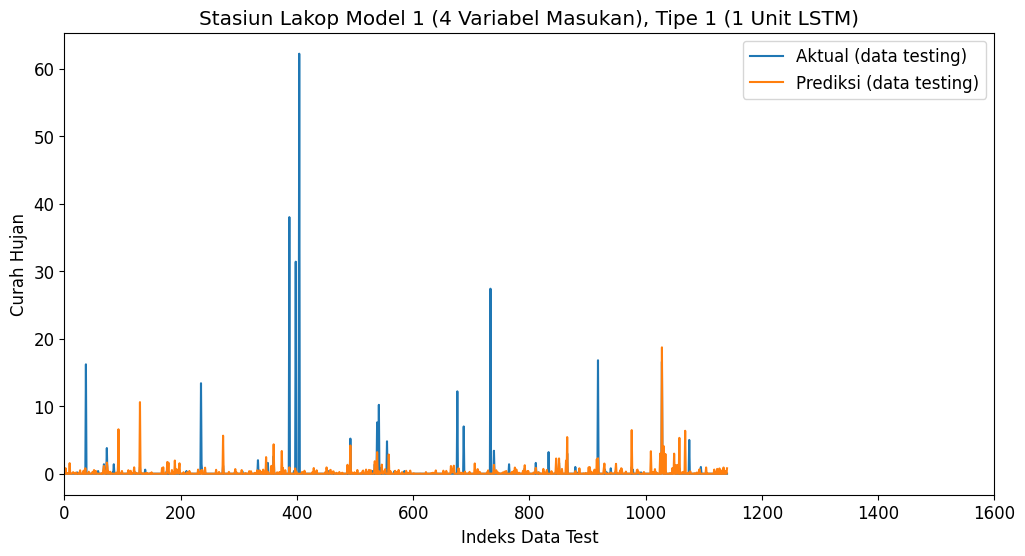

In [ ]:
# @title Plot Hasil Prediksi Data Testing

# Membuat dataframe untuk nilai aktual dan prediksi dari data pengujian
df_result_test = pd.DataFrame({'Aktual': testY_denormalized.flatten(), 'Prediksi': testY_pred_denormalized.flatten()})
#df_result_test['Aktual'] = df_result_test['Aktual'].shift(1)

# Plot data pengujian
plt.figure(figsize=(12, 6))
plt.plot(df_result_test.index, df_result_test['Aktual'], label='Aktual (data testing)')
plt.plot(df_result_test.index, df_result_test['Prediksi'], label='Prediksi (data testing)')
plt.title('Stasiun Lakop Model 1 (4 Variabel Masukan), Tipe 1 (1 Unit LSTM)')
plt.xlabel('Indeks Data Test')
plt.ylabel('Curah Hujan')
plt.xlim([0,1600])
plt.legend()
plt.grid()
plt.show()

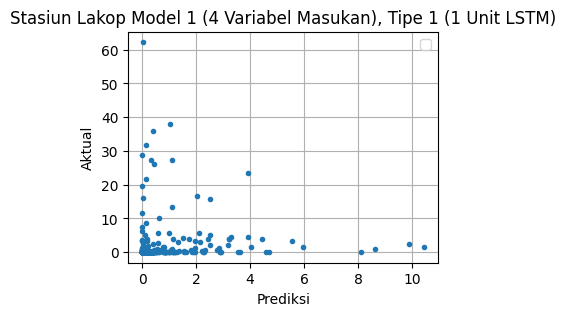

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(df_result_test['Prediksi'], df_result_test['Aktual'], '.')
plt.title('Stasiun Lakop Model 1 (4 Variabel Masukan), Tipe 1 (1 Unit LSTM)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# @title Download Data Prediksi
# Membuat DataFrame dengan nilai prediksi dan aktual

df_result_test.to_excel("Lakop_model1_Tipe1.xlsx", index=True)

# Menampilkan DataFrame
from IPython.display import display
# Menampilkan DataFrame
display(df_result_test)

Aktual  Prediksi
0        0.0  0.038561
1        1.4  5.952396
2        0.0  0.013038
3        0.0  0.000000
4        0.0  0.091230
...      ...       ...
1867     0.0  0.000000
1868     0.0  0.000000
1869     0.0  0.000000
1870     0.0  0.000000
1871     0.0  0.000000

[1872 rows x 2 columns]

In [ ]:
# DATA TESTING
# Menentukan ambang batas untuk menentukan apakah hujan atau tidak
threshold = 0.5 # ambang batas penentu hujan atau tidak hujan

# Menambahkan kolom 'Hujan' berdasarkan threshold
df_result_test['Hujan_Aktual'] = np.where(df_result_test['Aktual'] >= threshold, 'Hujan', 'Tidak Hujan')
df_result_test['Hujan_Prediksi'] = np.where(df_result_test['Prediksi'] >= threshold, 'Hujan', 'Tidak Hujan')

from IPython.display import display
# Menampilkan DataFrame
display(df_result_test)

Aktual  Prediksi Hujan_Aktual Hujan_Prediksi
0        0.0  0.038561  Tidak Hujan    Tidak Hujan
1        1.4  5.952396        Hujan          Hujan
2        0.0  0.013038  Tidak Hujan    Tidak Hujan
3        0.0  0.000000  Tidak Hujan    Tidak Hujan
4        0.0  0.091230  Tidak Hujan    Tidak Hujan
...      ...       ...          ...            ...
1867     0.0  0.000000  Tidak Hujan    Tidak Hujan
1868     0.0  0.000000  Tidak Hujan    Tidak Hujan
1869     0.0  0.000000  Tidak Hujan    Tidak Hujan
1870     0.0  0.000000  Tidak Hujan    Tidak Hujan
1871     0.0  0.000000  Tidak Hujan    Tidak Hujan

[1872 rows x 4 columns]

In [ ]:
# @title Nilai Persentase CH data Testing

# Mencari Nilai Persentase Curah Hujan dan Tidak Hujan DATA TESTING

# Menghitung jumlah data pada setiap kategori
jumlah_hujan_prediksi_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Hujan') & (df_result_test['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_test['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_tidak_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_test['Prediksi'] < threshold)].shape[0]
jumlah_hujan_prediksi_tidak_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Hujan') & (df_result_test['Prediksi'] < threshold)].shape[0]

# Menghitung total data
total_data = df_result_test.shape[0]

# Menghitung persentase
persentase_hujan_prediksi_hujan = (jumlah_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_hujan = (jumlah_tidak_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_tidak_hujan = (jumlah_tidak_hujan_prediksi_tidak_hujan / total_data) * 100
persentase_hujan_prediksi_tidak_hujan = (jumlah_hujan_prediksi_tidak_hujan / total_data) * 100

# Menampilkan hasil
print(f'Persentase Hujan Aktual dan Prediksi Hujan: {persentase_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Hujan: {persentase_tidak_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: {persentase_tidak_hujan_prediksi_tidak_hujan:.2f}%')
print(f'Persentase Hujan Aktual dan Prediksi Tidak Hujan: {persentase_hujan_prediksi_tidak_hujan:.2f}%')


Persentase Hujan Aktual dan Prediksi Hujan: 2.30%
Persentase Tidak Hujan Aktual dan Prediksi Hujan: 2.30%
Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: 93.64%
Persentase Hujan Aktual dan Prediksi Tidak Hujan: 1.76%


In [ ]:
# Buat Confusion Matrix Untuk Hasil Prediksi DATA TESTING
from sklearn.metrics import confusion_matrix

# Mengubah prediksi menjadi biner berdasarkan ambang batas (threshold)
df_result_test['Prediksi_Biner'] = df_result_test['Prediksi'].apply(lambda x: 'Hujan' if x >= threshold else 'Tidak Hujan')

# Menghitung matriks kebingungan
c_matrix = confusion_matrix(df_result_test['Hujan_Aktual'], df_result_test['Hujan_Prediksi'])

# Menampilkan matriks kebingungan
print(c_matrix)

[[  43   33]
 [  43 1753]]


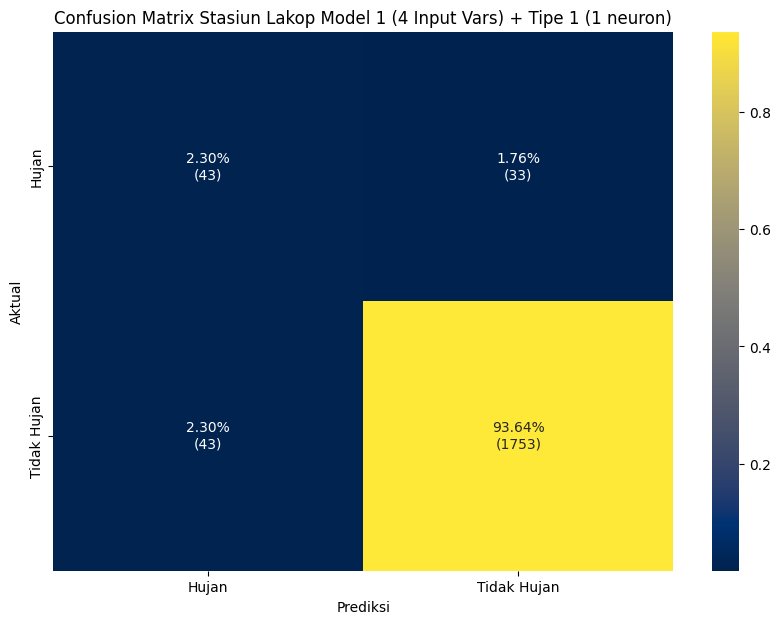

In [ ]:
# @title Confusion Matrix Data Test
# Membuat DataFrame dari matriks kebingungan
df_cm = pd.DataFrame(c_matrix, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Menghitung persentase untuk setiap kelas dalam matriks kebingungan
c_matrix_percentage = c_matrix / np.sum(c_matrix)

# Membuat DataFrame dari matriks kebingungan persentase
df_cm_percentage = pd.DataFrame(c_matrix_percentage, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Membuat anotasi baru dengan jumlah dan persentase
annotations = df_cm_percentage.applymap(lambda x: '{:.2%}'.format(x)) + '\n(' + df_cm.astype(str) + ')'

# Membuat heatmap dari DataFrame
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_percentage, annot=annotations, fmt='', cmap='cividis')
plt.title('Confusion Matrix Stasiun Lakop Model 1 (4 Input Vars) + Tipe 1 (1 neuron)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

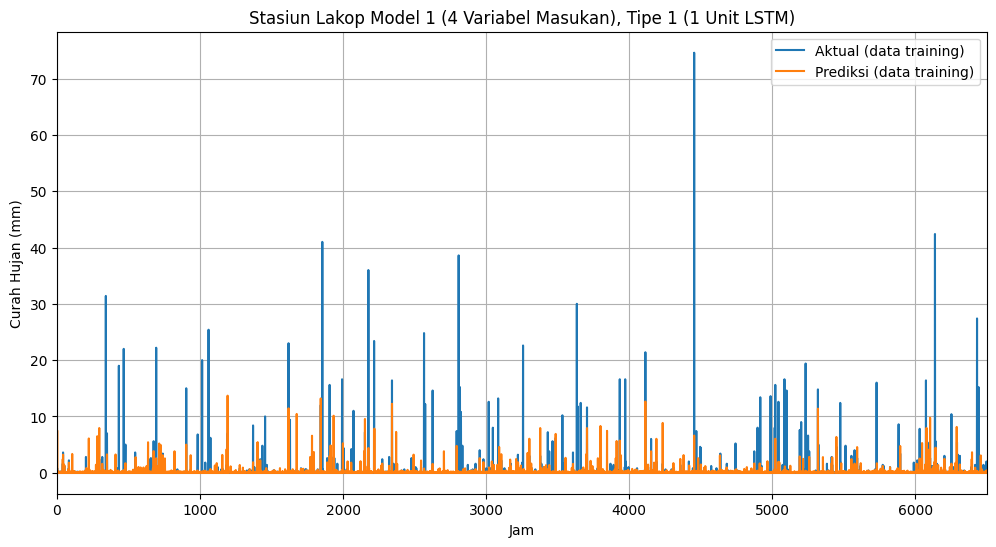

In [ ]:
# @title Plot Hasil Prediksi Data Training

# Membuat dataframe untuk nilai aktual dan prediksi dari data pengujian
df_result_train = pd.DataFrame({'Aktual': trainY_denormalized.flatten(), 'Prediksi': trainY_pred_denormalized.flatten()})
#df_result_train['Aktual'] = df_result_train['Aktual'].shift(1)

# Plot data pengujian
plt.figure(figsize=(12, 6))
plt.plot(df_result_train.index, df_result_train['Aktual'], label='Aktual (data training)')
plt.plot(df_result_train.index, df_result_train['Prediksi'], label='Prediksi (data training)')
plt.title('Stasiun Lakop Model 1 (4 Variabel Masukan), Tipe 1 (1 Unit LSTM)')
plt.xlabel('Jam')
plt.ylabel('Curah Hujan (mm)')
plt.xlim([0,6500])
plt.grid()
plt.legend()
plt.show()

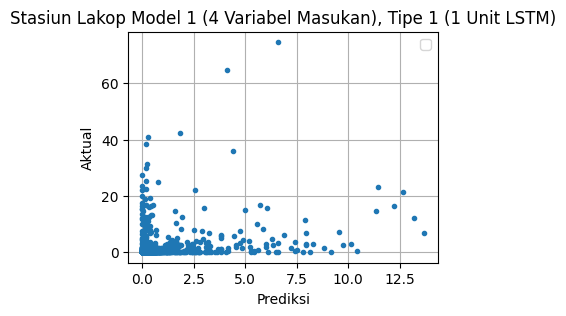

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(df_result_train['Prediksi'], df_result_train['Aktual'], '.')
plt.title('Stasiun Lakop Model 1 (4 Variabel Masukan), Tipe 1 (1 Unit LSTM)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
# plt.xlim([0,6500])
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Membuat DataFrame dengan nilai prediksi dan aktual
df_result_train = pd.DataFrame({'Aktual': trainY_denormalized.flatten(), 'Prediksi': trainY_pred_denormalized.flatten()})
# df_result_train['Aktual'] = df_result_train['Aktual'].shift(1)
# Menampilkan DataFrame
from IPython.display import display
# Menampilkan DataFrame
display(df_result_train)

Aktual  Prediksi
0        0.2  0.000000
1        0.0  0.000000
2        0.8  7.513394
3        0.0  0.000000
4        0.0  0.000000
...      ...       ...
7481     0.0  0.000000
7482     0.0  0.131241
7483     0.0  0.040720
7484     0.0  0.000000
7485     0.0  0.213383

[7486 rows x 2 columns]

In [ ]:
# DATA TRAINING
# Menentukan ambang batas untuk menentukan apakah hujan atau tidak
threshold = 0.5  # Anda dapat menyesuaikan nilai threshold sesuai kebutuhan

# Menambahkan kolom 'Hujan' berdasarkan threshold
df_result_train['Hujan_Aktual'] = np.where(df_result_train['Aktual'] >= threshold, 'Hujan', 'Tidak Hujan')
df_result_train['Hujan_Prediksi'] = np.where(df_result_train['Prediksi'] >= threshold, 'Hujan', 'Tidak Hujan')

from IPython.display import display
# Menampilkan DataFrame
display(df_result_train)

Aktual  Prediksi Hujan_Aktual Hujan_Prediksi
0        0.2  0.000000  Tidak Hujan    Tidak Hujan
1        0.0  0.000000  Tidak Hujan    Tidak Hujan
2        0.8  7.513394        Hujan          Hujan
3        0.0  0.000000  Tidak Hujan    Tidak Hujan
4        0.0  0.000000  Tidak Hujan    Tidak Hujan
...      ...       ...          ...            ...
7481     0.0  0.000000  Tidak Hujan    Tidak Hujan
7482     0.0  0.131241  Tidak Hujan    Tidak Hujan
7483     0.0  0.040720  Tidak Hujan    Tidak Hujan
7484     0.0  0.000000  Tidak Hujan    Tidak Hujan
7485     0.0  0.213383  Tidak Hujan    Tidak Hujan

[7486 rows x 4 columns]

In [ ]:
# Menghitung jumlah data pada setiap kategori
jumlah_hujan_prediksi_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Hujan') & (df_result_train['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_train['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_tidak_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_train['Prediksi'] < threshold)].shape[0]
jumlah_hujan_prediksi_tidak_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Hujan') & (df_result_train['Prediksi'] < threshold)].shape[0]

# Menghitung total data
total_data = df_result_train.shape[0]

# Menghitung persentase
persentase_hujan_prediksi_hujan = (jumlah_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_hujan = (jumlah_tidak_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_tidak_hujan = (jumlah_tidak_hujan_prediksi_tidak_hujan / total_data) * 100
persentase_hujan_prediksi_tidak_hujan = (jumlah_hujan_prediksi_tidak_hujan / total_data) * 100

# Menampilkan hasil
print(f'Persentase Hujan Aktual dan Prediksi Hujan: {persentase_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Hujan: {persentase_tidak_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: {persentase_tidak_hujan_prediksi_tidak_hujan:.2f}%')
print(f'Persentase Hujan Aktual dan Prediksi Tidak Hujan: {persentase_hujan_prediksi_tidak_hujan:.2f}%')


Persentase Hujan Aktual dan Prediksi Hujan: 1.94%
Persentase Tidak Hujan Aktual dan Prediksi Hujan: 1.76%
Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: 94.22%
Persentase Hujan Aktual dan Prediksi Tidak Hujan: 2.08%


In [ ]:
# Buat Confusion Matrix Untuk Hasil Prediksi DATA TESTING
from sklearn.metrics import confusion_matrix

# Mengubah prediksi menjadi biner berdasarkan ambang batas (threshold)
df_result_train['Prediksi_Biner'] = df_result_train['Prediksi'].apply(lambda x: 'Hujan' if x >= threshold else 'Tidak Hujan')

# Menghitung matriks kebingungan
c_matrix = confusion_matrix(df_result_train['Hujan_Aktual'], df_result_train['Hujan_Prediksi'])

# Menampilkan matriks kebingungan
print(c_matrix)

[[ 145  156]
 [ 132 7053]]


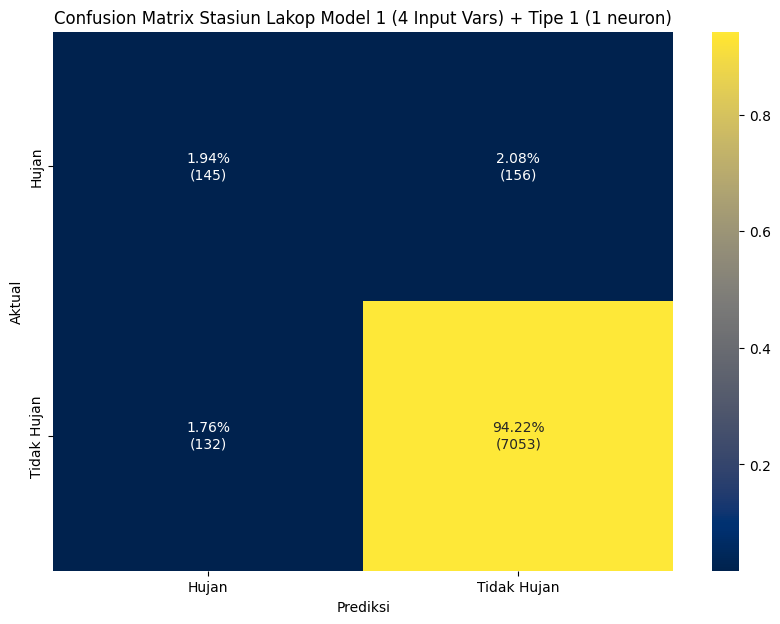

In [ ]:
# @title Confusion Matrix Data Test
# Membuat DataFrame dari matriks kebingungan
df_cm = pd.DataFrame(c_matrix, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Menghitung persentase untuk setiap kelas dalam matriks kebingungan
c_matrix_percentage = c_matrix / np.sum(c_matrix)

# Membuat DataFrame dari matriks kebingungan persentase
df_cm_percentage = pd.DataFrame(c_matrix_percentage, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Membuat anotasi baru dengan jumlah dan persentase
annotations = df_cm_percentage.applymap(lambda x: '{:.2%}'.format(x)) + '\n(' + df_cm.astype(str) + ')'

# Membuat heatmap dari DataFrame
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_percentage, annot=annotations, fmt='', cmap='cividis')
plt.title('Confusion Matrix Stasiun Lakop Model 1 (4 Input Vars) + Tipe 1 (1 neuron)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Panduan Pembuatan Model dari Pak Ridlo

In [ ]:
# @title Baca Dataset
data=pd.read_csv('/content/Deep/Lakop_Station.csv')
data

datetime  rainfall  airtemp  airhum  windspeed    windir  \
0      2022-09-05 12:00:00       0.0     34.3   61.80       7.93  0.619521   
1      2022-09-05 13:00:00       0.0     34.3   64.80       7.60  0.803775   
2      2022-09-05 14:00:00       0.0     33.9   62.36       4.35 -0.383698   
3      2022-09-05 15:00:00       1.2     33.6   65.70       4.53 -0.996088   
4      2022-09-05 16:00:00       0.0      NaN     NaN        NaN       NaN   
...                    ...       ...      ...     ...        ...       ...   
10748  2023-11-27 08:00:00       0.0     26.5   94.92       3.31  0.666916   
10749  2023-11-27 09:00:00       0.0     27.9   91.10       3.48  0.736213   
10750  2023-11-27 10:00:00       0.0     29.3   85.90       4.64  0.748078   
10751  2023-11-27 11:00:00       0.0     29.7   84.34       4.55  0.275192   
10752  2023-11-27 12:00:00       0.0     30.6   78.78       4.90  1.000000   

       airpress  uvrad       DoY       Jam  
0       1007.38    0.0  0.904117  0.843854  
1       1006.60    0.0  0.904117  0.907447  
2       1005.30    0.0  0.904117  0.136737  
3       1004.74    0.0  0.904117 -0.759688  
4           NaN    NaN  0.904117 -0.957659  
...         ...    ...       ...       ...  
10748   1009.26    0.0  0.966420 -0.145500  
10749   1009.50    0.0  0.966420 -0.911130  
10750   1009.58    0.0  0.966420 -0.839072  
10751   1008.86    0.0  0.966420  0.004426  
10752   1008.10    0.0  0.966420  0.843854  

[10753 rows x 10 columns]

In [ ]:
#X = []
#y = []
#length = 24
#fut = 1
#for i in range(length+fut, len(data)-fut):
 #   potong = data[i-length-fut:i]
  #  if potong.isnull().values.any():
        # print("ada nan: ", potong)
   #     continue
    #else:
     #   X.append(potong[:length])
      #  y.append(potong[length:]["rainfall"])

In [ ]:
# @title Sequensial dan interpolasi Linear
X = []
y = []
length = 3
fut = 1
for i in range(length+fut, len(data)-fut):
    potong = data[i-length-fut:i]
    missing_count = potong.isnull().sum()
    if missing_count.any() > 2:
        # Jika lebih dari 2 jam data yang kosong, lanjut ke iterasi berikutnya
        continue
    elif missing_count.any() == 2:
        # Jika ada dua jam data yang kosong berurutan, interpolasi
        idx_missing = potong[potong.isnull()].index
        if len(idx_missing) == 2 and idx_missing[1] - idx_missing[0] == 1:
            potong.iloc[idx_missing[0]:idx_missing[1]+1] = potong.iloc[idx_missing[0]:idx_missing[1]+1].interpolate(method='linear', inplace=True)

    if potong.isnull().values.any():
        # print("ada nan: ", potong)
        continue
    else:
        X.append(potong[:length])
        y.append(potong[length:]["rainfall"])

In [ ]:
len(X), len(y)

(5702, 5702)

In [ ]:
X

[               datetime  rainfall  airtemp  airhum  windspeed    windir  \
 5   2022-09-05 17:00:00       0.0    30.10   71.56       7.55  0.999961   
 6   2022-09-05 18:00:00       0.0    28.08   83.38       1.59 -0.598460   
 7   2022-09-05 19:00:00       0.0    27.00   88.32       0.80 -0.110387   
 8   2022-09-05 20:00:00       0.0    26.70   91.70       0.96 -0.110387   
 9   2022-09-05 21:00:00       0.0    25.60   94.92       1.46  0.883863   
 10  2022-09-05 22:00:00       0.0    24.70   94.92       0.43  0.809028   
 11  2022-09-05 23:00:00       0.0    24.80   94.92       0.93 -0.809010   
 12  2022-09-06 00:00:00       0.0    24.70   94.92       0.32  0.979355   
 13  2022-09-06 01:00:00       0.0    24.18   94.92       0.00  0.979355   
 14  2022-09-06 02:00:00       0.0    24.20   94.92       0.43  0.925136   
 15  2022-09-06 03:00:00       0.0    24.12   94.92       0.60 -0.907459   
 16  2022-09-06 04:00:00       0.0    24.00   94.92       0.58 -0.996088   
 17  2022-09

In [ ]:
# @title Shuffle dan bagi data latih dan data uji
#buat rentang data latih
training_number = int(0.8*len(X))
print(training_number)
#shuffle dataset
perm = np.random.permutation(len(X))
#pilih colom target
cols = ["rainfall", "airtemp", "airhum", "windspeed"]
#buat list dataset menjadi array
X_array = np.array([xx[cols].values for xx in X])
y_array = np.array([yy.values for yy in y])
#pisahkan data latih 80%
trainX = X_array[perm[:training_number]]
trainY = y_array[perm[:training_number]]
#pisahkan datauji 20%
testX = X_array[perm[training_number:]]
testY = y_array[perm[training_number:]]

7486


In [ ]:
perm = np.random.permutation(len(X))

In [ ]:
perm

array([2016, 4829, 3965, ..., 4656,  519, 5163])

In [ ]:
cols = ["rainfall", "airtemp", "airhum", "windspeed"]

In [ ]:
X[0][cols].values

array([[ 0.  , 30.1 , 71.56,  7.55],
       [ 0.  , 28.08, 83.38,  1.59],
       [ 0.  , 27.  , 88.32,  0.8 ],
       [ 0.  , 26.7 , 91.7 ,  0.96],
       [ 0.  , 25.6 , 94.92,  1.46],
       [ 0.  , 24.7 , 94.92,  0.43],
       [ 0.  , 24.8 , 94.92,  0.93],
       [ 0.  , 24.7 , 94.92,  0.32],
       [ 0.  , 24.18, 94.92,  0.  ],
       [ 0.  , 24.2 , 94.92,  0.43],
       [ 0.  , 24.12, 94.92,  0.6 ],
       [ 0.  , 24.  , 94.92,  0.58],
       [ 0.  , 24.  , 94.92,  0.1 ],
       [ 0.  , 24.1 , 94.92,  0.19],
       [ 0.  , 24.5 , 94.92,  0.31],
       [ 0.  , 25.  , 94.92,  0.52],
       [ 0.  , 26.2 , 94.92,  2.05],
       [ 0.  , 27.38, 91.1 ,  0.93],
       [ 0.  , 27.5 , 89.7 ,  2.23],
       [ 0.  , 28.7 , 83.26,  1.59],
       [ 0.  , 30.8 , 74.52,  2.39],
       [ 0.  , 27.3 , 87.4 ,  4.37],
       [ 0.  , 26.4 , 92.6 ,  2.76],
       [ 0.  , 26.86, 90.34,  3.22]])

In [ ]:
y[1].values

array([0.])

In [ ]:
X_array = np.array([xx[cols].values for xx in X])

In [ ]:
y_array = np.array([yy.values for yy in y])

In [ ]:
X_array.shape, y_array.shape

((5702, 24, 4), (5702, 1))

In [ ]:
trainX = X_array[perm[:training_number]]
trainY = y_array[perm[:training_number]]

testX = X_array[perm[training_number:]]
testY = y_array[perm[training_number:]]

In [ ]:
trainX.shape, trainY.shape

((4561, 24, 4), (4561, 1))

In [ ]:
testX.shape, testY.shape

((1141, 24, 4), (1141, 1))

In [ ]:
# @title Normalisasi Data

from sklearn.preprocessing import MinMaxScaler

# Normalizing trainX and testX
scaler_X = MinMaxScaler()
trainX_normalized = scaler_X.fit_transform(trainX.reshape(-1, trainX.shape[-1])).reshape(trainX.shape)
testX_normalized = scaler_X.transform(testX.reshape(-1, testX.shape[-1])).reshape(testX.shape)

# Normalizing trainY and testY
scaler_Y = MinMaxScaler()
trainY_normalized = scaler_Y.fit_transform(trainY.reshape(-1, 1)).reshape(trainY.shape)
testY_normalized = scaler_Y.transform(testY.reshape(-1, 1)).reshape(testY.shape)

# Print the shapes of normalized data
print('Normalized trainX shape: {}'.format(trainX_normalized.shape))
print('Normalized trainY shape: {}'.format(trainY_normalized.shape))
print('Normalized testX shape: {}'.format(testX_normalized.shape))
print('Normalized testY shape: {}'.format(testY_normalized.shape))

Normalized trainX shape: (7486, 3, 4)
Normalized trainY shape: (7486, 1)
Normalized testX shape: (1872, 3, 4)
Normalized testY shape: (1872, 1)


In [ ]:
# trainX sebelum dinormalisasi
trainX

array([[[ 0.  , 29.1 , 81.24,  6.55],
        [ 0.  , 27.9 , 93.7 ,  1.8 ],
        [ 0.4 , 25.  , 94.92,  3.95],
        ...,
        [ 0.  , 33.36, 65.98,  8.92],
        [ 0.  , 32.04, 72.46,  9.13],
        [ 0.  , 31.12, 74.62,  9.2 ]],

       [[ 0.  , 25.6 , 94.66,  4.08],
        [ 0.  , 28.5 , 84.28,  6.19],
        [ 0.  , 30.34, 77.72,  5.54],
        ...,
        [ 0.  , 21.72, 94.92,  1.14],
        [ 0.  , 21.76, 94.92,  1.04],
        [ 0.  , 22.4 , 94.92,  0.83]],

       [[ 0.  , 30.6 , 83.8 ,  2.59],
        [ 0.  , 32.  , 76.78,  5.31],
        [ 0.  , 32.26, 74.6 ,  4.62],
        ...,
        [ 1.  , 24.52, 94.92,  2.63],
        [ 0.  , 25.4 , 94.92,  1.51],
        [ 0.  , 27.5 , 94.92,  1.47]],

       ...,

       [[ 0.  , 31.9 , 68.  ,  5.94],
        [ 0.  , 33.16, 64.14,  8.2 ],
        [ 0.  , 31.9 , 67.3 ,  8.58],
        ...,
        [ 0.  , 25.9 , 93.38,  2.85],
        [ 0.  , 28.7 , 86.76,  6.58],
        [ 0.  , 29.6 , 79.6 ,  8.62]],

       [[ 0.  ,

In [ ]:
# trainX setelah dinormalisasi
trainX_normalized

array([[[0.        , 0.7578125 , 0.8524659 , 0.01756503],
        [0.        , 0.7265625 , 0.98321091, 0.00482703],
        [0.00536193, 0.65104167, 0.99601259, 0.01059265],
        ...,
        [0.        , 0.86875   , 0.69233998, 0.02392062],
        [0.        , 0.834375  , 0.76033578, 0.02448378],
        [0.        , 0.81041667, 0.78300105, 0.02467149]],

       [[0.        , 0.66666667, 0.99328437, 0.01094127],
        [0.        , 0.7421875 , 0.88436516, 0.01659962],
        [0.        , 0.79010417, 0.81552991, 0.01485653],
        ...,
        [0.        , 0.565625  , 0.99601259, 0.00305712],
        [0.        , 0.56666667, 0.99601259, 0.00278895],
        [0.        , 0.58333333, 0.99601259, 0.0022258 ]],

       [[0.        , 0.796875  , 0.87932844, 0.00694556],
        [0.        , 0.83333333, 0.80566632, 0.01423974],
        [0.        , 0.84010417, 0.78279119, 0.01238938],
        ...,
        [0.01340483, 0.63854167, 0.99601259, 0.00705283],
        [0.        , 0.661458

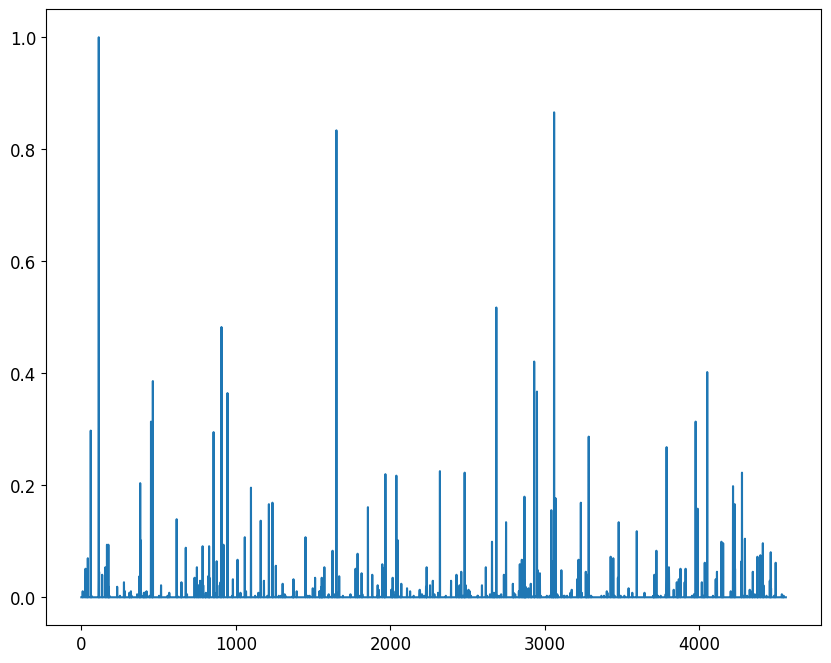

In [ ]:
plt.plot(trainY_normalized)

In [ ]:
# @title Model Vanilla LSTM

# buat model vanilla LSTM
model=Sequential()
model.add(LSTM(units=1, input_shape=(trainX_normalized.shape[1],trainX_normalized.shape[2])))
model.add(Dense(trainY_normalized.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 1)                 24        
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 26 (104.00 Byte)
Trainable params: 26 (104.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# @title Epoch dan Batch Size

# fit model untuk pelatihan data
history=model.fit(trainX_normalized, trainY_normalized,
                  epochs=200, batch_size=50,
                  validation_split=0.2, verbose=1, shuffle=False)

Epoch 1/200
120/120 [==============================] - 3s 7ms/step - loss: 0.0036 - val_loss: 0.0022
Epoch 2/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 3/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/200
120/120 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 5/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 6/200
120/120 [==============================] - 0s 3ms/step - loss: 9.8987e-04 - val_loss: 0.0010
Epoch 7/200
120/120 [==============================] - 0s 4ms/step - loss: 9.5846e-04 - val_loss: 9.9070e-04
Epoch 8/200
120/120 [==============================] - 1s 5ms/step - loss: 9.3762e-04 - val_loss: 9.7477e-04
Epoch 9/200
120/120 [==============================] - 1s 4ms/step - loss: 9.2302e-04 - val_loss: 9.6312e-04
Epoch 10/200
120/120 [==============================] - 1s 4ms/

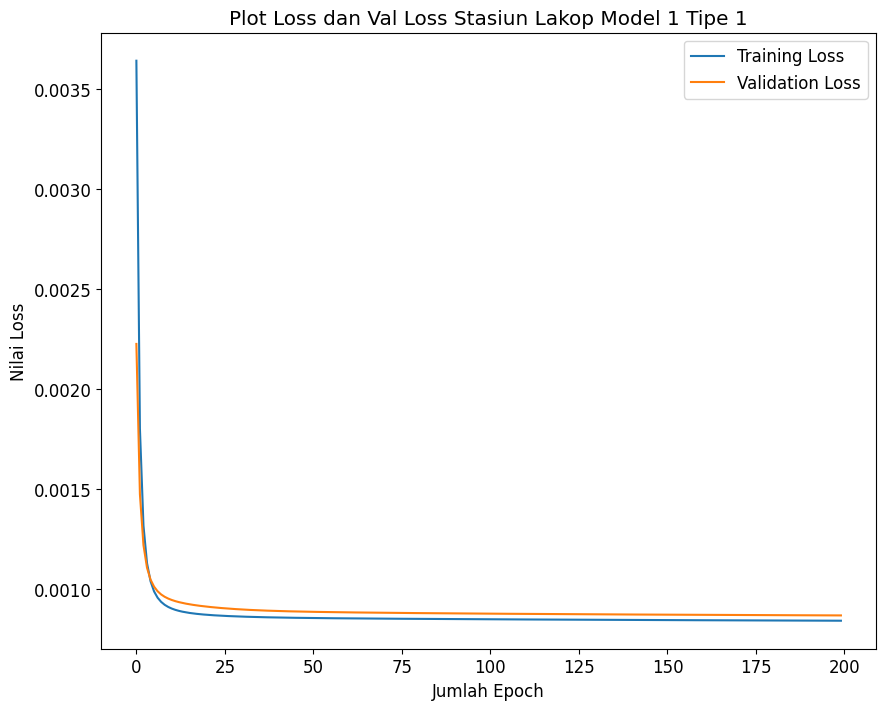

In [ ]:
# @title Plot Loss dan Val Loss
# plot history loss dan validation loss
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel("Jumlah Epoch")
plt.ylabel("Nilai Loss")
plt.title("Plot Loss dan Val Loss Stasiun Lakop Model 1 Tipe 1")
plt.legend()

In [ ]:
# @title Prediksi LSTM
# prediksi data training
trainY_pred= model.predict(trainX_normalized)
trainY_pred = np.maximum(trainY_pred, 0)

#prediksi data testing
testY_pred= model.predict(testX_normalized)
testY_pred= np.maximum(testY_pred, 0)

59/59 [==============================] - 0s 2ms/step


In [ ]:
trainY_pred[trainY_pred<0]

array([], dtype=float32)

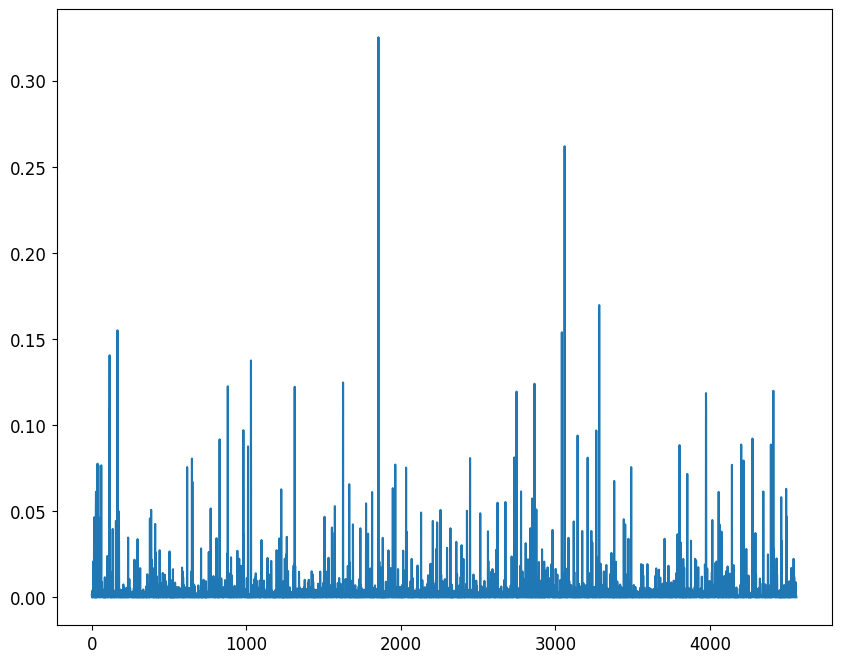

In [ ]:
plt.plot(trainY_pred)

In [ ]:
# @title Denormalisasi Data
# denormalisasi nilai hasil prediksi dari data training
trainY_pred_denormalized = scaler_Y.inverse_transform(trainY_pred)

# denormalisasi nilai hasil prediksi dari data testing
testY_pred_denormalized = scaler_Y.inverse_transform(testY_pred)

# denormalisasi nilai aktual dari data training
trainY_denormalized = scaler_Y.inverse_transform(trainY_normalized)

# denormalisasi nilai aktual dari data testing
testY_denormalized = scaler_Y.inverse_transform(testY_normalized)


# Print the shape of denormalized predictions
print('Denormalized trainY_pred_denormalized shape: {}'.format(trainY_pred_denormalized.shape))
print('Denormalized testY_pred_denormalized shape: {}'.format(testY_pred_denormalized.shape))

# Print the shape of denormalized actual
print('Denormalized trainY_denormalized shape: {}'.format(trainY_denormalized.shape))
print('Denormalized testY_denormalized shape: {}'.format(testY_denormalized.shape))

Denormalized trainY_pred_denormalized shape: (7486, 1)
Denormalized testY_pred_denormalized shape: (1872, 1)
Denormalized trainY_denormalized shape: (7486, 1)
Denormalized testY_denormalized shape: (1872, 1)


In [ ]:
# @title RMSE
# calculate root mean squared error
# hasil RMSE di jadikan bilangan desimal
from sklearn.metrics import mean_squared_error
#Cari RMSE Train
rmse = np.sqrt(np.mean(np.square(trainY_denormalized - trainY_pred_denormalized)))
print(f'Root Mean Squared Error on Train Set: {rmse}')
#Cari RMSE Test
rmse = np.sqrt(np.mean(np.square(testY_denormalized - testY_pred_denormalized )))
print(f'Root Mean Squared Error on Test Set: {rmse}')

Root Mean Squared Error on Train Set: 2.1674741748140463
Root Mean Squared Error on Test Set: 1.9852962872981696


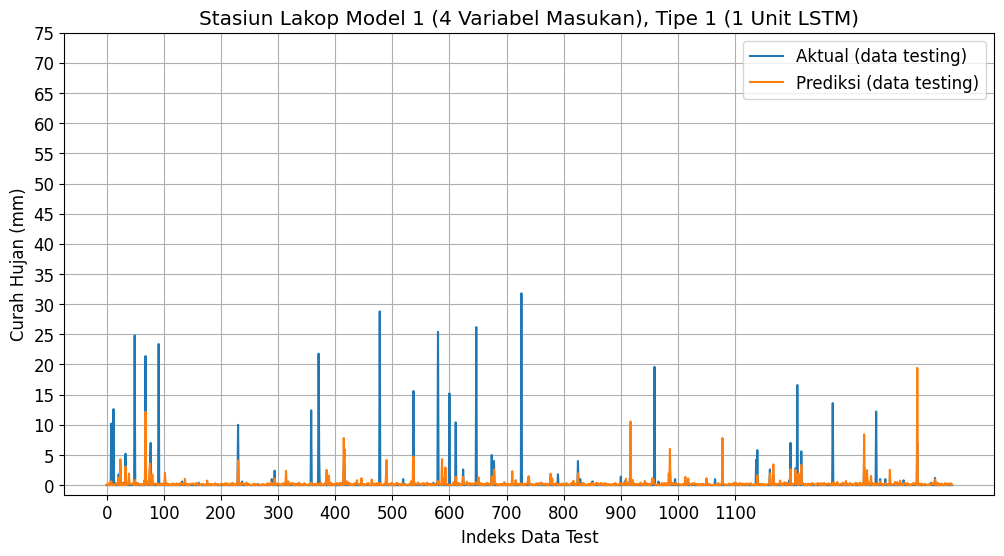

In [ ]:
# @title Plot Hasil Prediksi Data Testing

# Membuat dataframe untuk nilai aktual dan prediksi dari data pengujian
df_result_test = pd.DataFrame({'Aktual': testY_denormalized.flatten(), 'Prediksi': testY_pred_denormalized.flatten()})
#df_result_test['Aktual'] = df_result_test['Aktual'].shift(1)

# Plot data pengujian
plt.figure(figsize=(12, 6))
plt.plot(df_result_test.index, df_result_test['Aktual'], label='Aktual (data testing)')
plt.plot(df_result_test.index, df_result_test['Prediksi'], label='Prediksi (data testing)')
plt.title('Stasiun Lakop Model 1 (4 Variabel Masukan), Tipe 1 (1 Unit LSTM)')
plt.xlabel('Indeks Data Test')
plt.ylabel('Curah Hujan (mm)')
#plt.xlim([0,1600])
plt.yticks(np.arange(0, 80, 5))
plt.xticks(np.arange(0, 1200, 100))
plt.grid()
plt.legend()
plt.show()

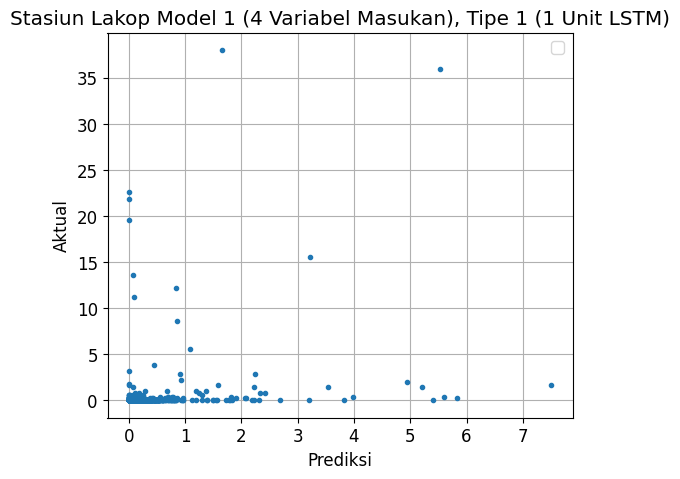

In [ ]:
# @title persebaran prediksi dan aktual data test
plt.figure(figsize=(6, 5))
plt.plot(df_result_test['Prediksi'], df_result_test['Aktual'], '.')
plt.title('Stasiun Lakop Model 1 (4 Variabel Masukan), Tipe 1 (1 Unit LSTM)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# @title Download Data Prediksi
# Membuat DataFrame dengan nilai prediksi dan aktual

df_result_test.to_excel("Lakop_model1_Tipe1.xlsx", index=True)

# Menampilkan DataFrame
from IPython.display import display
# Menampilkan DataFrame
display(df_result_test)

Aktual  Prediksi
0        0.0  0.040553
1        0.0  0.105362
2        0.0  0.000000
3        0.0  0.293936
4        0.0  0.056672
...      ...       ...
1136     0.0  3.816750
1137     0.2  0.000000
1138     0.0  0.116116
1139     0.0  0.000000
1140     0.0  0.223459

[1141 rows x 2 columns]

In [ ]:
# DATA TESTING
# Menentukan ambang batas untuk menentukan apakah hujan atau tidak
threshold = 0.5 # ambang batas penentu hujan atau tidak hujan

# Menambahkan kolom 'Hujan' berdasarkan threshold
df_result_test['Hujan_Aktual'] = np.where(df_result_test['Aktual'] >= threshold, 'Hujan', 'Tidak Hujan')
df_result_test['Hujan_Prediksi'] = np.where(df_result_test['Prediksi'] >= threshold, 'Hujan', 'Tidak Hujan')

from IPython.display import display
# Menampilkan DataFrame
display(df_result_test)

Aktual  Prediksi Hujan_Aktual Hujan_Prediksi
0        0.0  0.040553  Tidak Hujan    Tidak Hujan
1        0.0  0.105362  Tidak Hujan    Tidak Hujan
2        0.0  0.000000  Tidak Hujan    Tidak Hujan
3        0.0  0.293936  Tidak Hujan    Tidak Hujan
4        0.0  0.056672  Tidak Hujan    Tidak Hujan
...      ...       ...          ...            ...
1136     0.0  3.816750  Tidak Hujan          Hujan
1137     0.2  0.000000  Tidak Hujan    Tidak Hujan
1138     0.0  0.116116  Tidak Hujan    Tidak Hujan
1139     0.0  0.000000  Tidak Hujan    Tidak Hujan
1140     0.0  0.223459  Tidak Hujan    Tidak Hujan

[1141 rows x 4 columns]

In [ ]:
# @title Nilai Persentase CH data Testing

# Mencari Nilai Persentase Curah Hujan dan Tidak Hujan DATA TESTING

# Menghitung jumlah data pada setiap kategori
jumlah_hujan_prediksi_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Hujan') & (df_result_test['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_test['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_tidak_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_test['Prediksi'] < threshold)].shape[0]
jumlah_hujan_prediksi_tidak_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Hujan') & (df_result_test['Prediksi'] < threshold)].shape[0]

# Menghitung total data
total_data = df_result_test.shape[0]

# Menghitung persentase
persentase_hujan_prediksi_hujan = (jumlah_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_hujan = (jumlah_tidak_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_tidak_hujan = (jumlah_tidak_hujan_prediksi_tidak_hujan / total_data) * 100
persentase_hujan_prediksi_tidak_hujan = (jumlah_hujan_prediksi_tidak_hujan / total_data) * 100

# Menampilkan hasil
print(f'Persentase Hujan Aktual dan Prediksi Hujan: {persentase_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Hujan: {persentase_tidak_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: {persentase_tidak_hujan_prediksi_tidak_hujan:.2f}%')
print(f'Persentase Hujan Aktual dan Prediksi Tidak Hujan: {persentase_hujan_prediksi_tidak_hujan:.2f}%')


Persentase Hujan Aktual dan Prediksi Hujan: 1.93%
Persentase Tidak Hujan Aktual dan Prediksi Hujan: 7.45%
Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: 88.87%
Persentase Hujan Aktual dan Prediksi Tidak Hujan: 1.75%


In [ ]:
# Buat Confusion Matrix Untuk Hasil Prediksi DATA TESTING
from sklearn.metrics import confusion_matrix

# Mengubah prediksi menjadi biner berdasarkan ambang batas (threshold)
df_result_test['Prediksi_Biner'] = df_result_test['Prediksi'].apply(lambda x: 'Hujan' if x >= threshold else 'Tidak Hujan')

# Menghitung matriks kebingungan
c_matrix = confusion_matrix(df_result_test['Hujan_Aktual'], df_result_test['Hujan_Prediksi'])

# Menampilkan matriks kebingungan
print(c_matrix)

[[  22   20]
 [  85 1014]]


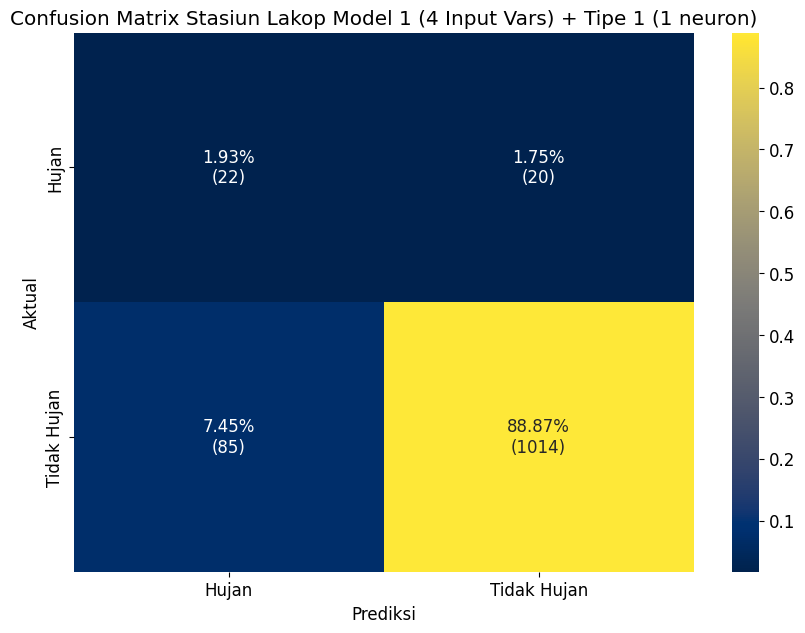

In [ ]:
# @title Confusion Matrix Data Test
# Membuat DataFrame dari matriks kebingungan
df_cm = pd.DataFrame(c_matrix, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Menghitung persentase untuk setiap kelas dalam matriks kebingungan
c_matrix_percentage = c_matrix / np.sum(c_matrix)

# Membuat DataFrame dari matriks kebingungan persentase
df_cm_percentage = pd.DataFrame(c_matrix_percentage, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Membuat anotasi baru dengan jumlah dan persentase
annotations = df_cm_percentage.applymap(lambda x: '{:.2%}'.format(x)) + '\n(' + df_cm.astype(str) + ')'

# Membuat heatmap dari DataFrame
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_percentage, annot=annotations, fmt='', cmap='cividis')
plt.title('Confusion Matrix Stasiun Lakop Model 1 (4 Input Vars) + Tipe 1 (1 neuron)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

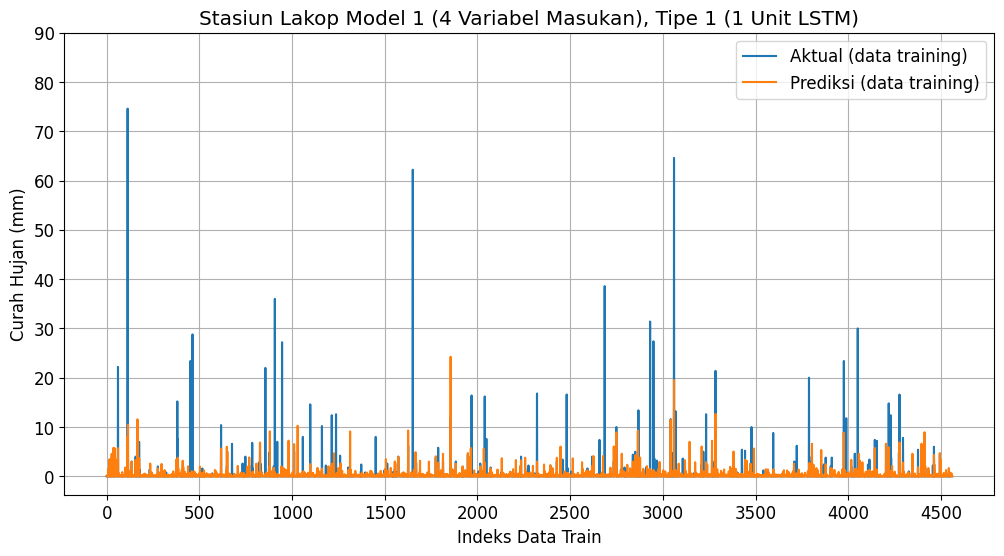

In [ ]:
# @title Plot Hasil Prediksi Data Training

# Membuat dataframe untuk nilai aktual dan prediksi dari data pengujian
df_result_train = pd.DataFrame({'Aktual': trainY_denormalized.flatten(), 'Prediksi': trainY_pred_denormalized.flatten()})
#df_result_train['Aktual'] = df_result_train['Aktual'].shift(1)

# Plot data pengujian
plt.figure(figsize=(12, 6))
plt.plot(df_result_train.index, df_result_train['Aktual'], label='Aktual (data training)')
plt.plot(df_result_train.index, df_result_train['Prediksi'], label='Prediksi (data training)')
plt.title('Stasiun Lakop Model 1 (4 Variabel Masukan), Tipe 1 (1 Unit LSTM)')
plt.xlabel('Indeks Data Train')
plt.ylabel('Curah Hujan (mm)')
#plt.xlim([0,7500])
plt.yticks(np.arange(0, 100, 10))
plt.xticks(np.arange(0, 5000, 500))
plt.grid()
plt.legend()
plt.show()

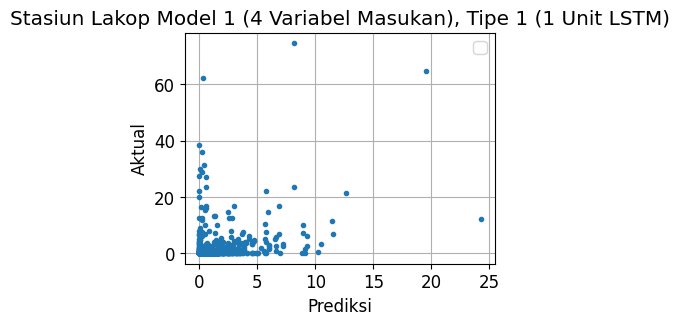

In [ ]:
# @title persebaran prediksi da aktual data train
plt.figure(figsize=(4, 3))
plt.plot(df_result_train['Prediksi'], df_result_train['Aktual'], '.')
plt.title('Stasiun Lakop Model 1 (4 Variabel Masukan), Tipe 1 (1 Unit LSTM)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
# plt.xlim([0,6500])
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Membuat DataFrame dengan nilai prediksi dan aktual
df_result_train = pd.DataFrame({'Aktual': trainY_denormalized.flatten(), 'Prediksi': trainY_pred_denormalized.flatten()})
# df_result_train['Aktual'] = df_result_train['Aktual'].shift(1)
# Menampilkan DataFrame
from IPython.display import display
# Menampilkan DataFrame
display(df_result_train)

Aktual  Prediksi
0        0.0  0.101562
1        0.0  0.000000
2        0.0  0.000000
3        0.0  0.000000
4        0.0  0.294465
...      ...       ...
4556     0.0  0.041313
4557     0.0  0.476346
4558     0.0  0.000000
4559     0.0  0.000000
4560     0.0  0.000000

[4561 rows x 2 columns]

In [ ]:
# DATA TRAINING
# Menentukan ambang batas untuk menentukan apakah hujan atau tidak
threshold = 0.5  # Anda dapat menyesuaikan nilai threshold sesuai kebutuhan

# Menambahkan kolom 'Hujan' berdasarkan threshold
df_result_train['Hujan_Aktual'] = np.where(df_result_train['Aktual'] >= threshold, 'Hujan', 'Tidak Hujan')
df_result_train['Hujan_Prediksi'] = np.where(df_result_train['Prediksi'] >= threshold, 'Hujan', 'Tidak Hujan')

from IPython.display import display
# Menampilkan DataFrame
display(df_result_train)

Aktual  Prediksi Hujan_Aktual Hujan_Prediksi
0        0.0  0.101562  Tidak Hujan    Tidak Hujan
1        0.0  0.000000  Tidak Hujan    Tidak Hujan
2        0.0  0.000000  Tidak Hujan    Tidak Hujan
3        0.0  0.000000  Tidak Hujan    Tidak Hujan
4        0.0  0.294465  Tidak Hujan    Tidak Hujan
...      ...       ...          ...            ...
4556     0.0  0.041313  Tidak Hujan    Tidak Hujan
4557     0.0  0.476346  Tidak Hujan    Tidak Hujan
4558     0.0  0.000000  Tidak Hujan    Tidak Hujan
4559     0.0  0.000000  Tidak Hujan    Tidak Hujan
4560     0.0  0.000000  Tidak Hujan    Tidak Hujan

[4561 rows x 4 columns]

In [ ]:
# Menghitung jumlah data pada setiap kategori
jumlah_hujan_prediksi_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Hujan') & (df_result_train['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_train['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_tidak_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_train['Prediksi'] < threshold)].shape[0]
jumlah_hujan_prediksi_tidak_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Hujan') & (df_result_train['Prediksi'] < threshold)].shape[0]

# Menghitung total data
total_data = df_result_train.shape[0]

# Menghitung persentase
persentase_hujan_prediksi_hujan = (jumlah_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_hujan = (jumlah_tidak_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_tidak_hujan = (jumlah_tidak_hujan_prediksi_tidak_hujan / total_data) * 100
persentase_hujan_prediksi_tidak_hujan = (jumlah_hujan_prediksi_tidak_hujan / total_data) * 100

# Menampilkan hasil
print(f'Persentase Hujan Aktual dan Prediksi Hujan: {persentase_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Hujan: {persentase_tidak_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: {persentase_tidak_hujan_prediksi_tidak_hujan:.2f}%')
print(f'Persentase Hujan Aktual dan Prediksi Tidak Hujan: {persentase_hujan_prediksi_tidak_hujan:.2f}%')


Persentase Hujan Aktual dan Prediksi Hujan: 2.89%
Persentase Tidak Hujan Aktual dan Prediksi Hujan: 7.45%
Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: 88.03%
Persentase Hujan Aktual dan Prediksi Tidak Hujan: 1.62%


In [ ]:
# Buat Confusion Matrix Untuk Hasil Prediksi DATA TESTING
from sklearn.metrics import confusion_matrix

# Mengubah prediksi menjadi biner berdasarkan ambang batas (threshold)
df_result_train['Prediksi_Biner'] = df_result_train['Prediksi'].apply(lambda x: 'Hujan' if x >= threshold else 'Tidak Hujan')

# Menghitung matriks kebingungan
c_matrix = confusion_matrix(df_result_train['Hujan_Aktual'], df_result_train['Hujan_Prediksi'])

# Menampilkan matriks kebingungan
print(c_matrix)

[[ 132   74]
 [ 340 4015]]


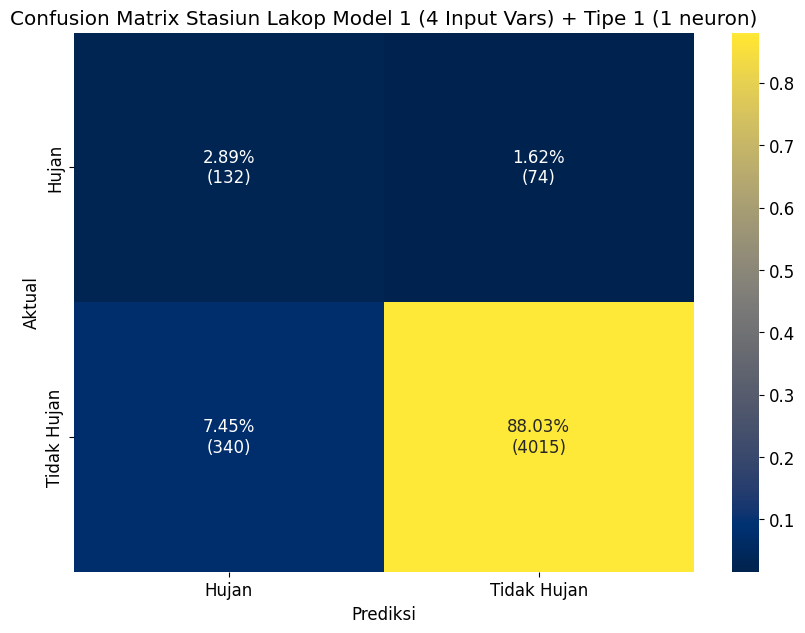

In [ ]:
# @title Confusion Matrix Data Test
# Membuat DataFrame dari matriks kebingungan
df_cm = pd.DataFrame(c_matrix, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Menghitung persentase untuk setiap kelas dalam matriks kebingungan
c_matrix_percentage = c_matrix / np.sum(c_matrix)

# Membuat DataFrame dari matriks kebingungan persentase
df_cm_percentage = pd.DataFrame(c_matrix_percentage, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Membuat anotasi baru dengan jumlah dan persentase
annotations = df_cm_percentage.applymap(lambda x: '{:.2%}'.format(x)) + '\n(' + df_cm.astype(str) + ')'

# Membuat heatmap dari DataFrame
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_percentage, annot=annotations, fmt='', cmap='cividis')
plt.title('Confusion Matrix Stasiun Lakop Model 1 (4 Input Vars) + Tipe 1 (1 neuron)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Model 3 Tipe 1

In [ ]:
# @title Baca Dataset
data=pd.read_csv('/content/Deep/Traknus_Station.csv')
data

datetime  Unnamed: 0  rainfall  airtemp  airhum  windspeed  \
0        9/5/2022 12:00           0       0.0     34.5   64.60      11.99   
1        9/5/2022 13:00           1       0.0     34.1   66.54      10.34   
2        9/5/2022 14:00           2       0.0     34.2   63.22       8.95   
3        9/5/2022 15:00           3       0.0     33.4   67.26       8.20   
4        9/5/2022 16:00           4       0.0     31.1   71.64      11.25   
...                 ...         ...       ...      ...     ...        ...   
10748   11/27/2023 8:00       10748       0.0     25.4   94.92       4.70   
10749   11/27/2023 9:00       10749       0.0     27.5   94.90       4.90   
10750  11/27/2023 10:00       10750       0.0     28.1   94.56       5.37   
10751  11/27/2023 11:00       10751       0.0     28.8   91.20       4.23   
10752  11/27/2023 12:00       10752       0.0     29.8   86.60       3.41   

         windir  airpress  uvrad       DoY       Jam  
0      0.391857   1007.34    0.0  0.904117  0.843854  
1      0.988705   1006.58    0.0  0.904117  0.907447  
2     -0.432178   1005.30    0.0  0.904117  0.136737  
3      0.985897   1004.70    0.0  0.904117 -0.759688  
4      1.000000   1004.84    0.0  0.904117 -0.957659  
...         ...       ...    ...       ...       ...  
10748  0.819306   1008.32   14.2  0.966420 -0.145500  
10749  0.895984   1008.60   19.8  0.966420 -0.911130  
10750 -0.171688   1008.50   20.1  0.966420 -0.839072  
10751 -0.892018   1007.94   26.6  0.966420  0.004426  
10752 -0.730194   1007.20   25.2  0.966420  0.843854  

[10753 rows x 11 columns]

In [ ]:
# @title Sequensial dan interpolasi Linear
X = []
y = []
length = 24
fut = 1
for i in range(length+fut, len(data)-fut):
    potong = data[i-length-fut:i]
    missing_count = potong.isnull().sum()
    if missing_count.any() > 2:
        # Jika lebih dari 2 jam data yang kosong, lanjut ke iterasi berikutnya
        continue
    elif missing_count.any() == 2:
        # Jika ada dua jam data yang kosong berurutan, interpolasi
        idx_missing = potong[potong.isnull()].index
        if len(idx_missing) == 2 and idx_missing[1] - idx_missing[0] == 1:
            potong.iloc[idx_missing[0]:idx_missing[1]+1] = potong.iloc[idx_missing[0]:idx_missing[1]+1].interpolate(method='linear', inplace=True)

    if potong.isnull().values.any():
        # print("ada nan: ", potong)
        continue
    else:
        X.append(potong[:length])
        y.append(potong[length:]["rainfall"])

In [ ]:
# @title Shuffle dan bagi data latih dan data uji
#buat rentang data latih
training_number = int(0.8*len(X))
#shuffle dataset
perm = np.random.permutation(len(X))
#pilih colom target
cols = ["rainfall", "airtemp", "airhum", "windspeed", "windir", "airpress", "uvrad", "DoY", "Jam"]
#buat list dataset menjadi array
X_array = np.array([xx[cols].values for xx in X])
y_array = np.array([yy.values for yy in y])
#pisahkan data latih 80%
trainX = X_array[perm[:training_number]]
trainY = y_array[perm[:training_number]]
#pisahkan datauji 20%
testX = X_array[perm[training_number:]]
testY = y_array[perm[training_number:]]

In [ ]:
# @title Normalisasi Data

from sklearn.preprocessing import MinMaxScaler

# Normalizing trainX and testX
scaler_X = MinMaxScaler()
trainX_normalized = scaler_X.fit_transform(trainX.reshape(-1, trainX.shape[-1])).reshape(trainX.shape)
testX_normalized = scaler_X.transform(testX.reshape(-1, testX.shape[-1])).reshape(testX.shape)

# Normalizing trainY and testY
scaler_Y = MinMaxScaler()
trainY_normalized = scaler_Y.fit_transform(trainY.reshape(-1, 1)).reshape(trainY.shape)
testY_normalized = scaler_Y.transform(testY.reshape(-1, 1)).reshape(testY.shape)

# Print the shapes of normalized data
print('Normalized trainX shape: {}'.format(trainX_normalized.shape))
print('Normalized trainY shape: {}'.format(trainY_normalized.shape))
print('Normalized testX shape: {}'.format(testX_normalized.shape))
print('Normalized testY shape: {}'.format(testY_normalized.shape))

Normalized trainX shape: (3704, 24, 9)
Normalized trainY shape: (3704, 1)
Normalized testX shape: (927, 24, 9)
Normalized testY shape: (927, 1)


In [ ]:
# @title Model Vanilla LSTM

# buat model vanilla LSTM
model=Sequential()
model.add(LSTM(units=1, input_shape=(trainX_normalized.shape[1],trainX_normalized.shape[2])))
model.add(Dense(trainY_normalized.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1)                 44        
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 46 (184.00 Byte)
Trainable params: 46 (184.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# @title Epoch dan Batch Size

# fit model untuk pelatihan data
history=model.fit(trainX_normalized, trainY_normalized,
                  epochs=200, batch_size=50,
                  validation_split=0.2, verbose=1, shuffle=False)

Epoch 1/200
60/60 [==============================] - 3s 19ms/step - loss: 0.0864 - val_loss: 0.0317
Epoch 2/200
60/60 [==============================] - 1s 11ms/step - loss: 0.0126 - val_loss: 0.0048
Epoch 3/200
60/60 [==============================] - 1s 12ms/step - loss: 0.0048 - val_loss: 0.0042
Epoch 4/200
60/60 [==============================] - 1s 17ms/step - loss: 0.0043 - val_loss: 0.0038
Epoch 5/200
60/60 [==============================] - 1s 12ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 6/200
60/60 [==============================] - 1s 11ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 7/200
60/60 [==============================] - 1s 11ms/step - loss: 0.0033 - val_loss: 0.0028
Epoch 8/200
60/60 [==============================] - 1s 11ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 9/200
60/60 [==============================] - 1s 11ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 10/200
60/60 [==============================] - 1s 14ms/step - loss: 0.0027 - val_loss: 0.0023

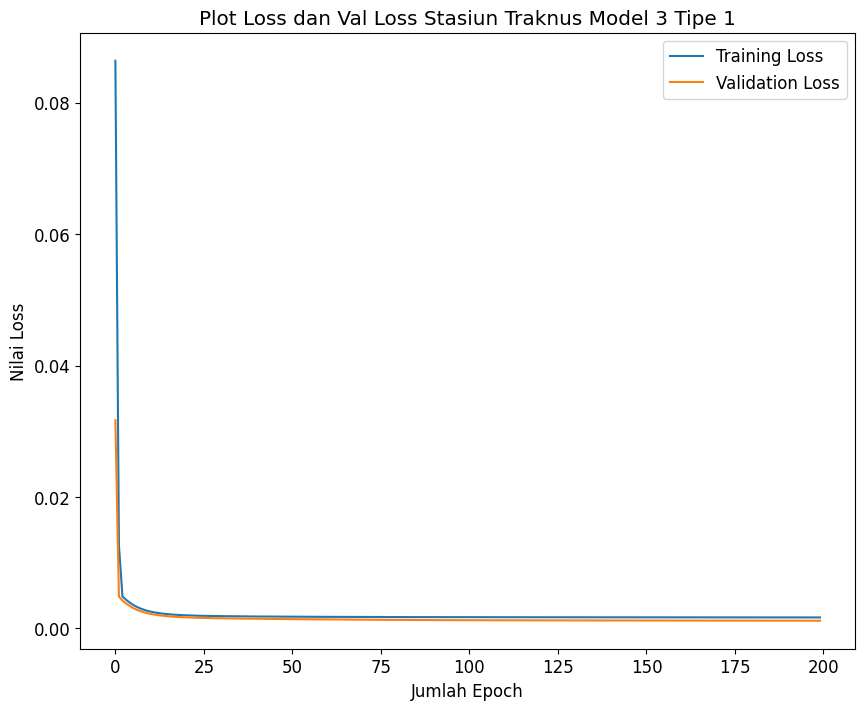

In [ ]:
# @title Plot Loss dan Val Loss
# plot history loss dan validation loss
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel("Jumlah Epoch")
plt.ylabel("Nilai Loss")
plt.title("Plot Loss dan Val Loss Stasiun Traknus Model 3 Tipe 1")
plt.legend()

In [ ]:
# @title Prediksi LSTM
# prediksi data training
trainY_pred= model.predict(trainX_normalized)
trainY_pred = np.maximum(trainY_pred, 0)

#prediksi data testing
testY_pred= model.predict(testX_normalized)
testY_pred= np.maximum(testY_pred, 0)

29/29 [==============================] - 0s 3ms/step


In [ ]:
# @title Denormalisasi Data
# denormalisasi nilai hasil prediksi dari data training
trainY_pred_denormalized = scaler_Y.inverse_transform(trainY_pred)

# denormalisasi nilai hasil prediksi dari data testing
testY_pred_denormalized = scaler_Y.inverse_transform(testY_pred)

# denormalisasi nilai aktual dari data training
trainY_denormalized = scaler_Y.inverse_transform(trainY_normalized)

# denormalisasi nilai aktual dari data testing
testY_denormalized = scaler_Y.inverse_transform(testY_normalized)


# Print the shape of denormalized predictions
print('Denormalized trainY_pred_denormalized shape: {}'.format(trainY_pred_denormalized.shape))
print('Denormalized testY_pred_denormalized shape: {}'.format(testY_pred_denormalized.shape))

# Print the shape of denormalized actual
print('Denormalized trainY_denormalized shape: {}'.format(trainY_denormalized.shape))
print('Denormalized testY_denormalized shape: {}'.format(testY_denormalized.shape))

Denormalized trainY_pred_denormalized shape: (3704, 1)
Denormalized testY_pred_denormalized shape: (927, 1)
Denormalized trainY_denormalized shape: (3704, 1)
Denormalized testY_denormalized shape: (927, 1)


In [ ]:
# @title RMSE
# calculate root mean squared error
# hasil RMSE di jadikan bilangan desimal
from sklearn.metrics import mean_squared_error
#Cari RMSE Train
rmse = np.sqrt(np.mean(np.square(trainY_denormalized - trainY_pred_denormalized)))
print(f'Root Mean Squared Error on Train Set: {rmse}')
#Cari RMSE Test
rmse = np.sqrt(np.mean(np.square(testY_denormalized - testY_pred_denormalized )))
print(f'Root Mean Squared Error on Test Set: {rmse}')

Root Mean Squared Error on Train Set: 2.6559476270971163
Root Mean Squared Error on Test Set: 1.4511756157180877


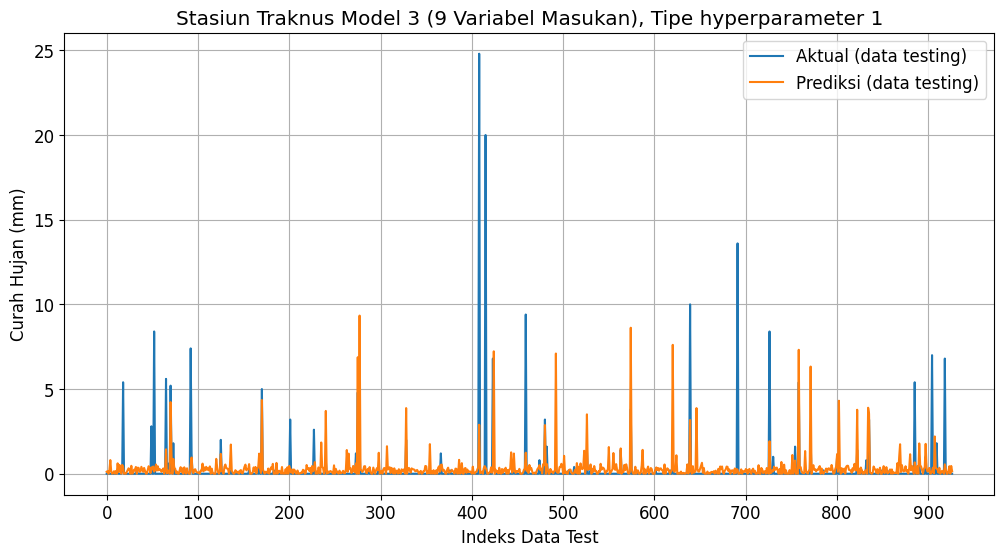

In [ ]:
# @title Plot Hasil Prediksi Data Testing

# Membuat dataframe untuk nilai aktual dan prediksi dari data pengujian
df_result_test = pd.DataFrame({'Aktual': testY_denormalized.flatten(), 'Prediksi': testY_pred_denormalized.flatten()})
#df_result_test['Aktual'] = df_result_test['Aktual'].shift(1)

# Plot data pengujian
plt.figure(figsize=(12, 6))
plt.plot(df_result_test.index, df_result_test['Aktual'], label='Aktual (data testing)')
plt.plot(df_result_test.index, df_result_test['Prediksi'], label='Prediksi (data testing)')
plt.title('Stasiun Traknus Model 3 (9 Variabel Masukan), Tipe hyperparameter 1')
plt.xlabel('Indeks Data Test')
plt.ylabel('Curah Hujan (mm)')
#plt.xlim([0,1600])
plt.yticks(np.arange(0, 30, 5))
plt.xticks(np.arange(0, 1000, 100))
plt.grid()
plt.legend()
plt.show()

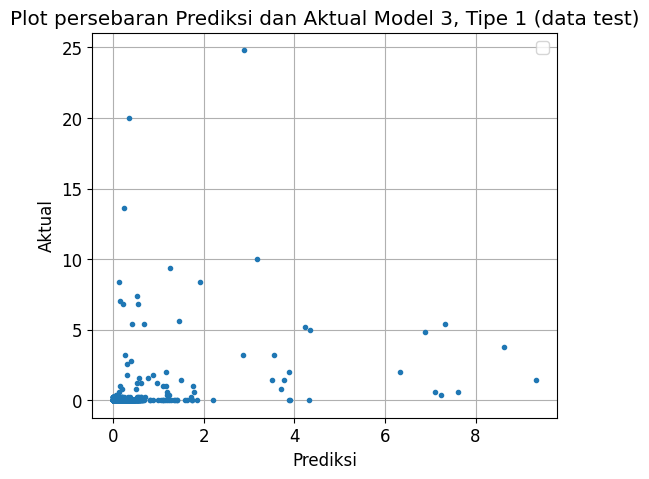

In [ ]:
# @title persebaran prediksi dan aktual data test
plt.figure(figsize=(6, 5))
plt.plot(df_result_test['Prediksi'], df_result_test['Aktual'], '.')
plt.title('Plot persebaran Prediksi dan Aktual Model 3, Tipe 1 (data test)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# @title Download Data Prediksi
# Membuat DataFrame dengan nilai prediksi dan aktual

df_result_test.to_excel("Traknus_model3_Tipe1.xlsx", index=True)

# Menampilkan DataFrame
from IPython.display import display
# Menampilkan DataFrame
display(df_result_test)

Aktual  Prediksi
0       0.0  0.119566
1       0.0  0.154707
2       0.0  0.000000
3       0.0  0.201145
4       0.0  0.805105
..      ...       ...
922     0.0  0.157412
923     0.0  0.441755
924     0.0  0.000000
925     0.0  0.455122
926     0.0  0.149388

[927 rows x 2 columns]

In [ ]:
# @title Atur threshold
# DATA TESTING
# Menentukan ambang batas untuk menentukan apakah hujan atau tidak
threshold = 0.5 # ambang batas penentu hujan atau tidak hujan

# Menambahkan kolom 'Hujan' berdasarkan threshold
df_result_test['Hujan_Aktual'] = np.where(df_result_test['Aktual'] >= threshold, 'Hujan', 'Tidak Hujan')
df_result_test['Hujan_Prediksi'] = np.where(df_result_test['Prediksi'] >= threshold, 'Hujan', 'Tidak Hujan')

from IPython.display import display
# Menampilkan DataFrame
display(df_result_test)

Aktual  Prediksi Hujan_Aktual Hujan_Prediksi
0       0.0  0.119566  Tidak Hujan    Tidak Hujan
1       0.0  0.154707  Tidak Hujan    Tidak Hujan
2       0.0  0.000000  Tidak Hujan    Tidak Hujan
3       0.0  0.201145  Tidak Hujan    Tidak Hujan
4       0.0  0.805105  Tidak Hujan          Hujan
..      ...       ...          ...            ...
922     0.0  0.157412  Tidak Hujan    Tidak Hujan
923     0.0  0.441755  Tidak Hujan    Tidak Hujan
924     0.0  0.000000  Tidak Hujan    Tidak Hujan
925     0.0  0.455122  Tidak Hujan    Tidak Hujan
926     0.0  0.149388  Tidak Hujan    Tidak Hujan

[927 rows x 4 columns]

In [ ]:
# @title Nilai Persentase CH data Testing

# Mencari Nilai Persentase Curah Hujan dan Tidak Hujan DATA TESTING

# Menghitung jumlah data pada setiap kategori
jumlah_hujan_prediksi_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Hujan') & (df_result_test['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_test['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_tidak_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_test['Prediksi'] < threshold)].shape[0]
jumlah_hujan_prediksi_tidak_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Hujan') & (df_result_test['Prediksi'] < threshold)].shape[0]

# Menghitung total data
total_data = df_result_test.shape[0]

# Menghitung persentase
persentase_hujan_prediksi_hujan = (jumlah_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_hujan = (jumlah_tidak_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_tidak_hujan = (jumlah_tidak_hujan_prediksi_tidak_hujan / total_data) * 100
persentase_hujan_prediksi_tidak_hujan = (jumlah_hujan_prediksi_tidak_hujan / total_data) * 100

# Menampilkan hasil
print(f'Persentase Hujan Aktual dan Prediksi Hujan: {persentase_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Hujan: {persentase_tidak_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: {persentase_tidak_hujan_prediksi_tidak_hujan:.2f}%')
print(f'Persentase Hujan Aktual dan Prediksi Tidak Hujan: {persentase_hujan_prediksi_tidak_hujan:.2f}%')


Persentase Hujan Aktual dan Prediksi Hujan: 3.99%
Persentase Tidak Hujan Aktual dan Prediksi Hujan: 7.01%
Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: 87.59%
Persentase Hujan Aktual dan Prediksi Tidak Hujan: 1.40%


In [ ]:
# @title Confusion matrix TESTING
# Buat Confusion Matrix Untuk Hasil Prediksi DATA TESTING
from sklearn.metrics import confusion_matrix

# Mengubah prediksi menjadi biner berdasarkan ambang batas (threshold)
df_result_test['Prediksi_Biner'] = df_result_test['Prediksi'].apply(lambda x: 'Hujan' if x >= threshold else 'Tidak Hujan')

# Menghitung matriks kebingungan
c_matrix = confusion_matrix(df_result_test['Hujan_Aktual'], df_result_test['Hujan_Prediksi'])

# Menampilkan matriks kebingungan
print(c_matrix)

[[ 37  13]
 [ 65 812]]


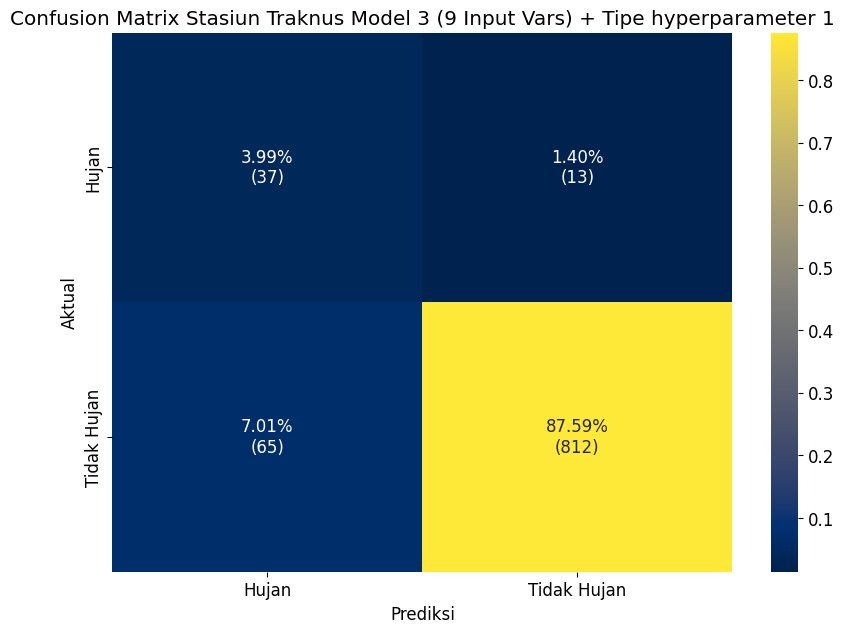

In [ ]:
# @title Plot Confusion Matrix Data Test
# Membuat DataFrame dari matriks kebingungan
df_cm = pd.DataFrame(c_matrix, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Menghitung persentase untuk setiap kelas dalam matriks kebingungan
c_matrix_percentage = c_matrix / np.sum(c_matrix)

# Membuat DataFrame dari matriks kebingungan persentase
df_cm_percentage = pd.DataFrame(c_matrix_percentage, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Membuat anotasi baru dengan jumlah dan persentase
annotations = df_cm_percentage.applymap(lambda x: '{:.2%}'.format(x)) + '\n(' + df_cm.astype(str) + ')'

# Membuat heatmap dari DataFrame
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_percentage, annot=annotations, fmt='', cmap='cividis')
plt.title('Confusion Matrix Stasiun Traknus Model 3 (9 Input Vars) + Tipe hyperparameter 1')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

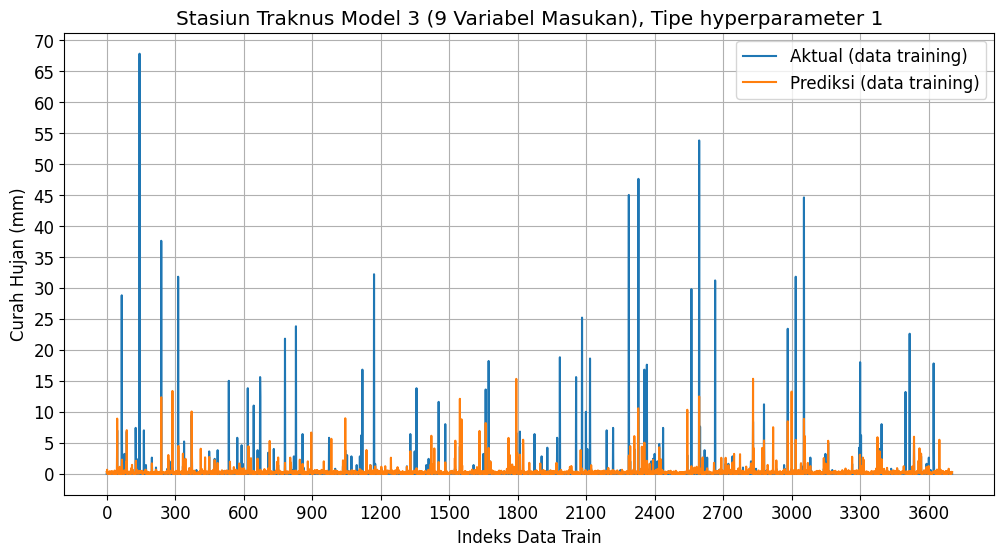

In [ ]:
# @title Plot Hasil Prediksi Data Training

# Membuat dataframe untuk nilai aktual dan prediksi dari data pengujian
df_result_train = pd.DataFrame({'Aktual': trainY_denormalized.flatten(), 'Prediksi': trainY_pred_denormalized.flatten()})
#df_result_train['Aktual'] = df_result_train['Aktual'].shift(1)

# Plot data pengujian
plt.figure(figsize=(12, 6))
plt.plot(df_result_train.index, df_result_train['Aktual'], label='Aktual (data training)')
plt.plot(df_result_train.index, df_result_train['Prediksi'], label='Prediksi (data training)')
plt.title('Stasiun Traknus Model 3 (9 Variabel Masukan), Tipe hyperparameter 1')
plt.xlabel('Indeks Data Train')
plt.ylabel('Curah Hujan (mm)')
#plt.xlim([0,7500])
plt.yticks(np.arange(0, 75, 5))
plt.xticks(np.arange(0, 3710, 300))
plt.grid()
plt.legend()
plt.show()

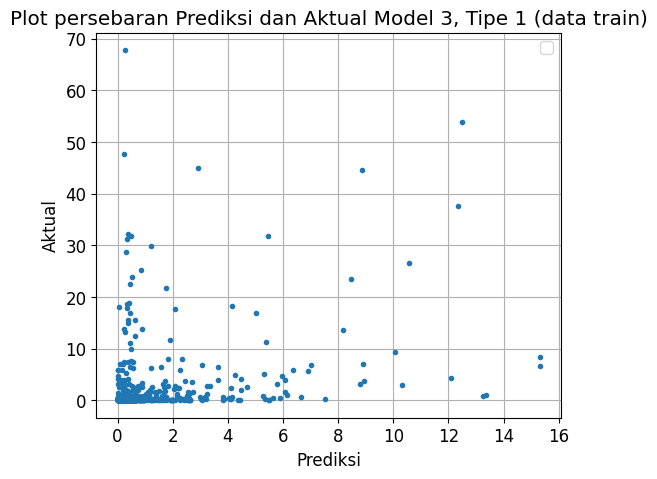

In [ ]:
# @title persebaran prediksi dan aktual data train
plt.figure(figsize=(6, 5))
plt.plot(df_result_train['Prediksi'], df_result_train['Aktual'], '.')
plt.title('Plot persebaran Prediksi dan Aktual Model 3, Tipe 1 (data train)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
# plt.xlim([0,6500])
plt.grid()
plt.legend()
plt.show()

In [ ]:
# @title buat dataframe training
# Membuat DataFrame dengan nilai prediksi dan aktual
df_result_train = pd.DataFrame({'Aktual': trainY_denormalized.flatten(), 'Prediksi': trainY_pred_denormalized.flatten()})
# df_result_train['Aktual'] = df_result_train['Aktual'].shift(1)
# Menampilkan DataFrame
from IPython.display import display
# Menampilkan DataFrame
display(df_result_train)

Aktual  Prediksi
0        0.0  0.299053
1        0.0  0.332767
2        0.0  0.647376
3        0.0  0.000000
4        0.0  0.346354
...      ...       ...
3699     0.0  0.011347
3700     0.0  0.028606
3701     0.0  0.000000
3702     0.0  0.083704
3703     0.0  0.277916

[3704 rows x 2 columns]

In [ ]:
# @title thrashold data training
# DATA TRAINING
# Menentukan ambang batas untuk menentukan apakah hujan atau tidak
threshold = 0.5  # Anda dapat menyesuaikan nilai threshold sesuai kebutuhan

# Menambahkan kolom 'Hujan' berdasarkan threshold
df_result_train['Hujan_Aktual'] = np.where(df_result_train['Aktual'] >= threshold, 'Hujan', 'Tidak Hujan')
df_result_train['Hujan_Prediksi'] = np.where(df_result_train['Prediksi'] >= threshold, 'Hujan', 'Tidak Hujan')

from IPython.display import display
# Menampilkan DataFrame
display(df_result_train)

Aktual  Prediksi Hujan_Aktual Hujan_Prediksi
0        0.0  0.299053  Tidak Hujan    Tidak Hujan
1        0.0  0.332767  Tidak Hujan    Tidak Hujan
2        0.0  0.647376  Tidak Hujan          Hujan
3        0.0  0.000000  Tidak Hujan    Tidak Hujan
4        0.0  0.346354  Tidak Hujan    Tidak Hujan
...      ...       ...          ...            ...
3699     0.0  0.011347  Tidak Hujan    Tidak Hujan
3700     0.0  0.028606  Tidak Hujan    Tidak Hujan
3701     0.0  0.000000  Tidak Hujan    Tidak Hujan
3702     0.0  0.083704  Tidak Hujan    Tidak Hujan
3703     0.0  0.277916  Tidak Hujan    Tidak Hujan

[3704 rows x 4 columns]

In [ ]:
# @title nilai persen CH training
# Menghitung jumlah data pada setiap kategori
jumlah_hujan_prediksi_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Hujan') & (df_result_train['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_train['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_tidak_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_train['Prediksi'] < threshold)].shape[0]
jumlah_hujan_prediksi_tidak_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Hujan') & (df_result_train['Prediksi'] < threshold)].shape[0]

# Menghitung total data
total_data = df_result_train.shape[0]

# Menghitung persentase
persentase_hujan_prediksi_hujan = (jumlah_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_hujan = (jumlah_tidak_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_tidak_hujan = (jumlah_tidak_hujan_prediksi_tidak_hujan / total_data) * 100
persentase_hujan_prediksi_tidak_hujan = (jumlah_hujan_prediksi_tidak_hujan / total_data) * 100

# Menampilkan hasil
print(f'Persentase Hujan Aktual dan Prediksi Hujan: {persentase_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Hujan: {persentase_tidak_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: {persentase_tidak_hujan_prediksi_tidak_hujan:.2f}%')
print(f'Persentase Hujan Aktual dan Prediksi Tidak Hujan: {persentase_hujan_prediksi_tidak_hujan:.2f}%')


Persentase Hujan Aktual dan Prediksi Hujan: 3.13%
Persentase Tidak Hujan Aktual dan Prediksi Hujan: 4.91%
Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: 90.06%
Persentase Hujan Aktual dan Prediksi Tidak Hujan: 1.89%


In [ ]:
# @title Confusion Matrix TRAINING
# Buat Confusion Matrix Untuk Hasil Prediksi DATA Train
from sklearn.metrics import confusion_matrix

# Mengubah prediksi menjadi biner berdasarkan ambang batas (threshold)
df_result_train['Prediksi_Biner'] = df_result_train['Prediksi'].apply(lambda x: 'Hujan' if x >= threshold else 'Tidak Hujan')

# Menghitung matriks kebingungan
c_matrix = confusion_matrix(df_result_train['Hujan_Aktual'], df_result_train['Hujan_Prediksi'])

# Menampilkan matriks kebingungan
print(c_matrix)

[[ 116   70]
 [ 182 3336]]


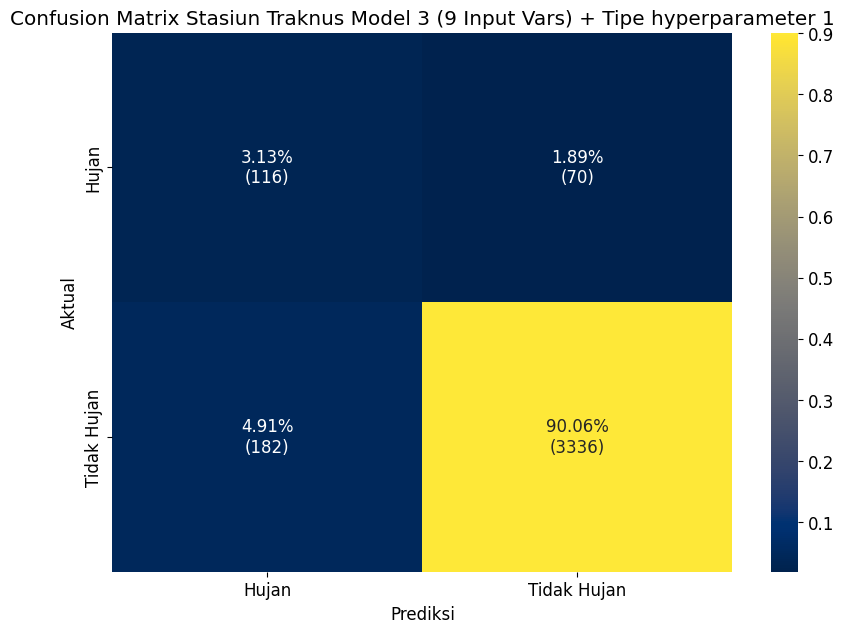

In [ ]:
# @title PLot Confusion Matrix Data Training
# Membuat DataFrame dari matriks kebingungan
df_cm = pd.DataFrame(c_matrix, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Menghitung persentase untuk setiap kelas dalam matriks kebingungan
c_matrix_percentage = c_matrix / np.sum(c_matrix)

# Membuat DataFrame dari matriks kebingungan persentase
df_cm_percentage = pd.DataFrame(c_matrix_percentage, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Membuat anotasi baru dengan jumlah dan persentase
annotations = df_cm_percentage.applymap(lambda x: '{:.2%}'.format(x)) + '\n(' + df_cm.astype(str) + ')'

# Membuat heatmap dari DataFrame
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_percentage, annot=annotations, fmt='', cmap='cividis')
plt.title('Confusion Matrix Stasiun Traknus Model 3 (9 Input Vars) + Tipe hyperparameter 1')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Model 3 Tipe 2

In [ ]:
# @title Baca Dataset
data=pd.read_csv('/content/Deep/Traknus_Station.csv')
data

datetime  Unnamed: 0  rainfall  airtemp  airhum  windspeed  \
0        9/5/2022 12:00           0       0.0     34.5   64.60      11.99   
1        9/5/2022 13:00           1       0.0     34.1   66.54      10.34   
2        9/5/2022 14:00           2       0.0     34.2   63.22       8.95   
3        9/5/2022 15:00           3       0.0     33.4   67.26       8.20   
4        9/5/2022 16:00           4       0.0     31.1   71.64      11.25   
...                 ...         ...       ...      ...     ...        ...   
10748   11/27/2023 8:00       10748       0.0     25.4   94.92       4.70   
10749   11/27/2023 9:00       10749       0.0     27.5   94.90       4.90   
10750  11/27/2023 10:00       10750       0.0     28.1   94.56       5.37   
10751  11/27/2023 11:00       10751       0.0     28.8   91.20       4.23   
10752  11/27/2023 12:00       10752       0.0     29.8   86.60       3.41   

         windir  airpress  uvrad       DoY       Jam  
0      0.391857   1007.34    0.0  0.904117  0.843854  
1      0.988705   1006.58    0.0  0.904117  0.907447  
2     -0.432178   1005.30    0.0  0.904117  0.136737  
3      0.985897   1004.70    0.0  0.904117 -0.759688  
4      1.000000   1004.84    0.0  0.904117 -0.957659  
...         ...       ...    ...       ...       ...  
10748  0.819306   1008.32   14.2  0.966420 -0.145500  
10749  0.895984   1008.60   19.8  0.966420 -0.911130  
10750 -0.171688   1008.50   20.1  0.966420 -0.839072  
10751 -0.892018   1007.94   26.6  0.966420  0.004426  
10752 -0.730194   1007.20   25.2  0.966420  0.843854  

[10753 rows x 11 columns]

In [ ]:
# @title Sequensial dan interpolasi Linear
X = []
y = []
length = 24
fut = 1
for i in range(length+fut, len(data)-fut):
    potong = data[i-length-fut:i]
    missing_count = potong.isnull().sum()
    if missing_count.any() > 2:
        # Jika lebih dari 2 jam data yang kosong, lanjut ke iterasi berikutnya
        continue
    elif missing_count.any() == 2:
        # Jika ada dua jam data yang kosong berurutan, interpolasi
        idx_missing = potong[potong.isnull()].index
        if len(idx_missing) == 2 and idx_missing[1] - idx_missing[0] == 1:
            potong.iloc[idx_missing[0]:idx_missing[1]+1] = potong.iloc[idx_missing[0]:idx_missing[1]+1].interpolate(method='linear', inplace=True)

    if potong.isnull().values.any():
        # print("ada nan: ", potong)
        continue
    else:
        X.append(potong[:length])
        y.append(potong[length:]["rainfall"])

In [ ]:
# @title Shuffle dan bagi data latih dan data uji
#buat rentang data latih
training_number = int(0.8*len(X))
#shuffle dataset
perm = np.random.permutation(len(X))
#pilih colom target
cols = ["rainfall", "airtemp", "airhum", "windspeed", "windir", "airpress", "uvrad", "DoY", "Jam"]
#buat list dataset menjadi array
X_array = np.array([xx[cols].values for xx in X])
y_array = np.array([yy.values for yy in y])
#pisahkan data latih 80%
trainX = X_array[perm[:training_number]]
trainY = y_array[perm[:training_number]]
#pisahkan datauji 20%
testX = X_array[perm[training_number:]]
testY = y_array[perm[training_number:]]

In [ ]:
# @title Normalisasi Data

from sklearn.preprocessing import MinMaxScaler

# Normalizing trainX and testX
scaler_X = MinMaxScaler()
trainX_normalized = scaler_X.fit_transform(trainX.reshape(-1, trainX.shape[-1])).reshape(trainX.shape)
testX_normalized = scaler_X.transform(testX.reshape(-1, testX.shape[-1])).reshape(testX.shape)

# Normalizing trainY and testY
scaler_Y = MinMaxScaler()
trainY_normalized = scaler_Y.fit_transform(trainY.reshape(-1, 1)).reshape(trainY.shape)
testY_normalized = scaler_Y.transform(testY.reshape(-1, 1)).reshape(testY.shape)

# Print the shapes of normalized data
print('Normalized trainX shape: {}'.format(trainX_normalized.shape))
print('Normalized trainY shape: {}'.format(trainY_normalized.shape))
print('Normalized testX shape: {}'.format(testX_normalized.shape))
print('Normalized testY shape: {}'.format(testY_normalized.shape))

Normalized trainX shape: (3704, 24, 9)
Normalized trainY shape: (3704, 1)
Normalized testX shape: (927, 24, 9)
Normalized testY shape: (927, 1)


In [ ]:
# @title Model Vanilla LSTM

# buat model vanilla LSTM
model=Sequential()
model.add(LSTM(units=1, input_shape=(trainX_normalized.shape[1],trainX_normalized.shape[2])))
model.add(Dense(trainY_normalized.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1)                 44        
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 46 (184.00 Byte)
Trainable params: 46 (184.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# @title Epoch dan Batch Size

# fit model untuk pelatihan data
history=model.fit(trainX_normalized, trainY_normalized,
                  epochs=150, batch_size=50,
                  validation_split=0.2, verbose=1, shuffle=False)

Epoch 1/150
60/60 [==============================] - 4s 21ms/step - loss: 0.0605 - val_loss: 0.0242
Epoch 2/150
60/60 [==============================] - 1s 12ms/step - loss: 0.0115 - val_loss: 0.0058
Epoch 3/150
60/60 [==============================] - 1s 12ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 4/150
60/60 [==============================] - 1s 12ms/step - loss: 0.0026 - val_loss: 0.0034
Epoch 5/150
60/60 [==============================] - 1s 20ms/step - loss: 0.0025 - val_loss: 0.0034
Epoch 6/150
60/60 [==============================] - 1s 19ms/step - loss: 0.0025 - val_loss: 0.0033
Epoch 7/150
60/60 [==============================] - 1s 12ms/step - loss: 0.0024 - val_loss: 0.0033
Epoch 8/150
60/60 [==============================] - 1s 12ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 9/150
60/60 [==============================] - 1s 12ms/step - loss: 0.0023 - val_loss: 0.0032
Epoch 10/150
60/60 [==============================] - 1s 11ms/step - loss: 0.0023 - val_loss: 0.0031

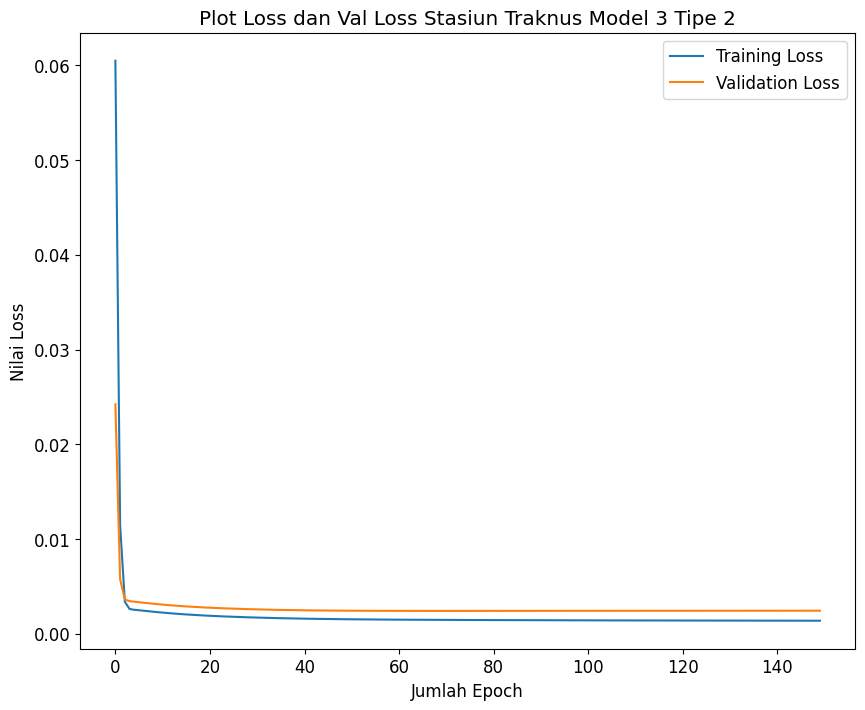

In [ ]:
# @title Plot Loss dan Val Loss
# plot history loss dan validation loss
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel("Jumlah Epoch")
plt.ylabel("Nilai Loss")
plt.title("Plot Loss dan Val Loss Stasiun Traknus Model 3 Tipe 2")
plt.legend()

In [ ]:
# @title Prediksi LSTM
# prediksi data training
trainY_pred= model.predict(trainX_normalized)
trainY_pred = np.maximum(trainY_pred, 0)

#prediksi data testing
testY_pred= model.predict(testX_normalized)
testY_pred= np.maximum(testY_pred, 0)

29/29 [==============================] - 0s 3ms/step


In [ ]:
# @title Denormalisasi Data
# denormalisasi nilai hasil prediksi dari data training
trainY_pred_denormalized = scaler_Y.inverse_transform(trainY_pred)

# denormalisasi nilai hasil prediksi dari data testing
testY_pred_denormalized = scaler_Y.inverse_transform(testY_pred)

# denormalisasi nilai aktual dari data training
trainY_denormalized = scaler_Y.inverse_transform(trainY_normalized)

# denormalisasi nilai aktual dari data testing
testY_denormalized = scaler_Y.inverse_transform(testY_normalized)


# Print the shape of denormalized predictions
print('Denormalized trainY_pred_denormalized shape: {}'.format(trainY_pred_denormalized.shape))
print('Denormalized testY_pred_denormalized shape: {}'.format(testY_pred_denormalized.shape))

# Print the shape of denormalized actual
print('Denormalized trainY_denormalized shape: {}'.format(trainY_denormalized.shape))
print('Denormalized testY_denormalized shape: {}'.format(testY_denormalized.shape))

Denormalized trainY_pred_denormalized shape: (3704, 1)
Denormalized testY_pred_denormalized shape: (927, 1)
Denormalized trainY_denormalized shape: (3704, 1)
Denormalized testY_denormalized shape: (927, 1)


In [ ]:
# @title RMSE
# calculate root mean squared error
# hasil RMSE di jadikan bilangan desimal
from sklearn.metrics import mean_squared_error
#Cari RMSE Train
rmse = np.sqrt(np.mean(np.square(trainY_denormalized - trainY_pred_denormalized)))
print(f'Root Mean Squared Error on Train Set: {rmse}')
#Cari RMSE Test
rmse = np.sqrt(np.mean(np.square(testY_denormalized - testY_pred_denormalized )))
print(f'Root Mean Squared Error on Test Set: {rmse}')

Root Mean Squared Error on Train Set: 2.689180778575568
Root Mean Squared Error on Test Set: 1.183256023800313


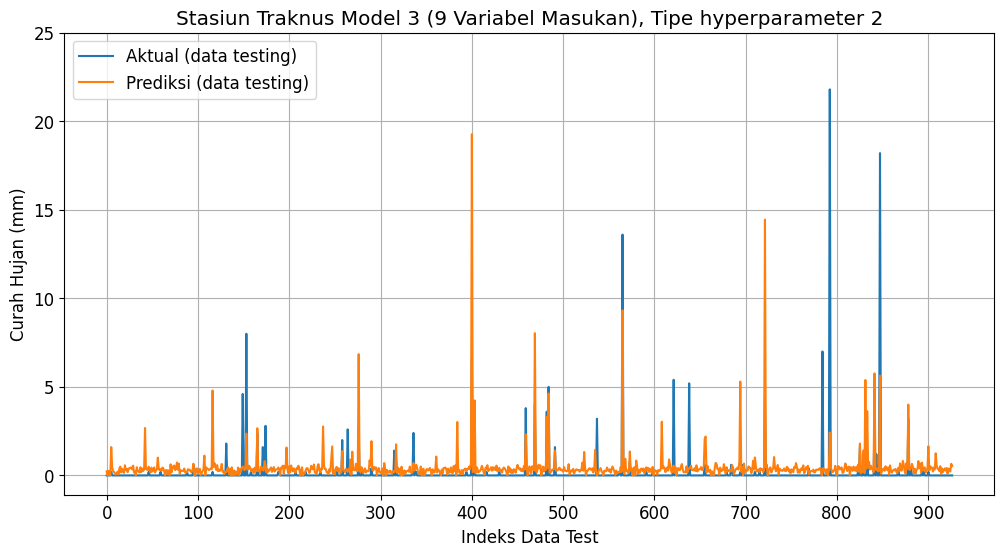

In [ ]:
# @title Plot Hasil Prediksi Data Testing

# Membuat dataframe untuk nilai aktual dan prediksi dari data pengujian
df_result_test = pd.DataFrame({'Aktual': testY_denormalized.flatten(), 'Prediksi': testY_pred_denormalized.flatten()})
#df_result_test['Aktual'] = df_result_test['Aktual'].shift(1)

# Plot data pengujian
plt.figure(figsize=(12, 6))
plt.plot(df_result_test.index, df_result_test['Aktual'], label='Aktual (data testing)')
plt.plot(df_result_test.index, df_result_test['Prediksi'], label='Prediksi (data testing)')
plt.title('Stasiun Traknus Model 3 (9 Variabel Masukan), Tipe hyperparameter 2')
plt.xlabel('Indeks Data Test')
plt.ylabel('Curah Hujan (mm)')
#plt.xlim([0,1600])
plt.yticks(np.arange(0, 30, 5))
plt.xticks(np.arange(0, 1000, 100))
plt.grid()
plt.legend()
plt.show()

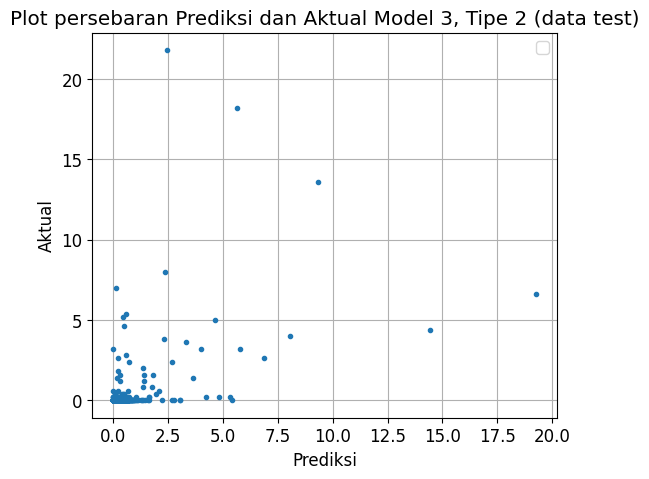

In [ ]:
# @title persebaran prediksi dan aktual data test
plt.figure(figsize=(6, 5))
plt.plot(df_result_test['Prediksi'], df_result_test['Aktual'], '.')
plt.title('Plot persebaran Prediksi dan Aktual Model 3, Tipe 2 (data test)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# @title Download Data Prediksi
# Membuat DataFrame dengan nilai prediksi dan aktual

df_result_test.to_excel("Traknus_model3_Tipe2.xlsx", index=True)

# Menampilkan DataFrame
from IPython.display import display
# Menampilkan DataFrame
display(df_result_test)

Aktual  Prediksi
0       0.0  0.230893
1       0.0  0.000000
2       0.0  0.257624
3       0.0  0.162374
4       0.0  0.000000
..      ...       ...
922     0.0  0.385809
923     0.0  0.311086
924     0.0  0.222300
925     0.0  0.657269
926     0.0  0.533496

[927 rows x 2 columns]

In [ ]:
# @title Atur threshold
# DATA TESTING
# Menentukan ambang batas untuk menentukan apakah hujan atau tidak
threshold = 0.5 # ambang batas penentu hujan atau tidak hujan

# Menambahkan kolom 'Hujan' berdasarkan threshold
df_result_test['Hujan_Aktual'] = np.where(df_result_test['Aktual'] >= threshold, 'Hujan', 'Tidak Hujan')
df_result_test['Hujan_Prediksi'] = np.where(df_result_test['Prediksi'] >= threshold, 'Hujan', 'Tidak Hujan')

from IPython.display import display
# Menampilkan DataFrame
display(df_result_test)

Aktual  Prediksi Hujan_Aktual Hujan_Prediksi
0       0.0  0.230893  Tidak Hujan    Tidak Hujan
1       0.0  0.000000  Tidak Hujan    Tidak Hujan
2       0.0  0.257624  Tidak Hujan    Tidak Hujan
3       0.0  0.162374  Tidak Hujan    Tidak Hujan
4       0.0  0.000000  Tidak Hujan    Tidak Hujan
..      ...       ...          ...            ...
922     0.0  0.385809  Tidak Hujan    Tidak Hujan
923     0.0  0.311086  Tidak Hujan    Tidak Hujan
924     0.0  0.222300  Tidak Hujan    Tidak Hujan
925     0.0  0.657269  Tidak Hujan          Hujan
926     0.0  0.533496  Tidak Hujan          Hujan

[927 rows x 4 columns]

In [ ]:
# @title Nilai Persentase CH data Testing

# Mencari Nilai Persentase Curah Hujan dan Tidak Hujan DATA TESTING

# Menghitung jumlah data pada setiap kategori
jumlah_hujan_prediksi_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Hujan') & (df_result_test['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_test['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_tidak_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_test['Prediksi'] < threshold)].shape[0]
jumlah_hujan_prediksi_tidak_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Hujan') & (df_result_test['Prediksi'] < threshold)].shape[0]

# Menghitung total data
total_data = df_result_test.shape[0]

# Menghitung persentase
persentase_hujan_prediksi_hujan = (jumlah_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_hujan = (jumlah_tidak_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_tidak_hujan = (jumlah_tidak_hujan_prediksi_tidak_hujan / total_data) * 100
persentase_hujan_prediksi_tidak_hujan = (jumlah_hujan_prediksi_tidak_hujan / total_data) * 100

# Menampilkan hasil
print(f'Persentase Hujan Aktual dan Prediksi Hujan: {persentase_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Hujan: {persentase_tidak_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: {persentase_tidak_hujan_prediksi_tidak_hujan:.2f}%')
print(f'Persentase Hujan Aktual dan Prediksi Tidak Hujan: {persentase_hujan_prediksi_tidak_hujan:.2f}%')


Persentase Hujan Aktual dan Prediksi Hujan: 2.91%
Persentase Tidak Hujan Aktual dan Prediksi Hujan: 12.84%
Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: 83.17%
Persentase Hujan Aktual dan Prediksi Tidak Hujan: 1.08%


In [ ]:
# @title Confusion matrix TESTING
# Buat Confusion Matrix Untuk Hasil Prediksi DATA TESTING
from sklearn.metrics import confusion_matrix

# Mengubah prediksi menjadi biner berdasarkan ambang batas (threshold)
df_result_test['Prediksi_Biner'] = df_result_test['Prediksi'].apply(lambda x: 'Hujan' if x >= threshold else 'Tidak Hujan')

# Menghitung matriks kebingungan
c_matrix = confusion_matrix(df_result_test['Hujan_Aktual'], df_result_test['Hujan_Prediksi'])

# Menampilkan matriks kebingungan
print(c_matrix)

[[ 27  10]
 [119 771]]


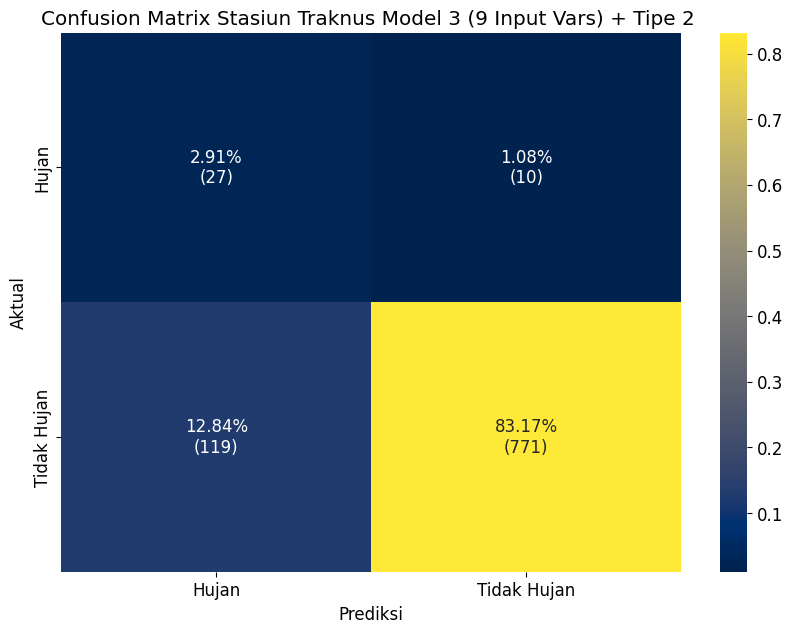

In [ ]:
# @title Plot Confusion Matrix Data Test
# Membuat DataFrame dari matriks kebingungan
df_cm = pd.DataFrame(c_matrix, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Menghitung persentase untuk setiap kelas dalam matriks kebingungan
c_matrix_percentage = c_matrix / np.sum(c_matrix)

# Membuat DataFrame dari matriks kebingungan persentase
df_cm_percentage = pd.DataFrame(c_matrix_percentage, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Membuat anotasi baru dengan jumlah dan persentase
annotations = df_cm_percentage.applymap(lambda x: '{:.2%}'.format(x)) + '\n(' + df_cm.astype(str) + ')'

# Membuat heatmap dari DataFrame
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_percentage, annot=annotations, fmt='', cmap='cividis')
plt.title('Confusion Matrix Stasiun Traknus Model 3 (9 Input Vars) + Tipe 2 ')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

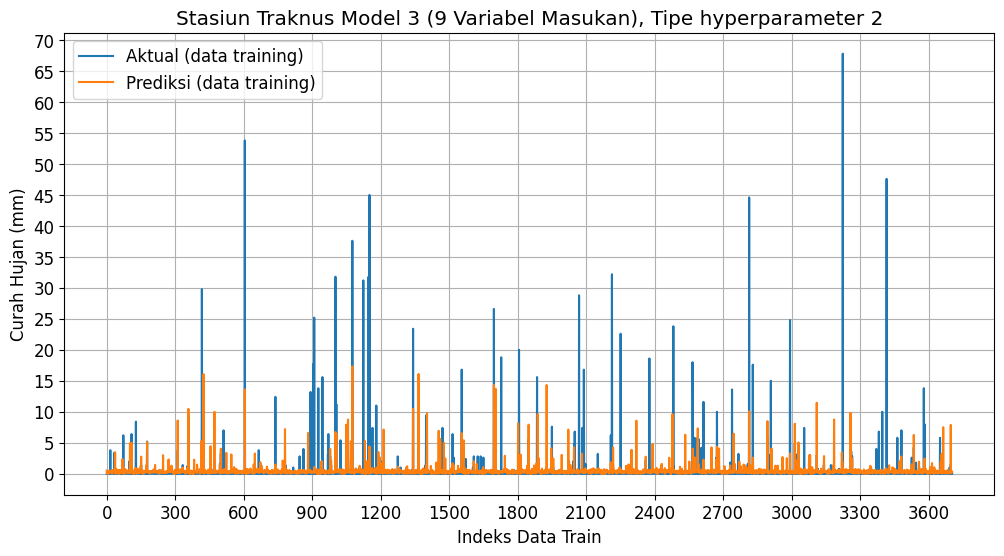

In [ ]:
# @title Plot Hasil Prediksi Data Training

# Membuat dataframe untuk nilai aktual dan prediksi dari data pengujian
df_result_train = pd.DataFrame({'Aktual': trainY_denormalized.flatten(), 'Prediksi': trainY_pred_denormalized.flatten()})
#df_result_train['Aktual'] = df_result_train['Aktual'].shift(1)

# Plot data pengujian
plt.figure(figsize=(12, 6))
plt.plot(df_result_train.index, df_result_train['Aktual'], label='Aktual (data training)')
plt.plot(df_result_train.index, df_result_train['Prediksi'], label='Prediksi (data training)')
plt.title('Stasiun Traknus Model 3 (9 Variabel Masukan), Tipe hyperparameter 2')
plt.xlabel('Indeks Data Train')
plt.ylabel('Curah Hujan (mm)')
#plt.xlim([0,7500])
plt.yticks(np.arange(0, 75, 5))
plt.xticks(np.arange(0, 3720, 300))
plt.grid()
plt.legend()
plt.show()

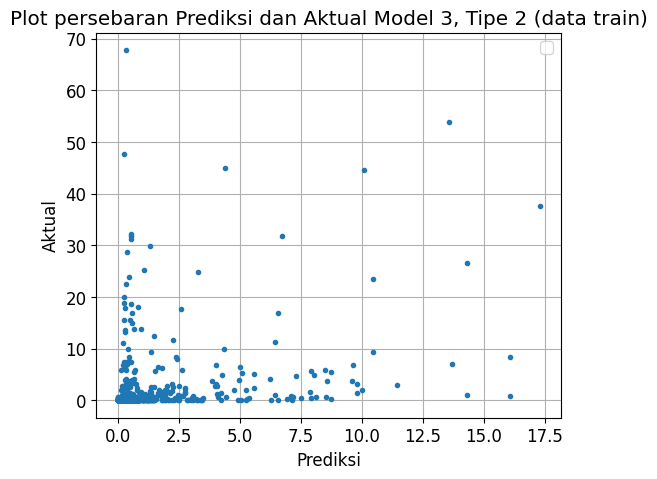

In [ ]:
# @title persebaran prediksi dan aktual data train
plt.figure(figsize=(6, 5))
plt.plot(df_result_train['Prediksi'], df_result_train['Aktual'], '.')
plt.title('Plot persebaran Prediksi dan Aktual Model 3, Tipe 2 (data train)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
# plt.xlim([0,6500])
plt.grid()
plt.legend()
plt.show()

In [ ]:
# @title buat dataframe training
# Membuat DataFrame dengan nilai prediksi dan aktual
df_result_train = pd.DataFrame({'Aktual': trainY_denormalized.flatten(), 'Prediksi': trainY_pred_denormalized.flatten()})
# df_result_train['Aktual'] = df_result_train['Aktual'].shift(1)
# Menampilkan DataFrame
from IPython.display import display
# Menampilkan DataFrame
display(df_result_train)

Aktual  Prediksi
0        0.0  0.514266
1        0.0  0.361203
2        0.0  0.241584
3        0.0  0.000000
4        0.0  0.238148
...      ...       ...
3699     0.0  0.416155
3700     0.0  0.203299
3701     0.0  0.388786
3702     0.0  0.246456
3703     0.0  0.285848

[3704 rows x 2 columns]

In [ ]:
# @title thrashold data training
# DATA TRAINING
# Menentukan ambang batas untuk menentukan apakah hujan atau tidak
threshold = 0.5  # Anda dapat menyesuaikan nilai threshold sesuai kebutuhan

# Menambahkan kolom 'Hujan' berdasarkan threshold
df_result_train['Hujan_Aktual'] = np.where(df_result_train['Aktual'] >= threshold, 'Hujan', 'Tidak Hujan')
df_result_train['Hujan_Prediksi'] = np.where(df_result_train['Prediksi'] >= threshold, 'Hujan', 'Tidak Hujan')

from IPython.display import display
# Menampilkan DataFrame
display(df_result_train)

Aktual  Prediksi Hujan_Aktual Hujan_Prediksi
0        0.0  0.514266  Tidak Hujan          Hujan
1        0.0  0.361203  Tidak Hujan    Tidak Hujan
2        0.0  0.241584  Tidak Hujan    Tidak Hujan
3        0.0  0.000000  Tidak Hujan    Tidak Hujan
4        0.0  0.238148  Tidak Hujan    Tidak Hujan
...      ...       ...          ...            ...
3699     0.0  0.416155  Tidak Hujan    Tidak Hujan
3700     0.0  0.203299  Tidak Hujan    Tidak Hujan
3701     0.0  0.388786  Tidak Hujan    Tidak Hujan
3702     0.0  0.246456  Tidak Hujan    Tidak Hujan
3703     0.0  0.285848  Tidak Hujan    Tidak Hujan

[3704 rows x 4 columns]

In [ ]:
# @title nilai persen CH training
# Menghitung jumlah data pada setiap kategori
jumlah_hujan_prediksi_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Hujan') & (df_result_train['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_train['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_tidak_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_train['Prediksi'] < threshold)].shape[0]
jumlah_hujan_prediksi_tidak_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Hujan') & (df_result_train['Prediksi'] < threshold)].shape[0]

# Menghitung total data
total_data = df_result_train.shape[0]

# Menghitung persentase
persentase_hujan_prediksi_hujan = (jumlah_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_hujan = (jumlah_tidak_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_tidak_hujan = (jumlah_tidak_hujan_prediksi_tidak_hujan / total_data) * 100
persentase_hujan_prediksi_tidak_hujan = (jumlah_hujan_prediksi_tidak_hujan / total_data) * 100

# Menampilkan hasil
print(f'Persentase Hujan Aktual dan Prediksi Hujan: {persentase_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Hujan: {persentase_tidak_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: {persentase_tidak_hujan_prediksi_tidak_hujan:.2f}%')
print(f'Persentase Hujan Aktual dan Prediksi Tidak Hujan: {persentase_hujan_prediksi_tidak_hujan:.2f}%')


Persentase Hujan Aktual dan Prediksi Hujan: 3.73%
Persentase Tidak Hujan Aktual dan Prediksi Hujan: 13.47%
Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: 81.16%
Persentase Hujan Aktual dan Prediksi Tidak Hujan: 1.65%


In [ ]:
# @title Confusion Matrix TRAINING
# Buat Confusion Matrix Untuk Hasil Prediksi DATA Train
from sklearn.metrics import confusion_matrix

# Mengubah prediksi menjadi biner berdasarkan ambang batas (threshold)
df_result_train['Prediksi_Biner'] = df_result_train['Prediksi'].apply(lambda x: 'Hujan' if x >= threshold else 'Tidak Hujan')

# Menghitung matriks kebingungan
c_matrix = confusion_matrix(df_result_train['Hujan_Aktual'], df_result_train['Hujan_Prediksi'])

# Menampilkan matriks kebingungan
print(c_matrix)

[[ 138   61]
 [ 499 3006]]


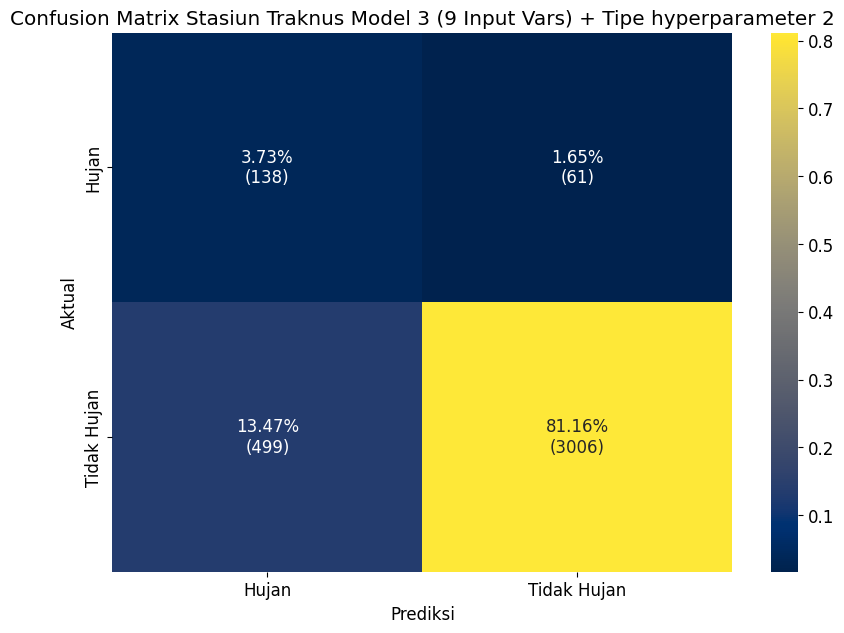

In [ ]:
# @title PLot Confusion Matrix Data Training
# Membuat DataFrame dari matriks kebingungan
df_cm = pd.DataFrame(c_matrix, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Menghitung persentase untuk setiap kelas dalam matriks kebingungan
c_matrix_percentage = c_matrix / np.sum(c_matrix)

# Membuat DataFrame dari matriks kebingungan persentase
df_cm_percentage = pd.DataFrame(c_matrix_percentage, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Membuat anotasi baru dengan jumlah dan persentase
annotations = df_cm_percentage.applymap(lambda x: '{:.2%}'.format(x)) + '\n(' + df_cm.astype(str) + ')'

# Membuat heatmap dari DataFrame
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_percentage, annot=annotations, fmt='', cmap='cividis')
plt.title('Confusion Matrix Stasiun Traknus Model 3 (9 Input Vars) + Tipe hyperparameter 2')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Model 3 Tipe 3

In [ ]:
# @title Baca Dataset
data=pd.read_csv('/content/Deep/Traknus_Station.csv')
data

datetime  Unnamed: 0  rainfall  airtemp  airhum  windspeed  \
0        9/5/2022 12:00           0       0.0     34.5   64.60      11.99   
1        9/5/2022 13:00           1       0.0     34.1   66.54      10.34   
2        9/5/2022 14:00           2       0.0     34.2   63.22       8.95   
3        9/5/2022 15:00           3       0.0     33.4   67.26       8.20   
4        9/5/2022 16:00           4       0.0     31.1   71.64      11.25   
...                 ...         ...       ...      ...     ...        ...   
10748   11/27/2023 8:00       10748       0.0     25.4   94.92       4.70   
10749   11/27/2023 9:00       10749       0.0     27.5   94.90       4.90   
10750  11/27/2023 10:00       10750       0.0     28.1   94.56       5.37   
10751  11/27/2023 11:00       10751       0.0     28.8   91.20       4.23   
10752  11/27/2023 12:00       10752       0.0     29.8   86.60       3.41   

         windir  airpress  uvrad       DoY       Jam  
0      0.391857   1007.34    0.0  0.904117  0.843854  
1      0.988705   1006.58    0.0  0.904117  0.907447  
2     -0.432178   1005.30    0.0  0.904117  0.136737  
3      0.985897   1004.70    0.0  0.904117 -0.759688  
4      1.000000   1004.84    0.0  0.904117 -0.957659  
...         ...       ...    ...       ...       ...  
10748  0.819306   1008.32   14.2  0.966420 -0.145500  
10749  0.895984   1008.60   19.8  0.966420 -0.911130  
10750 -0.171688   1008.50   20.1  0.966420 -0.839072  
10751 -0.892018   1007.94   26.6  0.966420  0.004426  
10752 -0.730194   1007.20   25.2  0.966420  0.843854  

[10753 rows x 11 columns]

In [ ]:
# @title Sequensial dan interpolasi Linear
X = []
y = []
length = 24
fut = 1
for i in range(length+fut, len(data)-fut):
    potong = data[i-length-fut:i]
    missing_count = potong.isnull().sum()
    if missing_count.any() > 2:
        # Jika lebih dari 2 jam data yang kosong, lanjut ke iterasi berikutnya
        continue
    elif missing_count.any() == 2:
        # Jika ada dua jam data yang kosong berurutan, interpolasi
        idx_missing = potong[potong.isnull()].index
        if len(idx_missing) == 2 and idx_missing[1] - idx_missing[0] == 1:
            potong.iloc[idx_missing[0]:idx_missing[1]+1] = potong.iloc[idx_missing[0]:idx_missing[1]+1].interpolate(method='linear', inplace=True)

    if potong.isnull().values.any():
        # print("ada nan: ", potong)
        continue
    else:
        X.append(potong[:length])
        y.append(potong[length:]["rainfall"])

In [ ]:
# @title Shuffle dan bagi data latih dan data uji
#buat rentang data latih
training_number = int(0.8*len(X))
#shuffle dataset
perm = np.random.permutation(len(X))
#pilih colom target
cols = ["rainfall", "airtemp", "airhum", "windspeed", "windir", "airpress", "uvrad", "DoY", "Jam"]
#buat list dataset menjadi array
X_array = np.array([xx[cols].values for xx in X])
y_array = np.array([yy.values for yy in y])
#pisahkan data latih 80%
trainX = X_array[perm[:training_number]]
trainY = y_array[perm[:training_number]]
#pisahkan datauji 20%
testX = X_array[perm[training_number:]]
testY = y_array[perm[training_number:]]

In [ ]:
# @title Normalisasi Data

from sklearn.preprocessing import MinMaxScaler

# Normalizing trainX and testX
scaler_X = MinMaxScaler()
trainX_normalized = scaler_X.fit_transform(trainX.reshape(-1, trainX.shape[-1])).reshape(trainX.shape)
testX_normalized = scaler_X.transform(testX.reshape(-1, testX.shape[-1])).reshape(testX.shape)

# Normalizing trainY and testY
scaler_Y = MinMaxScaler()
trainY_normalized = scaler_Y.fit_transform(trainY.reshape(-1, 1)).reshape(trainY.shape)
testY_normalized = scaler_Y.transform(testY.reshape(-1, 1)).reshape(testY.shape)

# Print the shapes of normalized data
print('Normalized trainX shape: {}'.format(trainX_normalized.shape))
print('Normalized trainY shape: {}'.format(trainY_normalized.shape))
print('Normalized testX shape: {}'.format(testX_normalized.shape))
print('Normalized testY shape: {}'.format(testY_normalized.shape))

Normalized trainX shape: (3704, 24, 9)
Normalized trainY shape: (3704, 1)
Normalized testX shape: (927, 24, 9)
Normalized testY shape: (927, 1)


In [ ]:
# @title Model Vanilla LSTM

# buat model vanilla LSTM
model=Sequential()
model.add(LSTM(units=1, input_shape=(trainX_normalized.shape[1],trainX_normalized.shape[2])))
model.add(Dense(trainY_normalized.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1)                 44        
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 46 (184.00 Byte)
Trainable params: 46 (184.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# @title Epoch dan Batch Size

# fit model untuk pelatihan data
history=model.fit(trainX_normalized, trainY_normalized,
                  epochs=100, batch_size=50,
                  validation_split=0.2, verbose=1, shuffle=False)

Epoch 1/100
60/60 [==============================] - 5s 28ms/step - loss: 0.6486 - val_loss: 0.3940
Epoch 2/100
60/60 [==============================] - 1s 12ms/step - loss: 0.2374 - val_loss: 0.1202
Epoch 3/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0762 - val_loss: 0.0473
Epoch 4/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0371 - val_loss: 0.0301
Epoch 5/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0269 - val_loss: 0.0241
Epoch 6/100
60/60 [==============================] - 1s 11ms/step - loss: 0.0225 - val_loss: 0.0204
Epoch 7/100
60/60 [==============================] - 1s 11ms/step - loss: 0.0193 - val_loss: 0.0174
Epoch 8/100
60/60 [==============================] - 1s 11ms/step - loss: 0.0167 - val_loss: 0.0149
Epoch 9/100
60/60 [==============================] - 1s 11ms/step - loss: 0.0146 - val_loss: 0.0128
Epoch 10/100
60/60 [==============================] - 1s 11ms/step - loss: 0.0128 - val_loss: 0.0111

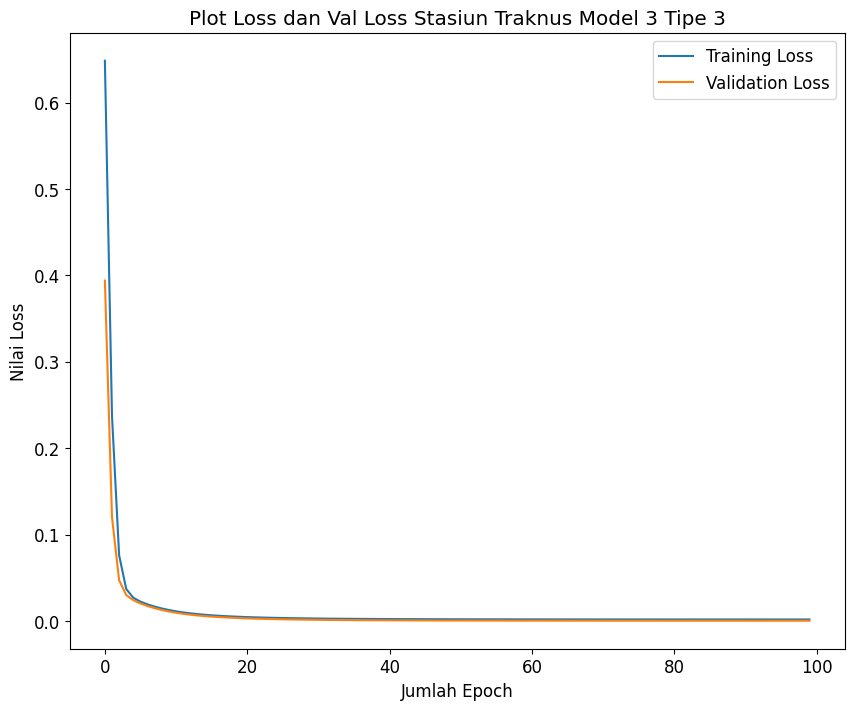

In [ ]:
# @title Plot Loss dan Val Loss
# plot history loss dan validation loss
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel("Jumlah Epoch")
plt.ylabel("Nilai Loss")
plt.title("Plot Loss dan Val Loss Stasiun Traknus Model 3 Tipe 3")
plt.legend()

In [ ]:
# @title Prediksi LSTM
# prediksi data training
trainY_pred= model.predict(trainX_normalized)
trainY_pred = np.maximum(trainY_pred, 0)

#prediksi data testing
testY_pred= model.predict(testX_normalized)
testY_pred= np.maximum(testY_pred, 0)

29/29 [==============================] - 0s 3ms/step


In [ ]:
# @title Denormalisasi Data
# denormalisasi nilai hasil prediksi dari data training
trainY_pred_denormalized = scaler_Y.inverse_transform(trainY_pred)

# denormalisasi nilai hasil prediksi dari data testing
testY_pred_denormalized = scaler_Y.inverse_transform(testY_pred)

# denormalisasi nilai aktual dari data training
trainY_denormalized = scaler_Y.inverse_transform(trainY_normalized)

# denormalisasi nilai aktual dari data testing
testY_denormalized = scaler_Y.inverse_transform(testY_normalized)


# Print the shape of denormalized predictions
print('Denormalized trainY_pred_denormalized shape: {}'.format(trainY_pred_denormalized.shape))
print('Denormalized testY_pred_denormalized shape: {}'.format(testY_pred_denormalized.shape))

# Print the shape of denormalized actual
print('Denormalized trainY_denormalized shape: {}'.format(trainY_denormalized.shape))
print('Denormalized testY_denormalized shape: {}'.format(testY_denormalized.shape))

Denormalized trainY_pred_denormalized shape: (3704, 1)
Denormalized testY_pred_denormalized shape: (927, 1)
Denormalized trainY_denormalized shape: (3704, 1)
Denormalized testY_denormalized shape: (927, 1)


In [ ]:
# @title RMSE
# calculate root mean squared error
# hasil RMSE di jadikan bilangan desimal
from sklearn.metrics import mean_squared_error
#Cari RMSE Train
rmse = np.sqrt(np.mean(np.square(trainY_denormalized - trainY_pred_denormalized)))
print(f'Root Mean Squared Error on Train Set: {rmse}')
#Cari RMSE Test
rmse = np.sqrt(np.mean(np.square(testY_denormalized - testY_pred_denormalized )))
print(f'Root Mean Squared Error on Test Set: {rmse}')

Root Mean Squared Error on Train Set: 2.669690064505867
Root Mean Squared Error on Test Set: 1.9798290327720045


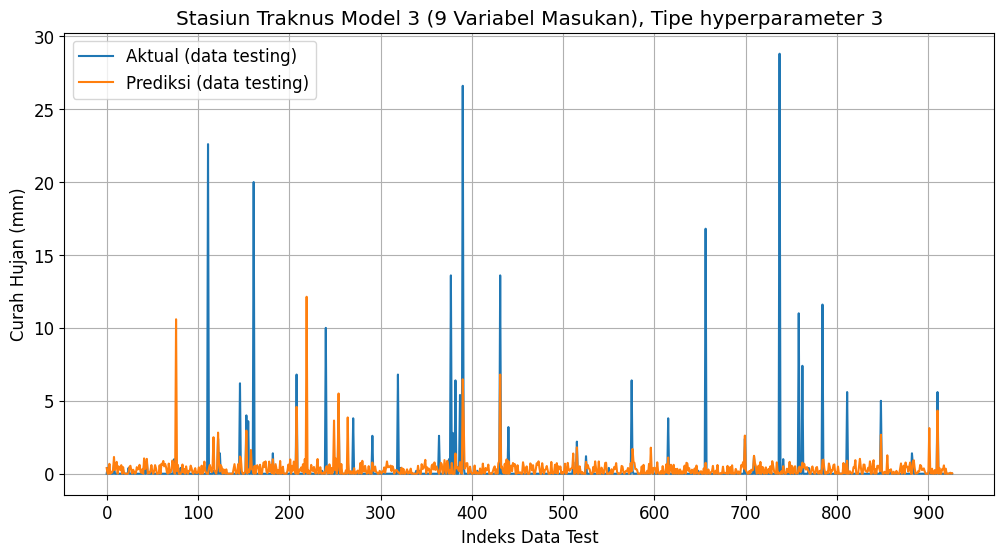

In [ ]:
# @title Plot Hasil Prediksi Data Testing

# Membuat dataframe untuk nilai aktual dan prediksi dari data pengujian
df_result_test = pd.DataFrame({'Aktual': testY_denormalized.flatten(), 'Prediksi': testY_pred_denormalized.flatten()})
#df_result_test['Aktual'] = df_result_test['Aktual'].shift(1)

# Plot data pengujian
plt.figure(figsize=(12, 6))
plt.plot(df_result_test.index, df_result_test['Aktual'], label='Aktual (data testing)')
plt.plot(df_result_test.index, df_result_test['Prediksi'], label='Prediksi (data testing)')
plt.title('Stasiun Traknus Model 3 (9 Variabel Masukan), Tipe hyperparameter 3')
plt.xlabel('Indeks Data Test')
plt.ylabel('Curah Hujan (mm)')
#plt.xlim([0,1600])
plt.yticks(np.arange(0, 35, 5))
plt.xticks(np.arange(0, 1000, 100))
plt.grid()
plt.legend()
plt.show()

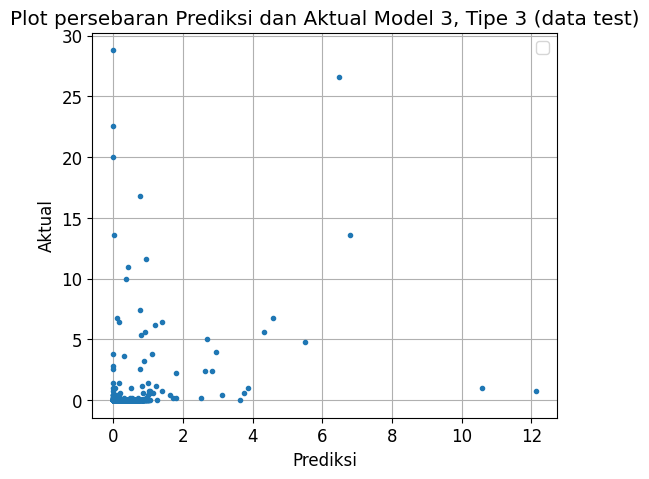

In [ ]:
# @title persebaran prediksi dan aktual data test
plt.figure(figsize=(6, 5))
plt.plot(df_result_test['Prediksi'], df_result_test['Aktual'], '.')
plt.title('Plot persebaran Prediksi dan Aktual Model 3, Tipe 3 (data test)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# @title Download Data Prediksi
# Membuat DataFrame dengan nilai prediksi dan aktual

df_result_test.to_excel("Traknus_model3_Tipe3.xlsx", index=True)

# Menampilkan DataFrame
from IPython.display import display
# Menampilkan DataFrame
display(df_result_test)

Aktual  Prediksi
0       0.0  0.392666
1       0.4  0.000000
2       0.0  0.000000
3       0.0  0.678690
4       0.0  0.000000
..      ...       ...
922     0.0  0.000000
923     0.0  0.023734
924     0.0  0.067628
925     0.0  0.000000
926     0.0  0.024423

[927 rows x 2 columns]

In [ ]:
# @title Atur threshold
# DATA TESTING
# Menentukan ambang batas untuk menentukan apakah hujan atau tidak
threshold = 0.5 # ambang batas penentu hujan atau tidak hujan

# Menambahkan kolom 'Hujan' berdasarkan threshold
df_result_test['Hujan_Aktual'] = np.where(df_result_test['Aktual'] >= threshold, 'Hujan', 'Tidak Hujan')
df_result_test['Hujan_Prediksi'] = np.where(df_result_test['Prediksi'] >= threshold, 'Hujan', 'Tidak Hujan')

from IPython.display import display
# Menampilkan DataFrame
display(df_result_test)

Aktual  Prediksi Hujan_Aktual Hujan_Prediksi
0       0.0  0.392666  Tidak Hujan    Tidak Hujan
1       0.4  0.000000  Tidak Hujan    Tidak Hujan
2       0.0  0.000000  Tidak Hujan    Tidak Hujan
3       0.0  0.678690  Tidak Hujan          Hujan
4       0.0  0.000000  Tidak Hujan    Tidak Hujan
..      ...       ...          ...            ...
922     0.0  0.000000  Tidak Hujan    Tidak Hujan
923     0.0  0.023734  Tidak Hujan    Tidak Hujan
924     0.0  0.067628  Tidak Hujan    Tidak Hujan
925     0.0  0.000000  Tidak Hujan    Tidak Hujan
926     0.0  0.024423  Tidak Hujan    Tidak Hujan

[927 rows x 4 columns]

In [ ]:
# @title Nilai Persentase CH data Testing

# Mencari Nilai Persentase Curah Hujan dan Tidak Hujan DATA TESTING

# Menghitung jumlah data pada setiap kategori
jumlah_hujan_prediksi_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Hujan') & (df_result_test['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_test['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_tidak_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_test['Prediksi'] < threshold)].shape[0]
jumlah_hujan_prediksi_tidak_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Hujan') & (df_result_test['Prediksi'] < threshold)].shape[0]

# Menghitung total data
total_data = df_result_test.shape[0]

# Menghitung persentase
persentase_hujan_prediksi_hujan = (jumlah_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_hujan = (jumlah_tidak_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_tidak_hujan = (jumlah_tidak_hujan_prediksi_tidak_hujan / total_data) * 100
persentase_hujan_prediksi_tidak_hujan = (jumlah_hujan_prediksi_tidak_hujan / total_data) * 100

# Menampilkan hasil
print(f'Persentase Hujan Aktual dan Prediksi Hujan: {persentase_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Hujan: {persentase_tidak_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: {persentase_tidak_hujan_prediksi_tidak_hujan:.2f}%')
print(f'Persentase Hujan Aktual dan Prediksi Tidak Hujan: {persentase_hujan_prediksi_tidak_hujan:.2f}%')


Persentase Hujan Aktual dan Prediksi Hujan: 3.67%
Persentase Tidak Hujan Aktual dan Prediksi Hujan: 18.77%
Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: 75.62%
Persentase Hujan Aktual dan Prediksi Tidak Hujan: 1.94%


In [ ]:
# @title Confusion matrix TESTING
# Buat Confusion Matrix Untuk Hasil Prediksi DATA TESTING
from sklearn.metrics import confusion_matrix

# Mengubah prediksi menjadi biner berdasarkan ambang batas (threshold)
df_result_test['Prediksi_Biner'] = df_result_test['Prediksi'].apply(lambda x: 'Hujan' if x >= threshold else 'Tidak Hujan')

# Menghitung matriks kebingungan
c_matrix = confusion_matrix(df_result_test['Hujan_Aktual'], df_result_test['Hujan_Prediksi'])

# Menampilkan matriks kebingungan
print(c_matrix)

[[ 34  18]
 [174 701]]


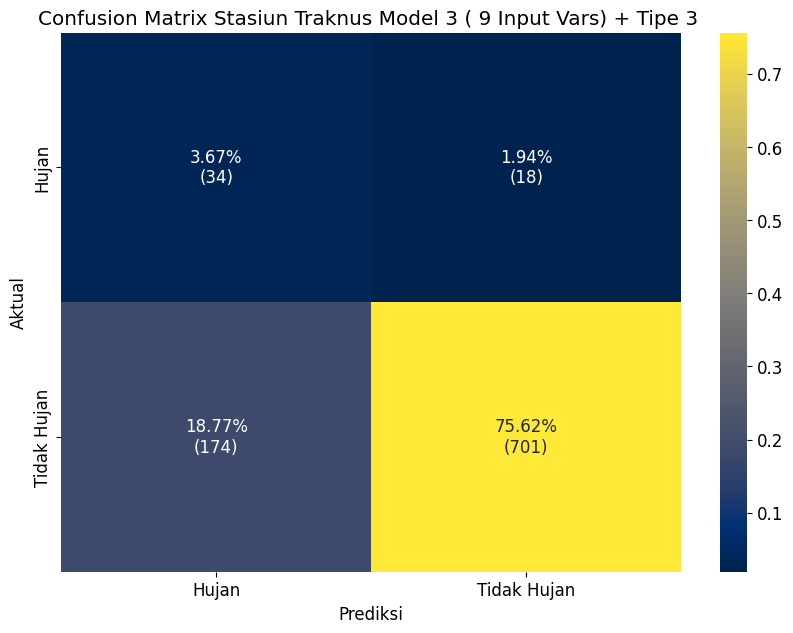

In [ ]:
# @title Plot Confusion Matrix Data Test
# Membuat DataFrame dari matriks kebingungan
df_cm = pd.DataFrame(c_matrix, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Menghitung persentase untuk setiap kelas dalam matriks kebingungan
c_matrix_percentage = c_matrix / np.sum(c_matrix)

# Membuat DataFrame dari matriks kebingungan persentase
df_cm_percentage = pd.DataFrame(c_matrix_percentage, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Membuat anotasi baru dengan jumlah dan persentase
annotations = df_cm_percentage.applymap(lambda x: '{:.2%}'.format(x)) + '\n(' + df_cm.astype(str) + ')'

# Membuat heatmap dari DataFrame
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_percentage, annot=annotations, fmt='', cmap='cividis')
plt.title('Confusion Matrix Stasiun Traknus Model 3 ( 9 Input Vars) + Tipe 3 ')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

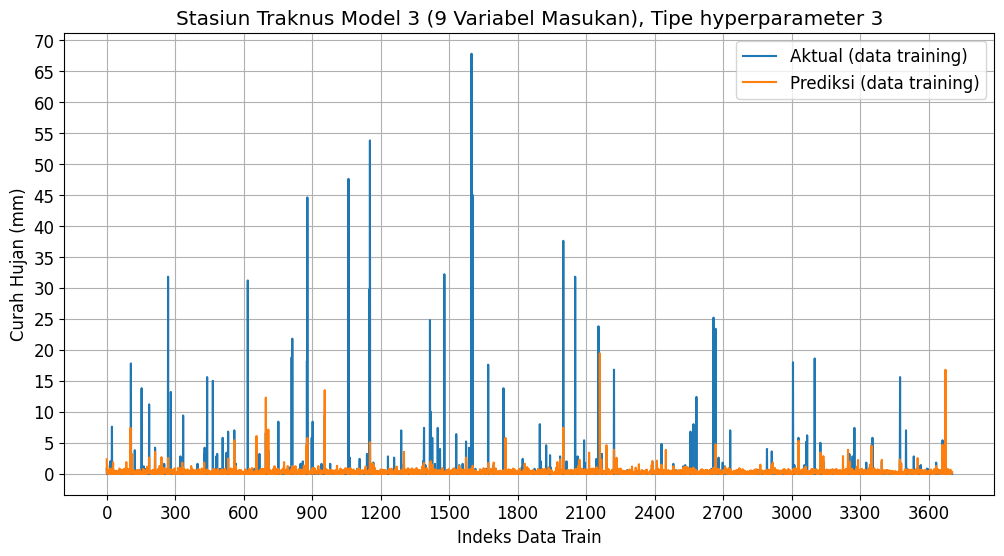

In [ ]:
# @title Plot Hasil Prediksi Data Training

# Membuat dataframe untuk nilai aktual dan prediksi dari data pengujian
df_result_train = pd.DataFrame({'Aktual': trainY_denormalized.flatten(), 'Prediksi': trainY_pred_denormalized.flatten()})
#df_result_train['Aktual'] = df_result_train['Aktual'].shift(1)

# Plot data pengujian
plt.figure(figsize=(12, 6))
plt.plot(df_result_train.index, df_result_train['Aktual'], label='Aktual (data training)')
plt.plot(df_result_train.index, df_result_train['Prediksi'], label='Prediksi (data training)')
plt.title('Stasiun Traknus Model 3 (9 Variabel Masukan), Tipe hyperparameter 3')
plt.xlabel('Indeks Data Train')
plt.ylabel('Curah Hujan (mm)')
#plt.xlim([0,7500])
plt.yticks(np.arange(0, 75, 5))
plt.xticks(np.arange(0, 3720, 300))
plt.grid()
plt.legend()
plt.show()

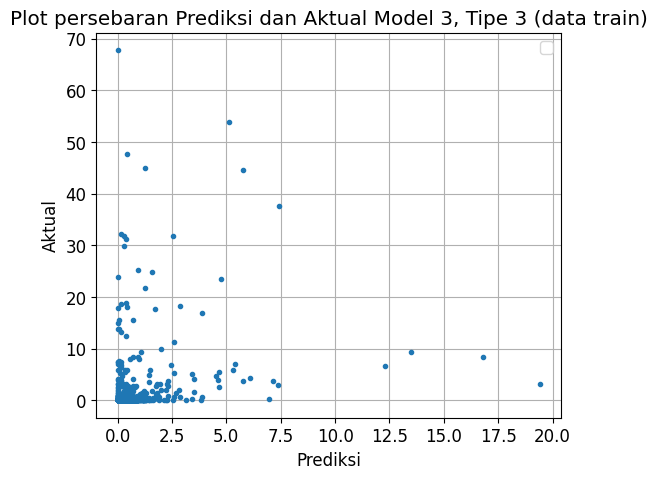

In [ ]:
# @title persebaran prediksi dan aktual data train
plt.figure(figsize=(6, 5))
plt.plot(df_result_train['Prediksi'], df_result_train['Aktual'], '.')
plt.title('Plot persebaran Prediksi dan Aktual Model 3, Tipe 3 (data train)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
# plt.xlim([0,6500])
plt.grid()
plt.legend()
plt.show()

In [ ]:
# @title buat dataframe training
# Membuat DataFrame dengan nilai prediksi dan aktual
df_result_train = pd.DataFrame({'Aktual': trainY_denormalized.flatten(), 'Prediksi': trainY_pred_denormalized.flatten()})
# df_result_train['Aktual'] = df_result_train['Aktual'].shift(1)
# Menampilkan DataFrame
from IPython.display import display
# Menampilkan DataFrame
display(df_result_train)

Aktual  Prediksi
0        0.8  2.329916
1        0.0  0.142477
2        0.2  1.443986
3        0.0  0.826098
4        0.0  0.637424
...      ...       ...
3699     0.0  0.431518
3700     0.0  0.127456
3701     0.0  0.119194
3702     0.0  0.096005
3703     0.0  0.235708

[3704 rows x 2 columns]

In [ ]:
# @title thrashold data training
# DATA TRAINING
# Menentukan ambang batas untuk menentukan apakah hujan atau tidak
threshold = 0.5  # Anda dapat menyesuaikan nilai threshold sesuai kebutuhan

# Menambahkan kolom 'Hujan' berdasarkan threshold
df_result_train['Hujan_Aktual'] = np.where(df_result_train['Aktual'] >= threshold, 'Hujan', 'Tidak Hujan')
df_result_train['Hujan_Prediksi'] = np.where(df_result_train['Prediksi'] >= threshold, 'Hujan', 'Tidak Hujan')

from IPython.display import display
# Menampilkan DataFrame
display(df_result_train)

Aktual  Prediksi Hujan_Aktual Hujan_Prediksi
0        0.8  2.329916        Hujan          Hujan
1        0.0  0.142477  Tidak Hujan    Tidak Hujan
2        0.2  1.443986  Tidak Hujan          Hujan
3        0.0  0.826098  Tidak Hujan          Hujan
4        0.0  0.637424  Tidak Hujan          Hujan
...      ...       ...          ...            ...
3699     0.0  0.431518  Tidak Hujan    Tidak Hujan
3700     0.0  0.127456  Tidak Hujan    Tidak Hujan
3701     0.0  0.119194  Tidak Hujan    Tidak Hujan
3702     0.0  0.096005  Tidak Hujan    Tidak Hujan
3703     0.0  0.235708  Tidak Hujan    Tidak Hujan

[3704 rows x 4 columns]

In [ ]:
# @title nilai persen CH training
# Menghitung jumlah data pada setiap kategori
jumlah_hujan_prediksi_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Hujan') & (df_result_train['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_train['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_tidak_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_train['Prediksi'] < threshold)].shape[0]
jumlah_hujan_prediksi_tidak_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Hujan') & (df_result_train['Prediksi'] < threshold)].shape[0]

# Menghitung total data
total_data = df_result_train.shape[0]

# Menghitung persentase
persentase_hujan_prediksi_hujan = (jumlah_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_hujan = (jumlah_tidak_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_tidak_hujan = (jumlah_tidak_hujan_prediksi_tidak_hujan / total_data) * 100
persentase_hujan_prediksi_tidak_hujan = (jumlah_hujan_prediksi_tidak_hujan / total_data) * 100

# Menampilkan hasil
print(f'Persentase Hujan Aktual dan Prediksi Hujan: {persentase_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Hujan: {persentase_tidak_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: {persentase_tidak_hujan_prediksi_tidak_hujan:.2f}%')
print(f'Persentase Hujan Aktual dan Prediksi Tidak Hujan: {persentase_hujan_prediksi_tidak_hujan:.2f}%')


Persentase Hujan Aktual dan Prediksi Hujan: 2.40%
Persentase Tidak Hujan Aktual dan Prediksi Hujan: 17.09%
Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: 77.94%
Persentase Hujan Aktual dan Prediksi Tidak Hujan: 2.56%


In [ ]:
# @title Confusion Matrix TRAINING
# Buat Confusion Matrix Untuk Hasil Prediksi DATA Train
from sklearn.metrics import confusion_matrix

# Mengubah prediksi menjadi biner berdasarkan ambang batas (threshold)
df_result_train['Prediksi_Biner'] = df_result_train['Prediksi'].apply(lambda x: 'Hujan' if x >= threshold else 'Tidak Hujan')

# Menghitung matriks kebingungan
c_matrix = confusion_matrix(df_result_train['Hujan_Aktual'], df_result_train['Hujan_Prediksi'])

# Menampilkan matriks kebingungan
print(c_matrix)

[[  89   95]
 [ 633 2887]]


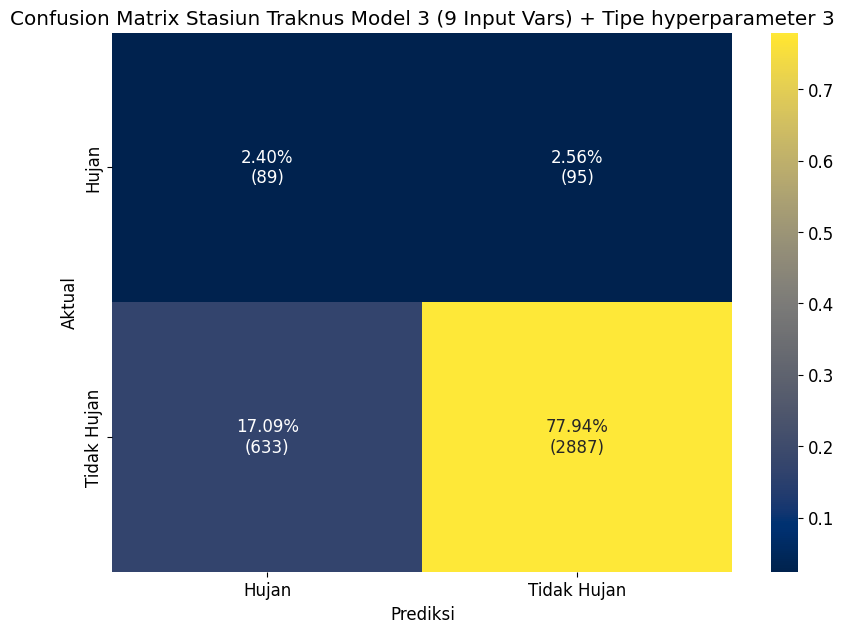

In [ ]:
# @title PLot Confusion Matrix Data Training
# Membuat DataFrame dari matriks kebingungan
df_cm = pd.DataFrame(c_matrix, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Menghitung persentase untuk setiap kelas dalam matriks kebingungan
c_matrix_percentage = c_matrix / np.sum(c_matrix)

# Membuat DataFrame dari matriks kebingungan persentase
df_cm_percentage = pd.DataFrame(c_matrix_percentage, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Membuat anotasi baru dengan jumlah dan persentase
annotations = df_cm_percentage.applymap(lambda x: '{:.2%}'.format(x)) + '\n(' + df_cm.astype(str) + ')'

# Membuat heatmap dari DataFrame
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_percentage, annot=annotations, fmt='', cmap='cividis')
plt.title('Confusion Matrix Stasiun Traknus Model 3 (9 Input Vars) + Tipe hyperparameter 3')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Model 3 Tipe 4

In [ ]:
# @title Baca Dataset
data=pd.read_csv('/content/Deep/Traknus_Station.csv')
data

datetime  Unnamed: 0  rainfall  airtemp  airhum  windspeed  \
0        9/5/2022 12:00           0       0.0     34.5   64.60      11.99   
1        9/5/2022 13:00           1       0.0     34.1   66.54      10.34   
2        9/5/2022 14:00           2       0.0     34.2   63.22       8.95   
3        9/5/2022 15:00           3       0.0     33.4   67.26       8.20   
4        9/5/2022 16:00           4       0.0     31.1   71.64      11.25   
...                 ...         ...       ...      ...     ...        ...   
10748   11/27/2023 8:00       10748       0.0     25.4   94.92       4.70   
10749   11/27/2023 9:00       10749       0.0     27.5   94.90       4.90   
10750  11/27/2023 10:00       10750       0.0     28.1   94.56       5.37   
10751  11/27/2023 11:00       10751       0.0     28.8   91.20       4.23   
10752  11/27/2023 12:00       10752       0.0     29.8   86.60       3.41   

         windir  airpress  uvrad       DoY       Jam  
0      0.391857   1007.34    0.0  0.904117  0.843854  
1      0.988705   1006.58    0.0  0.904117  0.907447  
2     -0.432178   1005.30    0.0  0.904117  0.136737  
3      0.985897   1004.70    0.0  0.904117 -0.759688  
4      1.000000   1004.84    0.0  0.904117 -0.957659  
...         ...       ...    ...       ...       ...  
10748  0.819306   1008.32   14.2  0.966420 -0.145500  
10749  0.895984   1008.60   19.8  0.966420 -0.911130  
10750 -0.171688   1008.50   20.1  0.966420 -0.839072  
10751 -0.892018   1007.94   26.6  0.966420  0.004426  
10752 -0.730194   1007.20   25.2  0.966420  0.843854  

[10753 rows x 11 columns]

In [ ]:
# @title Sequensial dan interpolasi Linear
X = []
y = []
length = 12
fut = 1
for i in range(length+fut, len(data)-fut):
    potong = data[i-length-fut:i]
    missing_count = potong.isnull().sum()
    if missing_count.any() > 2:
        # Jika lebih dari 2 jam data yang kosong, lanjut ke iterasi berikutnya
        continue
    elif missing_count.any() == 2:
        # Jika ada dua jam data yang kosong berurutan, interpolasi
        idx_missing = potong[potong.isnull()].index
        if len(idx_missing) == 2 and idx_missing[1] - idx_missing[0] == 1:
            potong.iloc[idx_missing[0]:idx_missing[1]+1] = potong.iloc[idx_missing[0]:idx_missing[1]+1].interpolate(method='linear', inplace=True)

    if potong.isnull().values.any():
        # print("ada nan: ", potong)
        continue
    else:
        X.append(potong[:length])
        y.append(potong[length:]["rainfall"])

In [ ]:
# @title Shuffle dan bagi data latih dan data uji
#buat rentang data latih
training_number = int(0.8*len(X))
#shuffle dataset
perm = np.random.permutation(len(X))
#pilih colom target
cols = ["rainfall", "airtemp", "airhum", "windspeed", "windir", "airpress", "uvrad", "DoY", "Jam"]
#buat list dataset menjadi array
X_array = np.array([xx[cols].values for xx in X])
y_array = np.array([yy.values for yy in y])
#pisahkan data latih 80%
trainX = X_array[perm[:training_number]]
trainY = y_array[perm[:training_number]]
#pisahkan datauji 20%
testX = X_array[perm[training_number:]]
testY = y_array[perm[training_number:]]

In [ ]:
# @title Normalisasi Data

from sklearn.preprocessing import MinMaxScaler

# Normalizing trainX and testX
scaler_X = MinMaxScaler()
trainX_normalized = scaler_X.fit_transform(trainX.reshape(-1, trainX.shape[-1])).reshape(trainX.shape)
testX_normalized = scaler_X.transform(testX.reshape(-1, testX.shape[-1])).reshape(testX.shape)

# Normalizing trainY and testY
scaler_Y = MinMaxScaler()
trainY_normalized = scaler_Y.fit_transform(trainY.reshape(-1, 1)).reshape(trainY.shape)
testY_normalized = scaler_Y.transform(testY.reshape(-1, 1)).reshape(testY.shape)

# Print the shapes of normalized data
print('Normalized trainX shape: {}'.format(trainX_normalized.shape))
print('Normalized trainY shape: {}'.format(trainY_normalized.shape))
print('Normalized testX shape: {}'.format(testX_normalized.shape))
print('Normalized testY shape: {}'.format(testY_normalized.shape))

Normalized trainX shape: (5252, 12, 9)
Normalized trainY shape: (5252, 1)
Normalized testX shape: (1313, 12, 9)
Normalized testY shape: (1313, 1)


In [ ]:
# @title Model Vanilla LSTM

# buat model vanilla LSTM
model=Sequential()
model.add(LSTM(units=1, input_shape=(trainX_normalized.shape[1],trainX_normalized.shape[2])))
model.add(Dense(trainY_normalized.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 1)                 44        
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 46 (184.00 Byte)
Trainable params: 46 (184.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# @title Epoch dan Batch Size

# fit model untuk pelatihan data
history=model.fit(trainX_normalized, trainY_normalized,
                  epochs=200, batch_size=50,
                  validation_split=0.2, verbose=1, shuffle=False)

Epoch 1/200
85/85 [==============================] - 4s 20ms/step - loss: 0.0204 - val_loss: 0.0109
Epoch 2/200
85/85 [==============================] - 1s 8ms/step - loss: 0.0077 - val_loss: 0.0054
Epoch 3/200
85/85 [==============================] - 1s 7ms/step - loss: 0.0044 - val_loss: 0.0034
Epoch 4/200
85/85 [==============================] - 1s 7ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 5/200
85/85 [==============================] - 1s 7ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 6/200
85/85 [==============================] - 1s 9ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 7/200
85/85 [==============================] - 1s 10ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 8/200
85/85 [==============================] - 1s 11ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 9/200
85/85 [==============================] - 1s 8ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 10/200
85/85 [==============================] - 1s 7ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 

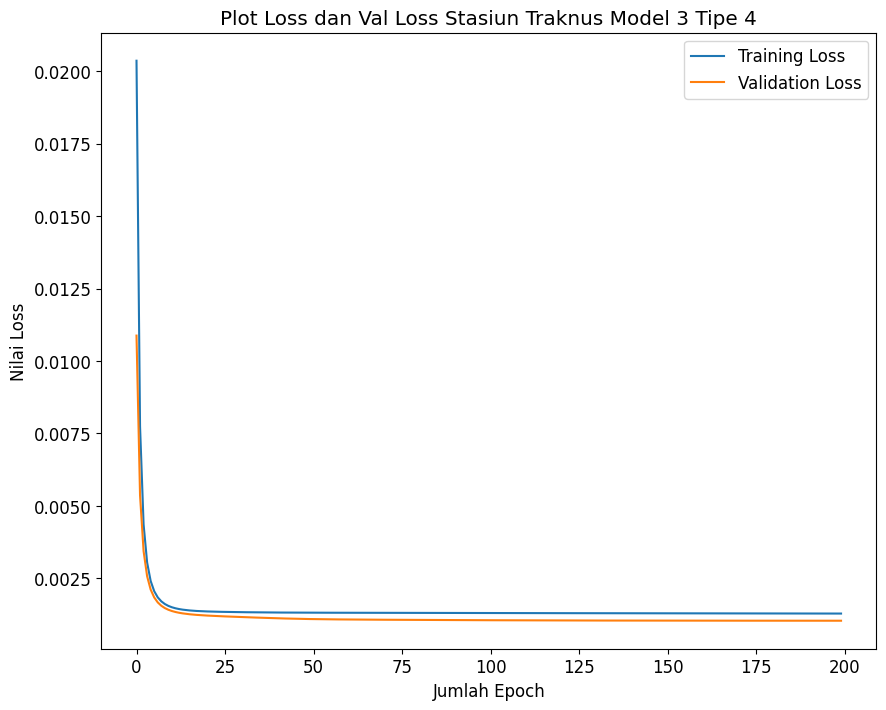

In [ ]:
# @title Plot Loss dan Val Loss
# plot history loss dan validation loss
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel("Jumlah Epoch")
plt.ylabel("Nilai Loss")
plt.title("Plot Loss dan Val Loss Stasiun Traknus Model 3 Tipe 4")
plt.legend()

In [ ]:
# @title Prediksi LSTM
# prediksi data training
trainY_pred= model.predict(trainX_normalized)
trainY_pred = np.maximum(trainY_pred, 0)

#prediksi data testing
testY_pred= model.predict(testX_normalized)
testY_pred= np.maximum(testY_pred, 0)

42/42 [==============================] - 0s 4ms/step


In [ ]:
# @title Denormalisasi Data
# denormalisasi nilai hasil prediksi dari data training
trainY_pred_denormalized = scaler_Y.inverse_transform(trainY_pred)

# denormalisasi nilai hasil prediksi dari data testing
testY_pred_denormalized = scaler_Y.inverse_transform(testY_pred)

# denormalisasi nilai aktual dari data training
trainY_denormalized = scaler_Y.inverse_transform(trainY_normalized)

# denormalisasi nilai aktual dari data testing
testY_denormalized = scaler_Y.inverse_transform(testY_normalized)


# Print the shape of denormalized predictions
print('Denormalized trainY_pred_denormalized shape: {}'.format(trainY_pred_denormalized.shape))
print('Denormalized testY_pred_denormalized shape: {}'.format(testY_pred_denormalized.shape))

# Print the shape of denormalized actual
print('Denormalized trainY_denormalized shape: {}'.format(trainY_denormalized.shape))
print('Denormalized testY_denormalized shape: {}'.format(testY_denormalized.shape))

Denormalized trainY_pred_denormalized shape: (5252, 1)
Denormalized testY_pred_denormalized shape: (1313, 1)
Denormalized trainY_denormalized shape: (5252, 1)
Denormalized testY_denormalized shape: (1313, 1)


In [ ]:
# @title RMSE
# calculate root mean squared error
# hasil RMSE di jadikan bilangan desimal
from sklearn.metrics import mean_squared_error
#Cari RMSE Train
rmse = np.sqrt(np.mean(np.square(trainY_denormalized - trainY_pred_denormalized)))
print(f'Root Mean Squared Error on Train Set: {rmse}')
#Cari RMSE Test
rmse = np.sqrt(np.mean(np.square(testY_denormalized - testY_pred_denormalized )))
print(f'Root Mean Squared Error on Test Set: {rmse}')

Root Mean Squared Error on Train Set: 2.431854002433734
Root Mean Squared Error on Test Set: 2.0783439504879917


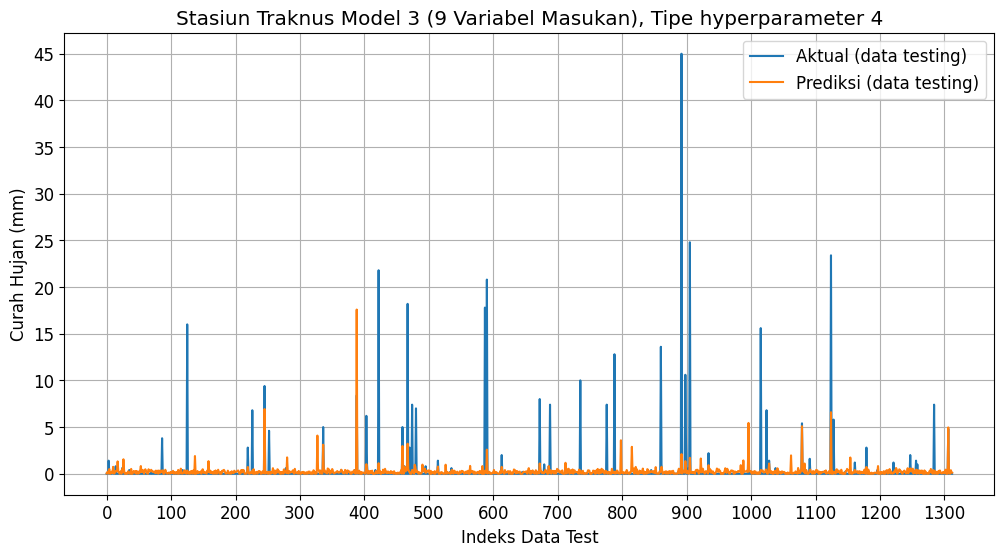

In [ ]:
# @title Plot Hasil Prediksi Data Testing

# Membuat dataframe untuk nilai aktual dan prediksi dari data pengujian
df_result_test = pd.DataFrame({'Aktual': testY_denormalized.flatten(), 'Prediksi': testY_pred_denormalized.flatten()})
#df_result_test['Aktual'] = df_result_test['Aktual'].shift(1)

# Plot data pengujian
plt.figure(figsize=(12, 6))
plt.plot(df_result_test.index, df_result_test['Aktual'], label='Aktual (data testing)')
plt.plot(df_result_test.index, df_result_test['Prediksi'], label='Prediksi (data testing)')
plt.title('Stasiun Traknus Model 3 (9 Variabel Masukan), Tipe hyperparameter 4')
plt.xlabel('Indeks Data Test')
plt.ylabel('Curah Hujan (mm)')
#plt.xlim([0,1600])
plt.yticks(np.arange(0, 50, 5))
plt.xticks(np.arange(0, 1400, 100))
plt.grid()
plt.legend()
plt.show()

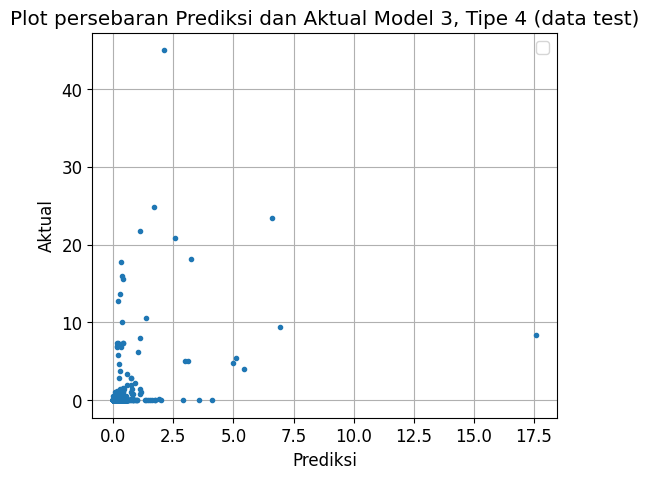

In [ ]:
# @title persebaran prediksi dan aktual data test
plt.figure(figsize=(6, 5))
plt.plot(df_result_test['Prediksi'], df_result_test['Aktual'], '.')
plt.title('Plot persebaran Prediksi dan Aktual Model 3, Tipe 4 (data test)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# @title Download Data Prediksi
# Membuat DataFrame dengan nilai prediksi dan aktual

df_result_test.to_excel("Traknus_model3_Tipe4.xlsx", index=True)

# Menampilkan DataFrame
from IPython.display import display
# Menampilkan DataFrame
display(df_result_test)

Aktual  Prediksi
0        0.0  0.037119
1        0.0  0.176309
2        0.0  0.032694
3        1.4  0.287245
4        0.2  0.494527
...      ...       ...
1308     0.0  0.025589
1309     0.0  0.000000
1310     0.0  0.377624
1311     0.0  0.165089
1312     0.0  0.120255

[1313 rows x 2 columns]

In [ ]:
# @title Atur threshold
# DATA TESTING
# Menentukan ambang batas untuk menentukan apakah hujan atau tidak
threshold = 0.5 # ambang batas penentu hujan atau tidak hujan

# Menambahkan kolom 'Hujan' berdasarkan threshold
df_result_test['Hujan_Aktual'] = np.where(df_result_test['Aktual'] >= threshold, 'Hujan', 'Tidak Hujan')
df_result_test['Hujan_Prediksi'] = np.where(df_result_test['Prediksi'] >= threshold, 'Hujan', 'Tidak Hujan')

from IPython.display import display
# Menampilkan DataFrame
display(df_result_test)

Aktual  Prediksi Hujan_Aktual Hujan_Prediksi
0        0.0  0.037119  Tidak Hujan    Tidak Hujan
1        0.0  0.176309  Tidak Hujan    Tidak Hujan
2        0.0  0.032694  Tidak Hujan    Tidak Hujan
3        1.4  0.287245        Hujan    Tidak Hujan
4        0.2  0.494527  Tidak Hujan    Tidak Hujan
...      ...       ...          ...            ...
1308     0.0  0.025589  Tidak Hujan    Tidak Hujan
1309     0.0  0.000000  Tidak Hujan    Tidak Hujan
1310     0.0  0.377624  Tidak Hujan    Tidak Hujan
1311     0.0  0.165089  Tidak Hujan    Tidak Hujan
1312     0.0  0.120255  Tidak Hujan    Tidak Hujan

[1313 rows x 4 columns]

In [ ]:
# @title Nilai Persentase CH data Testing

# Mencari Nilai Persentase Curah Hujan dan Tidak Hujan DATA TESTING

# Menghitung jumlah data pada setiap kategori
jumlah_hujan_prediksi_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Hujan') & (df_result_test['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_test['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_tidak_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_test['Prediksi'] < threshold)].shape[0]
jumlah_hujan_prediksi_tidak_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Hujan') & (df_result_test['Prediksi'] < threshold)].shape[0]

# Menghitung total data
total_data = df_result_test.shape[0]

# Menghitung persentase
persentase_hujan_prediksi_hujan = (jumlah_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_hujan = (jumlah_tidak_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_tidak_hujan = (jumlah_tidak_hujan_prediksi_tidak_hujan / total_data) * 100
persentase_hujan_prediksi_tidak_hujan = (jumlah_hujan_prediksi_tidak_hujan / total_data) * 100

# Menampilkan hasil
print(f'Persentase Hujan Aktual dan Prediksi Hujan: {persentase_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Hujan: {persentase_tidak_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: {persentase_tidak_hujan_prediksi_tidak_hujan:.2f}%')
print(f'Persentase Hujan Aktual dan Prediksi Tidak Hujan: {persentase_hujan_prediksi_tidak_hujan:.2f}%')


Persentase Hujan Aktual dan Prediksi Hujan: 2.28%
Persentase Tidak Hujan Aktual dan Prediksi Hujan: 4.42%
Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: 90.94%
Persentase Hujan Aktual dan Prediksi Tidak Hujan: 2.36%


In [ ]:
# @title Confusion matrix TESTING
# Buat Confusion Matrix Untuk Hasil Prediksi DATA TESTING
from sklearn.metrics import confusion_matrix

# Mengubah prediksi menjadi biner berdasarkan ambang batas (threshold)
df_result_test['Prediksi_Biner'] = df_result_test['Prediksi'].apply(lambda x: 'Hujan' if x >= threshold else 'Tidak Hujan')

# Menghitung matriks kebingungan
c_matrix = confusion_matrix(df_result_test['Hujan_Aktual'], df_result_test['Hujan_Prediksi'])

# Menampilkan matriks kebingungan
print(c_matrix)

[[  30   31]
 [  58 1194]]


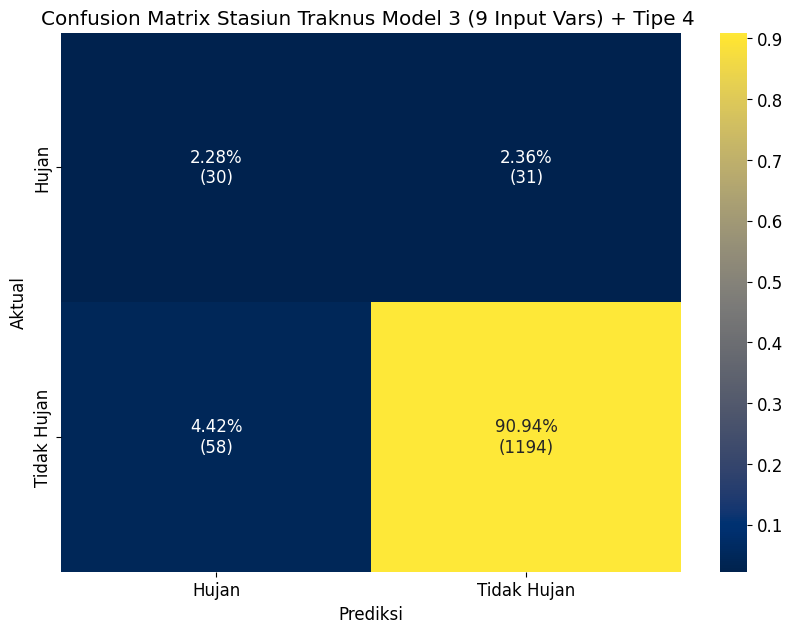

In [ ]:
# @title Plot Confusion Matrix Data Test
# Membuat DataFrame dari matriks kebingungan
df_cm = pd.DataFrame(c_matrix, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Menghitung persentase untuk setiap kelas dalam matriks kebingungan
c_matrix_percentage = c_matrix / np.sum(c_matrix)

# Membuat DataFrame dari matriks kebingungan persentase
df_cm_percentage = pd.DataFrame(c_matrix_percentage, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Membuat anotasi baru dengan jumlah dan persentase
annotations = df_cm_percentage.applymap(lambda x: '{:.2%}'.format(x)) + '\n(' + df_cm.astype(str) + ')'

# Membuat heatmap dari DataFrame
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_percentage, annot=annotations, fmt='', cmap='cividis')
plt.title('Confusion Matrix Stasiun Traknus Model 3 (9 Input Vars) + Tipe 4 ')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

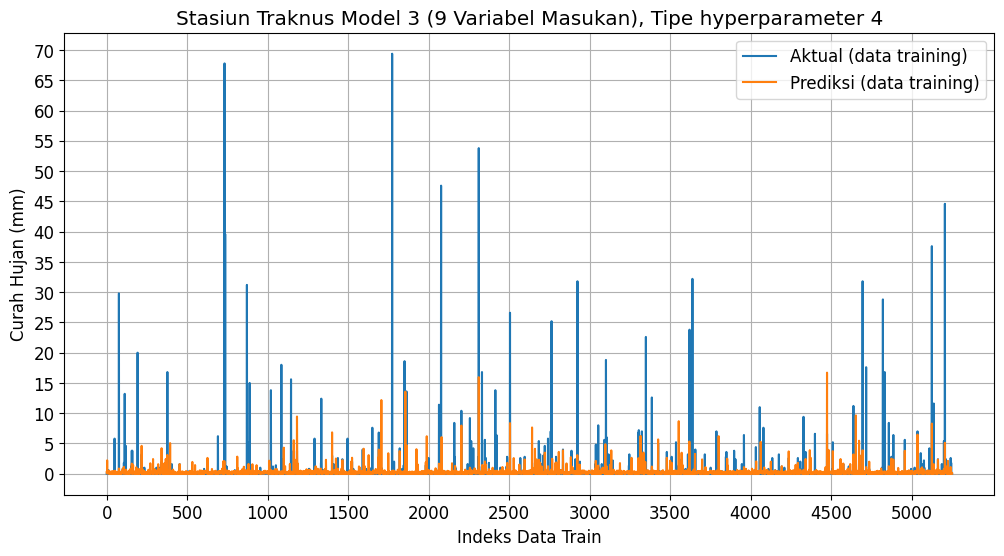

In [ ]:
# @title Plot Hasil Prediksi Data Training

# Membuat dataframe untuk nilai aktual dan prediksi dari data pengujian
df_result_train = pd.DataFrame({'Aktual': trainY_denormalized.flatten(), 'Prediksi': trainY_pred_denormalized.flatten()})
#df_result_train['Aktual'] = df_result_train['Aktual'].shift(1)

# Plot data pengujian
plt.figure(figsize=(12, 6))
plt.plot(df_result_train.index, df_result_train['Aktual'], label='Aktual (data training)')
plt.plot(df_result_train.index, df_result_train['Prediksi'], label='Prediksi (data training)')
plt.title('Stasiun Traknus Model 3 (9 Variabel Masukan), Tipe hyperparameter 4')
plt.xlabel('Indeks Data Train')
plt.ylabel('Curah Hujan (mm)')
#plt.xlim([0,7500])
plt.yticks(np.arange(0, 75, 5))
plt.xticks(np.arange(0, 5300, 500))
plt.grid()
plt.legend()
plt.show()

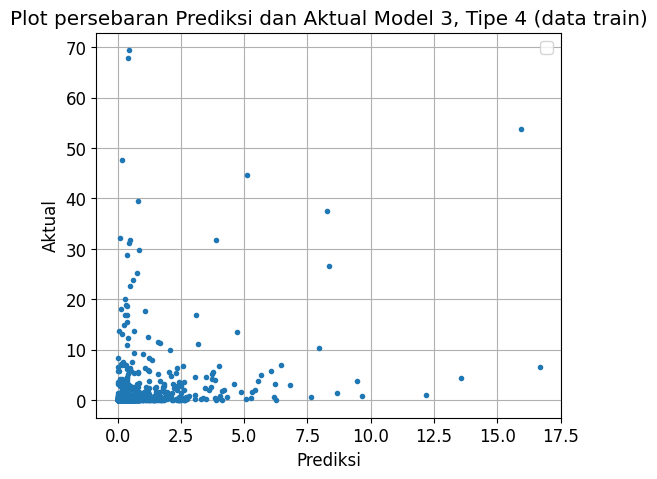

In [ ]:
# @title persebaran prediksi dan aktual data train
plt.figure(figsize=(6, 5))
plt.plot(df_result_train['Prediksi'], df_result_train['Aktual'], '.')
plt.title('Plot persebaran Prediksi dan Aktual Model 3, Tipe 4 (data train)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
# plt.xlim([0,6500])
plt.grid()
plt.legend()
plt.show()

In [ ]:
# @title buat dataframe training
# Membuat DataFrame dengan nilai prediksi dan aktual
df_result_train = pd.DataFrame({'Aktual': trainY_denormalized.flatten(), 'Prediksi': trainY_pred_denormalized.flatten()})
# df_result_train['Aktual'] = df_result_train['Aktual'].shift(1)
# Menampilkan DataFrame
from IPython.display import display
# Menampilkan DataFrame
display(df_result_train)

Aktual  Prediksi
0        0.0  0.264247
1        0.0  0.216245
2        0.0  0.059529
3        0.0  2.210618
4        0.0  0.270138
...      ...       ...
5247     0.0  0.101024
5248     0.0  0.146651
5249     0.0  0.000000
5250     0.0  0.000000
5251     0.0  0.000000

[5252 rows x 2 columns]

In [ ]:
# @title thrashold data training
# DATA TRAINING
# Menentukan ambang batas untuk menentukan apakah hujan atau tidak
threshold = 0.5  # Anda dapat menyesuaikan nilai threshold sesuai kebutuhan

# Menambahkan kolom 'Hujan' berdasarkan threshold
df_result_train['Hujan_Aktual'] = np.where(df_result_train['Aktual'] >= threshold, 'Hujan', 'Tidak Hujan')
df_result_train['Hujan_Prediksi'] = np.where(df_result_train['Prediksi'] >= threshold, 'Hujan', 'Tidak Hujan')

from IPython.display import display
# Menampilkan DataFrame
display(df_result_train)

Aktual  Prediksi Hujan_Aktual Hujan_Prediksi
0        0.0  0.264247  Tidak Hujan    Tidak Hujan
1        0.0  0.216245  Tidak Hujan    Tidak Hujan
2        0.0  0.059529  Tidak Hujan    Tidak Hujan
3        0.0  2.210618  Tidak Hujan          Hujan
4        0.0  0.270138  Tidak Hujan    Tidak Hujan
...      ...       ...          ...            ...
5247     0.0  0.101024  Tidak Hujan    Tidak Hujan
5248     0.0  0.146651  Tidak Hujan    Tidak Hujan
5249     0.0  0.000000  Tidak Hujan    Tidak Hujan
5250     0.0  0.000000  Tidak Hujan    Tidak Hujan
5251     0.0  0.000000  Tidak Hujan    Tidak Hujan

[5252 rows x 4 columns]

In [ ]:
# @title nilai persen CH training
# Menghitung jumlah data pada setiap kategori
jumlah_hujan_prediksi_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Hujan') & (df_result_train['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_train['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_tidak_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_train['Prediksi'] < threshold)].shape[0]
jumlah_hujan_prediksi_tidak_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Hujan') & (df_result_train['Prediksi'] < threshold)].shape[0]

# Menghitung total data
total_data = df_result_train.shape[0]

# Menghitung persentase
persentase_hujan_prediksi_hujan = (jumlah_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_hujan = (jumlah_tidak_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_tidak_hujan = (jumlah_tidak_hujan_prediksi_tidak_hujan / total_data) * 100
persentase_hujan_prediksi_tidak_hujan = (jumlah_hujan_prediksi_tidak_hujan / total_data) * 100

# Menampilkan hasil
print(f'Persentase Hujan Aktual dan Prediksi Hujan: {persentase_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Hujan: {persentase_tidak_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: {persentase_tidak_hujan_prediksi_tidak_hujan:.2f}%')
print(f'Persentase Hujan Aktual dan Prediksi Tidak Hujan: {persentase_hujan_prediksi_tidak_hujan:.2f}%')


Persentase Hujan Aktual dan Prediksi Hujan: 2.74%
Persentase Tidak Hujan Aktual dan Prediksi Hujan: 3.90%
Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: 91.11%
Persentase Hujan Aktual dan Prediksi Tidak Hujan: 2.25%


In [ ]:
# @title Confusion Matrix TRAINING
# Buat Confusion Matrix Untuk Hasil Prediksi DATA Train
from sklearn.metrics import confusion_matrix

# Mengubah prediksi menjadi biner berdasarkan ambang batas (threshold)
df_result_train['Prediksi_Biner'] = df_result_train['Prediksi'].apply(lambda x: 'Hujan' if x >= threshold else 'Tidak Hujan')

# Menghitung matriks kebingungan
c_matrix = confusion_matrix(df_result_train['Hujan_Aktual'], df_result_train['Hujan_Prediksi'])

# Menampilkan matriks kebingungan
print(c_matrix)

[[ 144  118]
 [ 205 4785]]


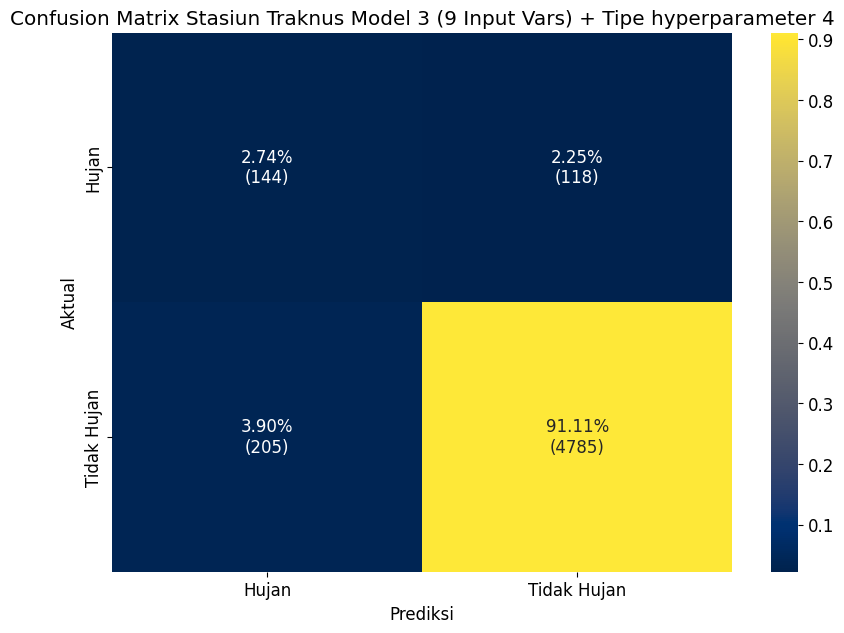

In [ ]:
# @title PLot Confusion Matrix Data Training
# Membuat DataFrame dari matriks kebingungan
df_cm = pd.DataFrame(c_matrix, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Menghitung persentase untuk setiap kelas dalam matriks kebingungan
c_matrix_percentage = c_matrix / np.sum(c_matrix)

# Membuat DataFrame dari matriks kebingungan persentase
df_cm_percentage = pd.DataFrame(c_matrix_percentage, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Membuat anotasi baru dengan jumlah dan persentase
annotations = df_cm_percentage.applymap(lambda x: '{:.2%}'.format(x)) + '\n(' + df_cm.astype(str) + ')'

# Membuat heatmap dari DataFrame
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_percentage, annot=annotations, fmt='', cmap='cividis')
plt.title('Confusion Matrix Stasiun Traknus Model 3 (9 Input Vars) + Tipe hyperparameter 4')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Model 3 Tipe 5

In [ ]:
# @title Baca Dataset
data=pd.read_csv('/content/Deep/Traknus_Station.csv')
data

datetime  Unnamed: 0  rainfall  airtemp  airhum  windspeed  \
0        9/5/2022 12:00           0       0.0     34.5   64.60      11.99   
1        9/5/2022 13:00           1       0.0     34.1   66.54      10.34   
2        9/5/2022 14:00           2       0.0     34.2   63.22       8.95   
3        9/5/2022 15:00           3       0.0     33.4   67.26       8.20   
4        9/5/2022 16:00           4       0.0     31.1   71.64      11.25   
...                 ...         ...       ...      ...     ...        ...   
10748   11/27/2023 8:00       10748       0.0     25.4   94.92       4.70   
10749   11/27/2023 9:00       10749       0.0     27.5   94.90       4.90   
10750  11/27/2023 10:00       10750       0.0     28.1   94.56       5.37   
10751  11/27/2023 11:00       10751       0.0     28.8   91.20       4.23   
10752  11/27/2023 12:00       10752       0.0     29.8   86.60       3.41   

         windir  airpress  uvrad       DoY       Jam  
0      0.391857   1007.34    0.0  0.904117  0.843854  
1      0.988705   1006.58    0.0  0.904117  0.907447  
2     -0.432178   1005.30    0.0  0.904117  0.136737  
3      0.985897   1004.70    0.0  0.904117 -0.759688  
4      1.000000   1004.84    0.0  0.904117 -0.957659  
...         ...       ...    ...       ...       ...  
10748  0.819306   1008.32   14.2  0.966420 -0.145500  
10749  0.895984   1008.60   19.8  0.966420 -0.911130  
10750 -0.171688   1008.50   20.1  0.966420 -0.839072  
10751 -0.892018   1007.94   26.6  0.966420  0.004426  
10752 -0.730194   1007.20   25.2  0.966420  0.843854  

[10753 rows x 11 columns]

In [ ]:
# @title Sequensial dan interpolasi Linear
X = []
y = []
length = 6
fut = 1
for i in range(length+fut, len(data)-fut):
    potong = data[i-length-fut:i]
    missing_count = potong.isnull().sum()
    if missing_count.any() > 2:
        # Jika lebih dari 2 jam data yang kosong, lanjut ke iterasi berikutnya
        continue
    elif missing_count.any() == 2:
        # Jika ada dua jam data yang kosong berurutan, interpolasi
        idx_missing = potong[potong.isnull()].index
        if len(idx_missing) == 2 and idx_missing[1] - idx_missing[0] == 1:
            potong.iloc[idx_missing[0]:idx_missing[1]+1] = potong.iloc[idx_missing[0]:idx_missing[1]+1].interpolate(method='linear', inplace=True)

    if potong.isnull().values.any():
        # print("ada nan: ", potong)
        continue
    else:
        X.append(potong[:length])
        y.append(potong[length:]["rainfall"])

In [ ]:
# @title Shuffle dan bagi data latih dan data uji
#buat rentang data latih
training_number = int(0.8*len(X))
#shuffle dataset
perm = np.random.permutation(len(X))
#pilih colom target
cols = ["rainfall", "airtemp", "airhum", "windspeed", "windir", "airpress", "uvrad", "DoY", "Jam"]
#buat list dataset menjadi array
X_array = np.array([xx[cols].values for xx in X])
y_array = np.array([yy.values for yy in y])
#pisahkan data latih 80%
trainX = X_array[perm[:training_number]]
trainY = y_array[perm[:training_number]]
#pisahkan datauji 20%
testX = X_array[perm[training_number:]]
testY = y_array[perm[training_number:]]

In [ ]:
# @title Normalisasi Data

from sklearn.preprocessing import MinMaxScaler

# Normalizing trainX and testX
scaler_X = MinMaxScaler()
trainX_normalized = scaler_X.fit_transform(trainX.reshape(-1, trainX.shape[-1])).reshape(trainX.shape)
testX_normalized = scaler_X.transform(testX.reshape(-1, testX.shape[-1])).reshape(testX.shape)

# Normalizing trainY and testY
scaler_Y = MinMaxScaler()
trainY_normalized = scaler_Y.fit_transform(trainY.reshape(-1, 1)).reshape(trainY.shape)
testY_normalized = scaler_Y.transform(testY.reshape(-1, 1)).reshape(testY.shape)

# Print the shapes of normalized data
print('Normalized trainX shape: {}'.format(trainX_normalized.shape))
print('Normalized trainY shape: {}'.format(trainY_normalized.shape))
print('Normalized testX shape: {}'.format(testX_normalized.shape))
print('Normalized testY shape: {}'.format(testY_normalized.shape))

Normalized trainX shape: (6392, 6, 9)
Normalized trainY shape: (6392, 1)
Normalized testX shape: (1598, 6, 9)
Normalized testY shape: (1598, 1)


In [ ]:
# @title Model Vanilla LSTM

# buat model vanilla LSTM
model=Sequential()
model.add(LSTM(units=1, input_shape=(trainX_normalized.shape[1],trainX_normalized.shape[2])))
model.add(Dense(trainY_normalized.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1)                 44        
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 46 (184.00 Byte)
Trainable params: 46 (184.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# @title Epoch dan Batch Size

# fit model untuk pelatihan data
history=model.fit(trainX_normalized, trainY_normalized,
                  epochs=200, batch_size=50,
                  validation_split=0.2, verbose=1, shuffle=False)

Epoch 1/200
103/103 [==============================] - 3s 10ms/step - loss: 0.2693 - val_loss: 0.0424
Epoch 2/200
103/103 [==============================] - 1s 5ms/step - loss: 0.0143 - val_loss: 0.0090
Epoch 3/200
103/103 [==============================] - 1s 5ms/step - loss: 0.0075 - val_loss: 0.0077
Epoch 4/200
103/103 [==============================] - 1s 5ms/step - loss: 0.0063 - val_loss: 0.0066
Epoch 5/200
103/103 [==============================] - 1s 5ms/step - loss: 0.0054 - val_loss: 0.0057
Epoch 6/200
103/103 [==============================] - 1s 6ms/step - loss: 0.0046 - val_loss: 0.0050
Epoch 7/200
103/103 [==============================] - 1s 6ms/step - loss: 0.0040 - val_loss: 0.0044
Epoch 8/200
103/103 [==============================] - 1s 5ms/step - loss: 0.0036 - val_loss: 0.0040
Epoch 9/200
103/103 [==============================] - 1s 6ms/step - loss: 0.0032 - val_loss: 0.0036
Epoch 10/200
103/103 [==============================] - 1s 8ms/step - loss: 0.0029 - val_l

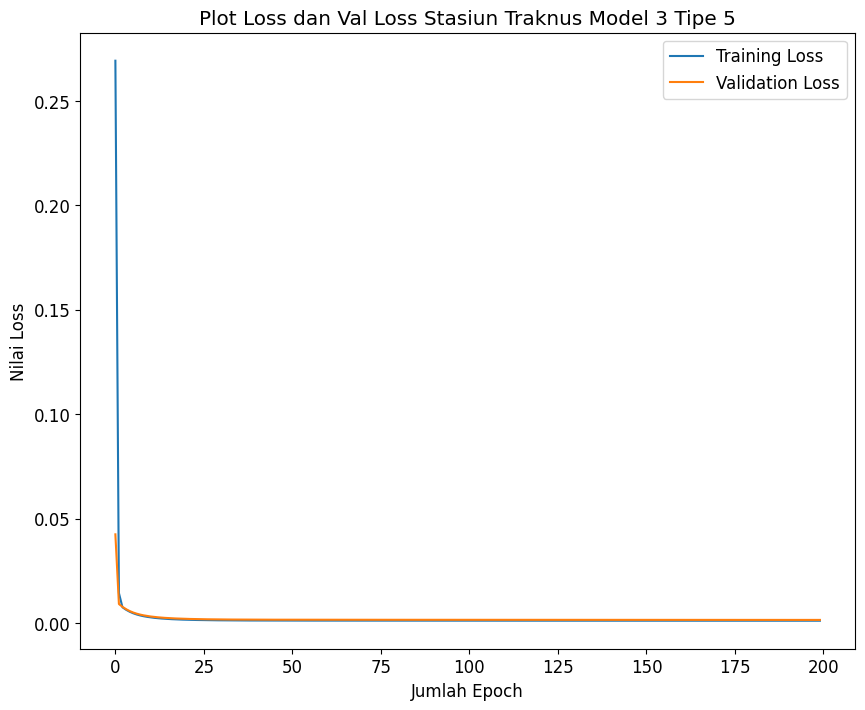

In [ ]:
# @title Plot Loss dan Val Loss
# plot history loss dan validation loss
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel("Jumlah Epoch")
plt.ylabel("Nilai Loss")
plt.title("Plot Loss dan Val Loss Stasiun Traknus Model 3 Tipe 5")
plt.legend()

In [ ]:
# @title Prediksi LSTM
# prediksi data training
trainY_pred= model.predict(trainX_normalized)
trainY_pred = np.maximum(trainY_pred, 0)

#prediksi data testing
testY_pred= model.predict(testX_normalized)
testY_pred= np.maximum(testY_pred, 0)

50/50 [==============================] - 0s 2ms/step


In [ ]:
# @title Denormalisasi Data
# denormalisasi nilai hasil prediksi dari data training
trainY_pred_denormalized = scaler_Y.inverse_transform(trainY_pred)

# denormalisasi nilai hasil prediksi dari data testing
testY_pred_denormalized = scaler_Y.inverse_transform(testY_pred)

# denormalisasi nilai aktual dari data training
trainY_denormalized = scaler_Y.inverse_transform(trainY_normalized)

# denormalisasi nilai aktual dari data testing
testY_denormalized = scaler_Y.inverse_transform(testY_normalized)


# Print the shape of denormalized predictions
print('Denormalized trainY_pred_denormalized shape: {}'.format(trainY_pred_denormalized.shape))
print('Denormalized testY_pred_denormalized shape: {}'.format(testY_pred_denormalized.shape))

# Print the shape of denormalized actual
print('Denormalized trainY_denormalized shape: {}'.format(trainY_denormalized.shape))
print('Denormalized testY_denormalized shape: {}'.format(testY_denormalized.shape))

Denormalized trainY_pred_denormalized shape: (6392, 1)
Denormalized testY_pred_denormalized shape: (1598, 1)
Denormalized trainY_denormalized shape: (6392, 1)
Denormalized testY_denormalized shape: (1598, 1)


In [ ]:
# @title RMSE
# calculate root mean squared error
# hasil RMSE di jadikan bilangan desimal
from sklearn.metrics import mean_squared_error
#Cari RMSE Train
rmse = np.sqrt(np.mean(np.square(trainY_denormalized - trainY_pred_denormalized)))
print(f'Root Mean Squared Error on Train Set: {rmse}')
#Cari RMSE Test
rmse = np.sqrt(np.mean(np.square(testY_denormalized - testY_pred_denormalized )))
print(f'Root Mean Squared Error on Test Set: {rmse}')

Root Mean Squared Error on Train Set: 2.322695150392165
Root Mean Squared Error on Test Set: 1.6762076366617662


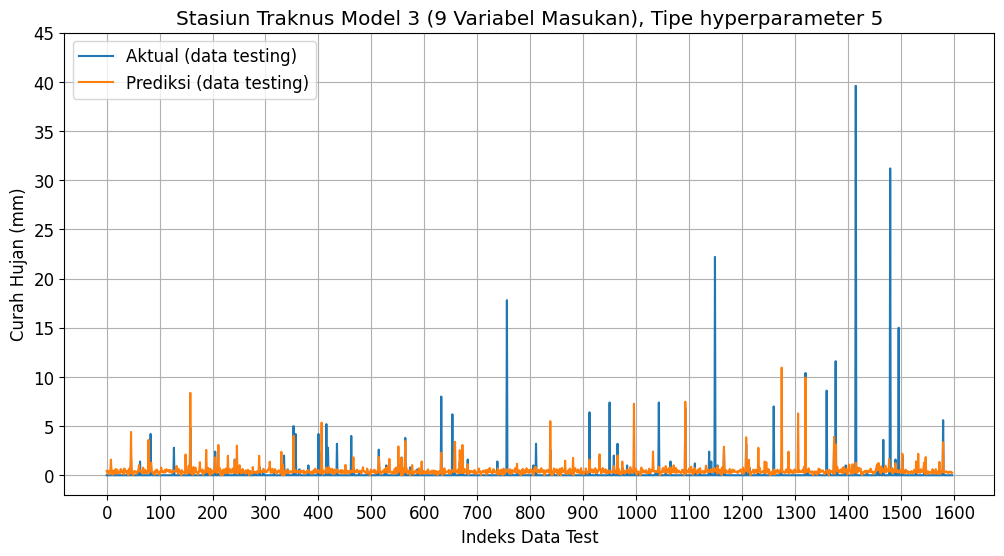

In [ ]:
# @title Plot Hasil Prediksi Data Testing

# Membuat dataframe untuk nilai aktual dan prediksi dari data pengujian
df_result_test = pd.DataFrame({'Aktual': testY_denormalized.flatten(), 'Prediksi': testY_pred_denormalized.flatten()})
#df_result_test['Aktual'] = df_result_test['Aktual'].shift(1)

# Plot data pengujian
plt.figure(figsize=(12, 6))
plt.plot(df_result_test.index, df_result_test['Aktual'], label='Aktual (data testing)')
plt.plot(df_result_test.index, df_result_test['Prediksi'], label='Prediksi (data testing)')
plt.title('Stasiun Traknus Model 3 (9 Variabel Masukan), Tipe hyperparameter 5')
plt.xlabel('Indeks Data Test')
plt.ylabel('Curah Hujan (mm)')
#plt.xlim([0,1600])
plt.yticks(np.arange(0, 50, 5))
plt.xticks(np.arange(0, 1700, 100))
plt.grid()
plt.legend()
plt.show()

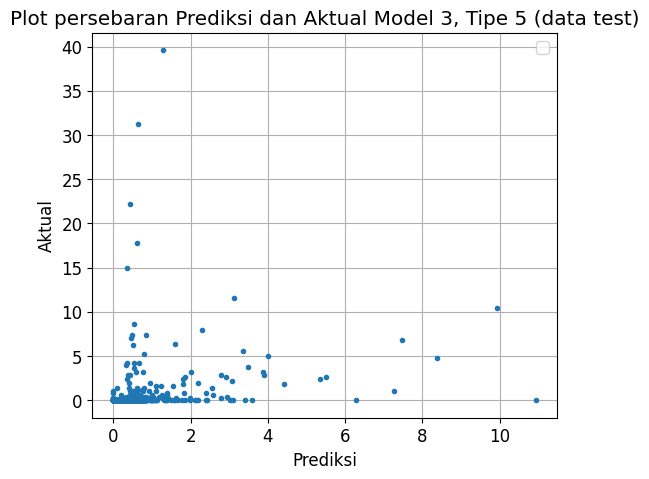

In [ ]:
# @title persebaran prediksi dan aktual data test
plt.figure(figsize=(6, 5))
plt.plot(df_result_test['Prediksi'], df_result_test['Aktual'], '.')
plt.title('Plot persebaran Prediksi dan Aktual Model 3, Tipe 5 (data test)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# @title Download Data Prediksi
# Membuat DataFrame dengan nilai prediksi dan aktual

df_result_test.to_excel("Traknus_model3_Tipe5.xlsx", index=True)

# Menampilkan DataFrame
from IPython.display import display
# Menampilkan DataFrame
display(df_result_test)

Aktual  Prediksi
0        0.0  0.464096
1        0.0  0.252100
2        0.0  0.284011
3        0.0  0.376460
4        0.0  0.429832
...      ...       ...
1593     0.0  0.388532
1594     0.0  0.360868
1595     0.0  0.296143
1596     0.0  0.185337
1597     0.0  0.267614

[1598 rows x 2 columns]

In [ ]:
# @title Atur threshold
# DATA TESTING
# Menentukan ambang batas untuk menentukan apakah hujan atau tidak
threshold = 0.5 # ambang batas penentu hujan atau tidak hujan

# Menambahkan kolom 'Hujan' berdasarkan threshold
df_result_test['Hujan_Aktual'] = np.where(df_result_test['Aktual'] >= threshold, 'Hujan', 'Tidak Hujan')
df_result_test['Hujan_Prediksi'] = np.where(df_result_test['Prediksi'] >= threshold, 'Hujan', 'Tidak Hujan')

from IPython.display import display
# Menampilkan DataFrame
display(df_result_test)

Aktual  Prediksi Hujan_Aktual Hujan_Prediksi
0        0.0  0.464096  Tidak Hujan    Tidak Hujan
1        0.0  0.252100  Tidak Hujan    Tidak Hujan
2        0.0  0.284011  Tidak Hujan    Tidak Hujan
3        0.0  0.376460  Tidak Hujan    Tidak Hujan
4        0.0  0.429832  Tidak Hujan    Tidak Hujan
...      ...       ...          ...            ...
1593     0.0  0.388532  Tidak Hujan    Tidak Hujan
1594     0.0  0.360868  Tidak Hujan    Tidak Hujan
1595     0.0  0.296143  Tidak Hujan    Tidak Hujan
1596     0.0  0.185337  Tidak Hujan    Tidak Hujan
1597     0.0  0.267614  Tidak Hujan    Tidak Hujan

[1598 rows x 4 columns]

In [ ]:
# @title Nilai Persentase CH data Testing

# Mencari Nilai Persentase Curah Hujan dan Tidak Hujan DATA TESTING

# Menghitung jumlah data pada setiap kategori
jumlah_hujan_prediksi_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Hujan') & (df_result_test['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_test['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_tidak_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_test['Prediksi'] < threshold)].shape[0]
jumlah_hujan_prediksi_tidak_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Hujan') & (df_result_test['Prediksi'] < threshold)].shape[0]

# Menghitung total data
total_data = df_result_test.shape[0]

# Menghitung persentase
persentase_hujan_prediksi_hujan = (jumlah_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_hujan = (jumlah_tidak_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_tidak_hujan = (jumlah_tidak_hujan_prediksi_tidak_hujan / total_data) * 100
persentase_hujan_prediksi_tidak_hujan = (jumlah_hujan_prediksi_tidak_hujan / total_data) * 100

# Menampilkan hasil
print(f'Persentase Hujan Aktual dan Prediksi Hujan: {persentase_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Hujan: {persentase_tidak_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: {persentase_tidak_hujan_prediksi_tidak_hujan:.2f}%')
print(f'Persentase Hujan Aktual dan Prediksi Tidak Hujan: {persentase_hujan_prediksi_tidak_hujan:.2f}%')


Persentase Hujan Aktual dan Prediksi Hujan: 3.82%
Persentase Tidak Hujan Aktual dan Prediksi Hujan: 19.46%
Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: 75.66%
Persentase Hujan Aktual dan Prediksi Tidak Hujan: 1.06%


In [ ]:
# @title Confusion matrix TESTING
# Buat Confusion Matrix Untuk Hasil Prediksi DATA TESTING
from sklearn.metrics import confusion_matrix

# Mengubah prediksi menjadi biner berdasarkan ambang batas (threshold)
df_result_test['Prediksi_Biner'] = df_result_test['Prediksi'].apply(lambda x: 'Hujan' if x >= threshold else 'Tidak Hujan')

# Menghitung matriks kebingungan
c_matrix = confusion_matrix(df_result_test['Hujan_Aktual'], df_result_test['Hujan_Prediksi'])

# Menampilkan matriks kebingungan
print(c_matrix)

[[  61   17]
 [ 311 1209]]


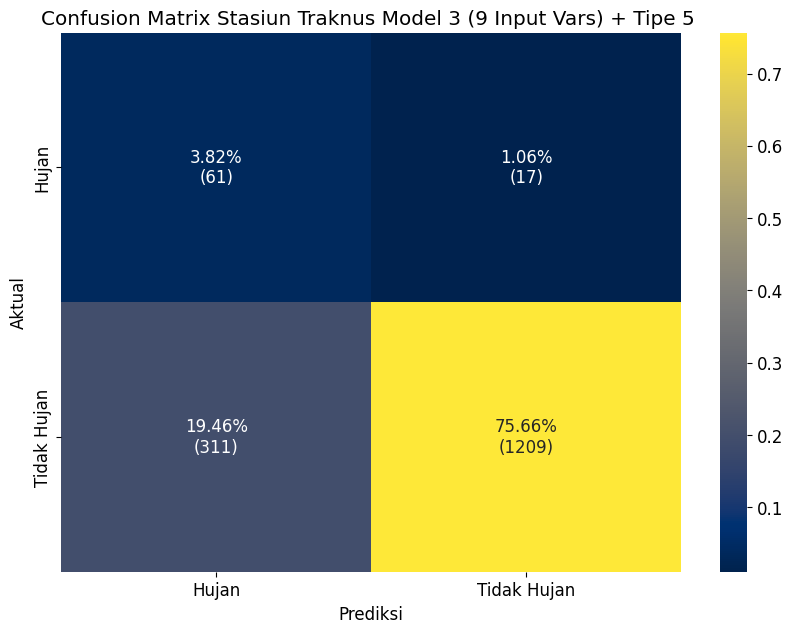

In [ ]:
# @title Plot Confusion Matrix Data Test
# Membuat DataFrame dari matriks kebingungan
df_cm = pd.DataFrame(c_matrix, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Menghitung persentase untuk setiap kelas dalam matriks kebingungan
c_matrix_percentage = c_matrix / np.sum(c_matrix)

# Membuat DataFrame dari matriks kebingungan persentase
df_cm_percentage = pd.DataFrame(c_matrix_percentage, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Membuat anotasi baru dengan jumlah dan persentase
annotations = df_cm_percentage.applymap(lambda x: '{:.2%}'.format(x)) + '\n(' + df_cm.astype(str) + ')'

# Membuat heatmap dari DataFrame
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_percentage, annot=annotations, fmt='', cmap='cividis')
plt.title('Confusion Matrix Stasiun Traknus Model 3 (9 Input Vars) + Tipe 5 ')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

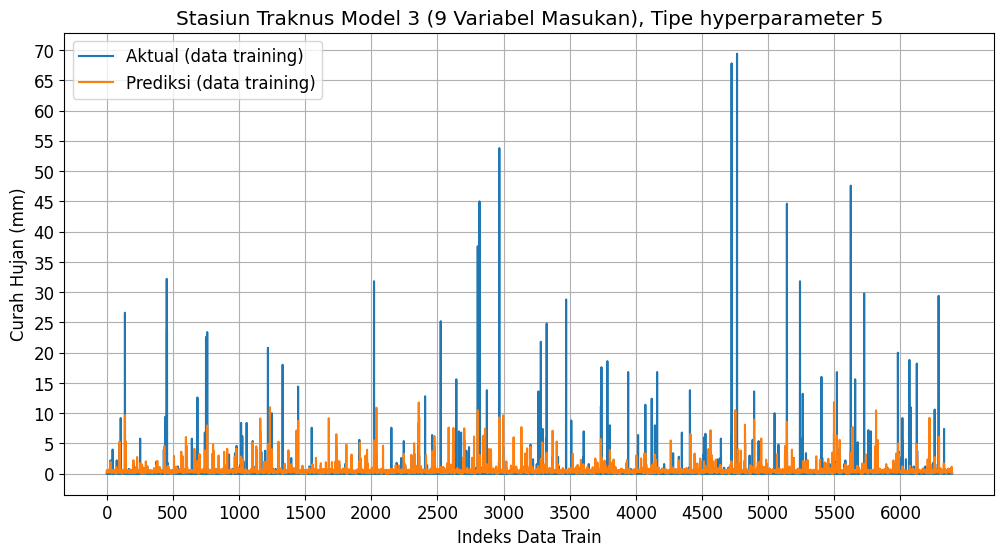

In [ ]:
# @title Plot Hasil Prediksi Data Training

# Membuat dataframe untuk nilai aktual dan prediksi dari data pengujian
df_result_train = pd.DataFrame({'Aktual': trainY_denormalized.flatten(), 'Prediksi': trainY_pred_denormalized.flatten()})
#df_result_train['Aktual'] = df_result_train['Aktual'].shift(1)

# Plot data pengujian
plt.figure(figsize=(12, 6))
plt.plot(df_result_train.index, df_result_train['Aktual'], label='Aktual (data training)')
plt.plot(df_result_train.index, df_result_train['Prediksi'], label='Prediksi (data training)')
plt.title('Stasiun Traknus Model 3 (9 Variabel Masukan), Tipe hyperparameter 5')
plt.xlabel('Indeks Data Train')
plt.ylabel('Curah Hujan (mm)')
#plt.xlim([0,7500])
plt.yticks(np.arange(0, 75, 5))
plt.xticks(np.arange(0, 6500, 500))
plt.grid()
plt.legend()
plt.show()

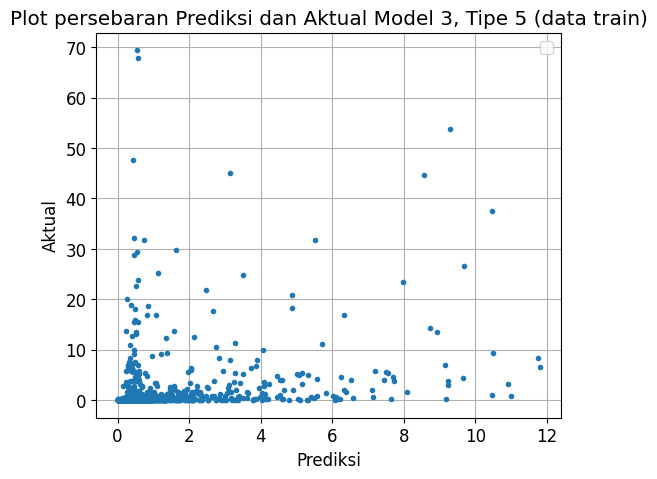

In [ ]:
# @title persebaran prediksi dan aktual data train
plt.figure(figsize=(6, 5))
plt.plot(df_result_train['Prediksi'], df_result_train['Aktual'], '.')
plt.title('Plot persebaran Prediksi dan Aktual Model 3, Tipe 5 (data train)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
# plt.xlim([0,6500])
plt.grid()
plt.legend()
plt.show()

In [ ]:
# @title buat dataframe training
# Membuat DataFrame dengan nilai prediksi dan aktual
df_result_train = pd.DataFrame({'Aktual': trainY_denormalized.flatten(), 'Prediksi': trainY_pred_denormalized.flatten()})
# df_result_train['Aktual'] = df_result_train['Aktual'].shift(1)
# Menampilkan DataFrame
from IPython.display import display
# Menampilkan DataFrame
display(df_result_train)

Aktual  Prediksi
0        0.0  0.264569
1        0.0  0.571356
2        0.0  0.475579
3        0.0  0.316313
4        0.0  0.181726
...      ...       ...
6387     0.0  1.148237
6388     0.0  0.375177
6389     0.0  0.374372
6390     0.0  0.147865
6391     0.0  0.120973

[6392 rows x 2 columns]

In [ ]:
# @title thrashold data training
# DATA TRAINING
# Menentukan ambang batas untuk menentukan apakah hujan atau tidak
threshold = 0.5  # Anda dapat menyesuaikan nilai threshold sesuai kebutuhan

# Menambahkan kolom 'Hujan' berdasarkan threshold
df_result_train['Hujan_Aktual'] = np.where(df_result_train['Aktual'] >= threshold, 'Hujan', 'Tidak Hujan')
df_result_train['Hujan_Prediksi'] = np.where(df_result_train['Prediksi'] >= threshold, 'Hujan', 'Tidak Hujan')

from IPython.display import display
# Menampilkan DataFrame
display(df_result_train)

Aktual  Prediksi Hujan_Aktual Hujan_Prediksi
0        0.0  0.264569  Tidak Hujan    Tidak Hujan
1        0.0  0.571356  Tidak Hujan          Hujan
2        0.0  0.475579  Tidak Hujan    Tidak Hujan
3        0.0  0.316313  Tidak Hujan    Tidak Hujan
4        0.0  0.181726  Tidak Hujan    Tidak Hujan
...      ...       ...          ...            ...
6387     0.0  1.148237  Tidak Hujan          Hujan
6388     0.0  0.375177  Tidak Hujan    Tidak Hujan
6389     0.0  0.374372  Tidak Hujan    Tidak Hujan
6390     0.0  0.147865  Tidak Hujan    Tidak Hujan
6391     0.0  0.120973  Tidak Hujan    Tidak Hujan

[6392 rows x 4 columns]

In [ ]:
# @title nilai persen CH training
# Menghitung jumlah data pada setiap kategori
jumlah_hujan_prediksi_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Hujan') & (df_result_train['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_train['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_tidak_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_train['Prediksi'] < threshold)].shape[0]
jumlah_hujan_prediksi_tidak_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Hujan') & (df_result_train['Prediksi'] < threshold)].shape[0]

# Menghitung total data
total_data = df_result_train.shape[0]

# Menghitung persentase
persentase_hujan_prediksi_hujan = (jumlah_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_hujan = (jumlah_tidak_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_tidak_hujan = (jumlah_tidak_hujan_prediksi_tidak_hujan / total_data) * 100
persentase_hujan_prediksi_tidak_hujan = (jumlah_hujan_prediksi_tidak_hujan / total_data) * 100

# Menampilkan hasil
print(f'Persentase Hujan Aktual dan Prediksi Hujan: {persentase_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Hujan: {persentase_tidak_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: {persentase_tidak_hujan_prediksi_tidak_hujan:.2f}%')
print(f'Persentase Hujan Aktual dan Prediksi Tidak Hujan: {persentase_hujan_prediksi_tidak_hujan:.2f}%')


Persentase Hujan Aktual dan Prediksi Hujan: 3.54%
Persentase Tidak Hujan Aktual dan Prediksi Hujan: 20.07%
Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: 75.27%
Persentase Hujan Aktual dan Prediksi Tidak Hujan: 1.13%


In [ ]:
# @title Confusion Matrix TRAINING
# Buat Confusion Matrix Untuk Hasil Prediksi DATA Train
from sklearn.metrics import confusion_matrix

# Mengubah prediksi menjadi biner berdasarkan ambang batas (threshold)
df_result_train['Prediksi_Biner'] = df_result_train['Prediksi'].apply(lambda x: 'Hujan' if x >= threshold else 'Tidak Hujan')

# Menghitung matriks kebingungan
c_matrix = confusion_matrix(df_result_train['Hujan_Aktual'], df_result_train['Hujan_Prediksi'])

# Menampilkan matriks kebingungan
print(c_matrix)

[[ 226   72]
 [1283 4811]]


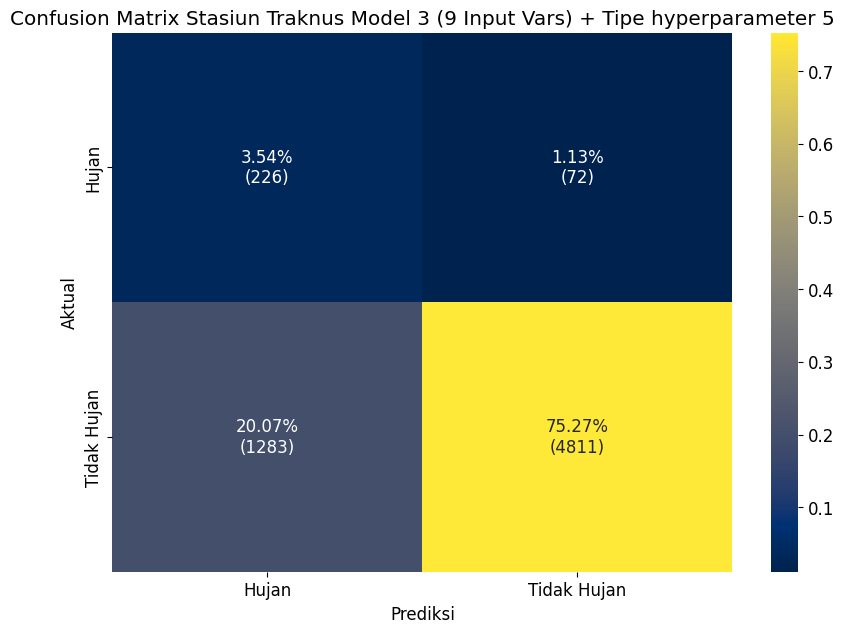

In [ ]:
# @title PLot Confusion Matrix Data Training
# Membuat DataFrame dari matriks kebingungan
df_cm = pd.DataFrame(c_matrix, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Menghitung persentase untuk setiap kelas dalam matriks kebingungan
c_matrix_percentage = c_matrix / np.sum(c_matrix)

# Membuat DataFrame dari matriks kebingungan persentase
df_cm_percentage = pd.DataFrame(c_matrix_percentage, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Membuat anotasi baru dengan jumlah dan persentase
annotations = df_cm_percentage.applymap(lambda x: '{:.2%}'.format(x)) + '\n(' + df_cm.astype(str) + ')'

# Membuat heatmap dari DataFrame
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_percentage, annot=annotations, fmt='', cmap='cividis')
plt.title('Confusion Matrix Stasiun Traknus Model 3 (9 Input Vars) + Tipe hyperparameter 5')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Model 3 Tipe 6

In [ ]:
# @title Baca Dataset
data=pd.read_csv('/content/Deep/Traknus_Station.csv')
data

datetime  Unnamed: 0  rainfall  airtemp  airhum  windspeed  \
0        9/5/2022 12:00           0       0.0     34.5   64.60      11.99   
1        9/5/2022 13:00           1       0.0     34.1   66.54      10.34   
2        9/5/2022 14:00           2       0.0     34.2   63.22       8.95   
3        9/5/2022 15:00           3       0.0     33.4   67.26       8.20   
4        9/5/2022 16:00           4       0.0     31.1   71.64      11.25   
...                 ...         ...       ...      ...     ...        ...   
10748   11/27/2023 8:00       10748       0.0     25.4   94.92       4.70   
10749   11/27/2023 9:00       10749       0.0     27.5   94.90       4.90   
10750  11/27/2023 10:00       10750       0.0     28.1   94.56       5.37   
10751  11/27/2023 11:00       10751       0.0     28.8   91.20       4.23   
10752  11/27/2023 12:00       10752       0.0     29.8   86.60       3.41   

         windir  airpress  uvrad       DoY       Jam  
0      0.391857   1007.34    0.0  0.904117  0.843854  
1      0.988705   1006.58    0.0  0.904117  0.907447  
2     -0.432178   1005.30    0.0  0.904117  0.136737  
3      0.985897   1004.70    0.0  0.904117 -0.759688  
4      1.000000   1004.84    0.0  0.904117 -0.957659  
...         ...       ...    ...       ...       ...  
10748  0.819306   1008.32   14.2  0.966420 -0.145500  
10749  0.895984   1008.60   19.8  0.966420 -0.911130  
10750 -0.171688   1008.50   20.1  0.966420 -0.839072  
10751 -0.892018   1007.94   26.6  0.966420  0.004426  
10752 -0.730194   1007.20   25.2  0.966420  0.843854  

[10753 rows x 11 columns]

In [ ]:
# @title Sequensial dan interpolasi Linear
X = []
y = []
length = 3
fut = 1
for i in range(length+fut, len(data)-fut):
    potong = data[i-length-fut:i]
    missing_count = potong.isnull().sum()
    if missing_count.any() > 2:
        # Jika lebih dari 2 jam data yang kosong, lanjut ke iterasi berikutnya
        continue
    elif missing_count.any() == 2:
        # Jika ada dua jam data yang kosong berurutan, interpolasi
        idx_missing = potong[potong.isnull()].index
        if len(idx_missing) == 2 and idx_missing[1] - idx_missing[0] == 1:
            potong.iloc[idx_missing[0]:idx_missing[1]+1] = potong.iloc[idx_missing[0]:idx_missing[1]+1].interpolate(method='linear', inplace=True)

    if potong.isnull().values.any():
        # print("ada nan: ", potong)
        continue
    else:
        X.append(potong[:length])
        y.append(potong[length:]["rainfall"])

In [ ]:
# @title Shuffle dan bagi data latih dan data uji
#buat rentang data latih
training_number = int(0.8*len(X))
#shuffle dataset
perm = np.random.permutation(len(X))
#pilih colom target
cols = ["rainfall", "airtemp", "airhum", "windspeed", "windir", "airpress", "uvrad", "DoY", "Jam"]
#buat list dataset menjadi array
X_array = np.array([xx[cols].values for xx in X])
y_array = np.array([yy.values for yy in y])
#pisahkan data latih 80%
trainX = X_array[perm[:training_number]]
trainY = y_array[perm[:training_number]]
#pisahkan datauji 20%
testX = X_array[perm[training_number:]]
testY = y_array[perm[training_number:]]

In [ ]:
# @title Normalisasi Data

from sklearn.preprocessing import MinMaxScaler

# Normalizing trainX and testX
scaler_X = MinMaxScaler()
trainX_normalized = scaler_X.fit_transform(trainX.reshape(-1, trainX.shape[-1])).reshape(trainX.shape)
testX_normalized = scaler_X.transform(testX.reshape(-1, testX.shape[-1])).reshape(testX.shape)

# Normalizing trainY and testY
scaler_Y = MinMaxScaler()
trainY_normalized = scaler_Y.fit_transform(trainY.reshape(-1, 1)).reshape(trainY.shape)
testY_normalized = scaler_Y.transform(testY.reshape(-1, 1)).reshape(testY.shape)

# Print the shapes of normalized data
print('Normalized trainX shape: {}'.format(trainX_normalized.shape))
print('Normalized trainY shape: {}'.format(trainY_normalized.shape))
print('Normalized testX shape: {}'.format(testX_normalized.shape))
print('Normalized testY shape: {}'.format(testY_normalized.shape))

Normalized trainX shape: (7148, 3, 9)
Normalized trainY shape: (7148, 1)
Normalized testX shape: (1788, 3, 9)
Normalized testY shape: (1788, 1)


In [ ]:
# @title Model Vanilla LSTM

# buat model vanilla LSTM
model=Sequential()
model.add(LSTM(units=1, input_shape=(trainX_normalized.shape[1],trainX_normalized.shape[2])))
model.add(Dense(trainY_normalized.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 1)                 44        
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 46 (184.00 Byte)
Trainable params: 46 (184.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# @title Epoch dan Batch Size

# fit model untuk pelatihan data
history=model.fit(trainX_normalized, trainY_normalized,
                  epochs=200, batch_size=50,
                  validation_split=0.2, verbose=1, shuffle=False)

Epoch 1/200
115/115 [==============================] - 3s 8ms/step - loss: 0.0265 - val_loss: 0.0071
Epoch 2/200
115/115 [==============================] - 0s 4ms/step - loss: 0.0056 - val_loss: 0.0037
Epoch 3/200
115/115 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 4/200
115/115 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 5/200
115/115 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 6/200
115/115 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 7/200
115/115 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 8/200
115/115 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 9/200
115/115 [==============================] - 1s 5ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 10/200
115/115 [==============================] - 1s 5ms/step - loss: 0.0013 - val_lo

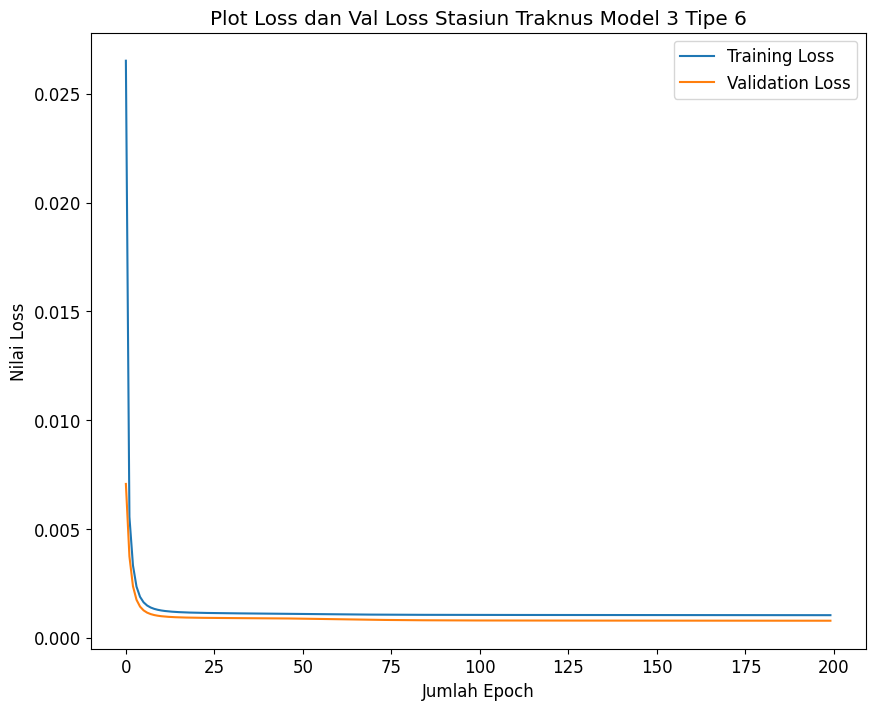

In [ ]:
# @title Plot Loss dan Val Loss
# plot history loss dan validation loss
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel("Jumlah Epoch")
plt.ylabel("Nilai Loss")
plt.title("Plot Loss dan Val Loss Stasiun Traknus Model 3 Tipe 6")
plt.legend()

In [ ]:
# @title Prediksi LSTM
# prediksi data training
trainY_pred= model.predict(trainX_normalized)
trainY_pred = np.maximum(trainY_pred, 0)

#prediksi data testing
testY_pred= model.predict(testX_normalized)
testY_pred= np.maximum(testY_pred, 0)

56/56 [==============================] - 0s 2ms/step


In [ ]:
# @title Denormalisasi Data
# denormalisasi nilai hasil prediksi dari data training
trainY_pred_denormalized = scaler_Y.inverse_transform(trainY_pred)

# denormalisasi nilai hasil prediksi dari data testing
testY_pred_denormalized = scaler_Y.inverse_transform(testY_pred)

# denormalisasi nilai aktual dari data training
trainY_denormalized = scaler_Y.inverse_transform(trainY_normalized)

# denormalisasi nilai aktual dari data testing
testY_denormalized = scaler_Y.inverse_transform(testY_normalized)


# Print the shape of denormalized predictions
print('Denormalized trainY_pred_denormalized shape: {}'.format(trainY_pred_denormalized.shape))
print('Denormalized testY_pred_denormalized shape: {}'.format(testY_pred_denormalized.shape))

# Print the shape of denormalized actual
print('Denormalized trainY_denormalized shape: {}'.format(trainY_denormalized.shape))
print('Denormalized testY_denormalized shape: {}'.format(testY_denormalized.shape))

Denormalized trainY_pred_denormalized shape: (7148, 1)
Denormalized testY_pred_denormalized shape: (1788, 1)
Denormalized trainY_denormalized shape: (7148, 1)
Denormalized testY_denormalized shape: (1788, 1)


In [ ]:
# @title RMSE
# calculate root mean squared error
# hasil RMSE di jadikan bilangan desimal
from sklearn.metrics import mean_squared_error
#Cari RMSE Train
rmse = np.sqrt(np.mean(np.square(trainY_denormalized - trainY_pred_denormalized)))
print(f'Root Mean Squared Error on Train Set: {rmse}')
#Cari RMSE Test
rmse = np.sqrt(np.mean(np.square(testY_denormalized - testY_pred_denormalized )))
print(f'Root Mean Squared Error on Test Set: {rmse}')

Root Mean Squared Error on Train Set: 2.130283143878437
Root Mean Squared Error on Test Set: 2.2024750688012986


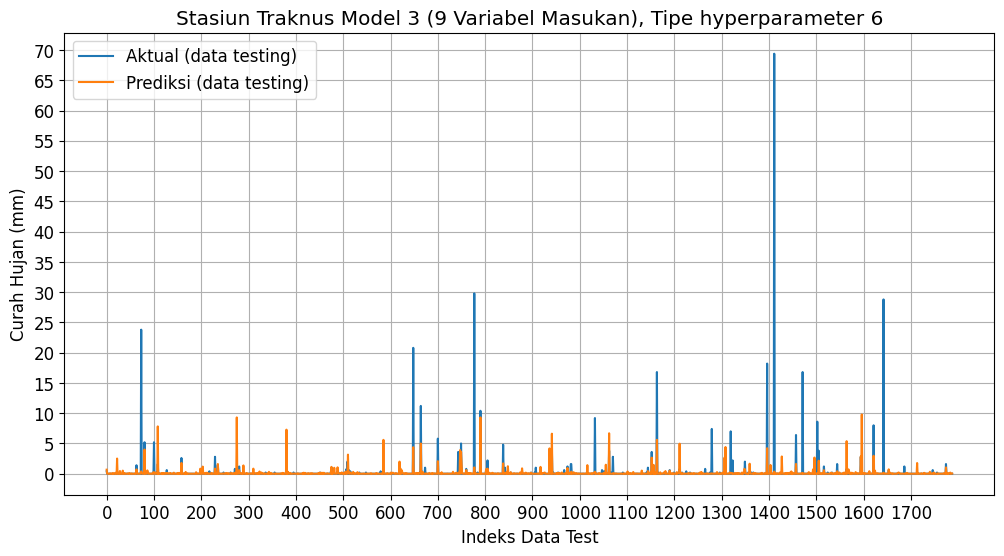

In [ ]:
# @title Plot Hasil Prediksi Data Testing

# Membuat dataframe untuk nilai aktual dan prediksi dari data pengujian
df_result_test = pd.DataFrame({'Aktual': testY_denormalized.flatten(), 'Prediksi': testY_pred_denormalized.flatten()})
#df_result_test['Aktual'] = df_result_test['Aktual'].shift(1)

# Plot data pengujian
plt.figure(figsize=(12, 6))
plt.plot(df_result_test.index, df_result_test['Aktual'], label='Aktual (data testing)')
plt.plot(df_result_test.index, df_result_test['Prediksi'], label='Prediksi (data testing)')
plt.title('Stasiun Traknus Model 3 (9 Variabel Masukan), Tipe hyperparameter 6')
plt.xlabel('Indeks Data Test')
plt.ylabel('Curah Hujan (mm)')
#plt.xlim([0,1600])
plt.yticks(np.arange(0, 75, 5))
plt.xticks(np.arange(0, 1800, 100))
plt.grid()
plt.legend()
plt.show()

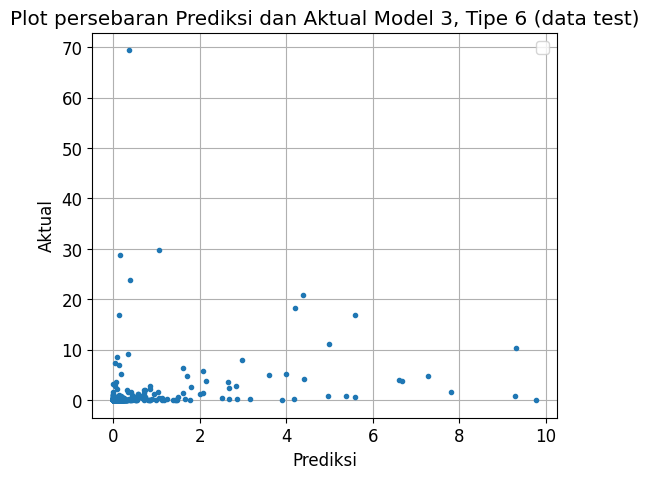

In [ ]:
# @title persebaran prediksi dan aktual data test
plt.figure(figsize=(6, 5))
plt.plot(df_result_test['Prediksi'], df_result_test['Aktual'], '.')
plt.title('Plot persebaran Prediksi dan Aktual Model 3, Tipe 6 (data test)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# @title Download Data Prediksi
# Membuat DataFrame dengan nilai prediksi dan aktual

df_result_test.to_excel("Traknus_model3_Tipe6.xlsx", index=True)

# Menampilkan DataFrame
from IPython.display import display
# Menampilkan DataFrame
display(df_result_test)

Aktual  Prediksi
0        0.4  0.671352
1        0.0  0.000000
2        0.0  0.000000
3        0.0  0.000000
4        0.0  0.000000
...      ...       ...
1783     0.0  0.187398
1784     0.0  0.004929
1785     0.0  0.000000
1786     0.0  0.000000
1787     0.0  0.029561

[1788 rows x 2 columns]

In [ ]:
# @title Atur threshold
# DATA TESTING
# Menentukan ambang batas untuk menentukan apakah hujan atau tidak
threshold = 0.5 # ambang batas penentu hujan atau tidak hujan

# Menambahkan kolom 'Hujan' berdasarkan threshold
df_result_test['Hujan_Aktual'] = np.where(df_result_test['Aktual'] >= threshold, 'Hujan', 'Tidak Hujan')
df_result_test['Hujan_Prediksi'] = np.where(df_result_test['Prediksi'] >= threshold, 'Hujan', 'Tidak Hujan')

from IPython.display import display
# Menampilkan DataFrame
display(df_result_test)

Aktual  Prediksi Hujan_Aktual Hujan_Prediksi
0        0.4  0.671352  Tidak Hujan          Hujan
1        0.0  0.000000  Tidak Hujan    Tidak Hujan
2        0.0  0.000000  Tidak Hujan    Tidak Hujan
3        0.0  0.000000  Tidak Hujan    Tidak Hujan
4        0.0  0.000000  Tidak Hujan    Tidak Hujan
...      ...       ...          ...            ...
1783     0.0  0.187398  Tidak Hujan    Tidak Hujan
1784     0.0  0.004929  Tidak Hujan    Tidak Hujan
1785     0.0  0.000000  Tidak Hujan    Tidak Hujan
1786     0.0  0.000000  Tidak Hujan    Tidak Hujan
1787     0.0  0.029561  Tidak Hujan    Tidak Hujan

[1788 rows x 4 columns]

In [ ]:
# @title Nilai Persentase CH data Testing

# Mencari Nilai Persentase Curah Hujan dan Tidak Hujan DATA TESTING

# Menghitung jumlah data pada setiap kategori
jumlah_hujan_prediksi_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Hujan') & (df_result_test['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_test['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_tidak_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_test['Prediksi'] < threshold)].shape[0]
jumlah_hujan_prediksi_tidak_hujan = df_result_test[(df_result_test['Hujan_Aktual'] == 'Hujan') & (df_result_test['Prediksi'] < threshold)].shape[0]

# Menghitung total data
total_data = df_result_test.shape[0]

# Menghitung persentase
persentase_hujan_prediksi_hujan = (jumlah_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_hujan = (jumlah_tidak_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_tidak_hujan = (jumlah_tidak_hujan_prediksi_tidak_hujan / total_data) * 100
persentase_hujan_prediksi_tidak_hujan = (jumlah_hujan_prediksi_tidak_hujan / total_data) * 100

# Menampilkan hasil
print(f'Persentase Hujan Aktual dan Prediksi Hujan: {persentase_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Hujan: {persentase_tidak_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: {persentase_tidak_hujan_prediksi_tidak_hujan:.2f}%')
print(f'Persentase Hujan Aktual dan Prediksi Tidak Hujan: {persentase_hujan_prediksi_tidak_hujan:.2f}%')


Persentase Hujan Aktual dan Prediksi Hujan: 2.35%
Persentase Tidak Hujan Aktual dan Prediksi Hujan: 1.79%
Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: 94.07%
Persentase Hujan Aktual dan Prediksi Tidak Hujan: 1.79%


In [ ]:
# @title Confusion matrix TESTING
# Buat Confusion Matrix Untuk Hasil Prediksi DATA TESTING
from sklearn.metrics import confusion_matrix

# Mengubah prediksi menjadi biner berdasarkan ambang batas (threshold)
df_result_test['Prediksi_Biner'] = df_result_test['Prediksi'].apply(lambda x: 'Hujan' if x >= threshold else 'Tidak Hujan')

# Menghitung matriks kebingungan
c_matrix = confusion_matrix(df_result_test['Hujan_Aktual'], df_result_test['Hujan_Prediksi'])

# Menampilkan matriks kebingungan
print(c_matrix)

[[  42   32]
 [  32 1682]]


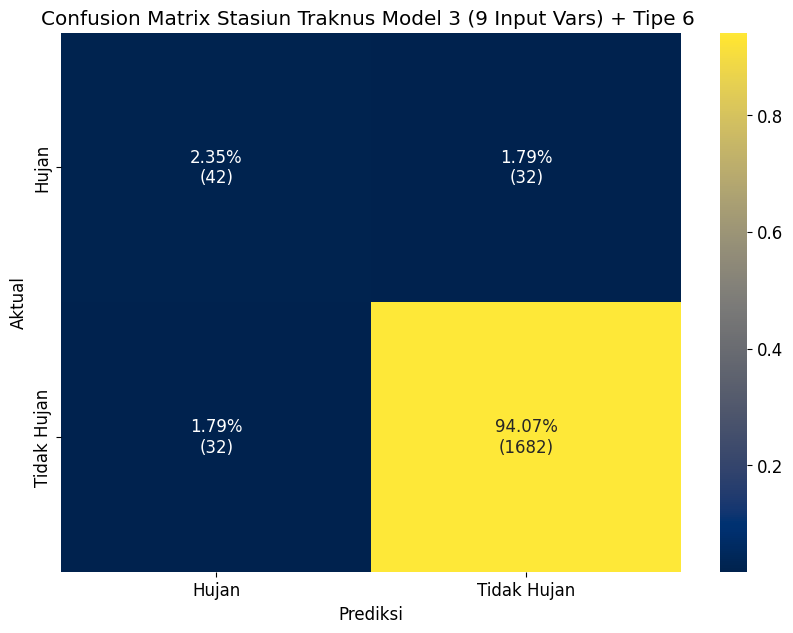

In [ ]:
# @title Plot Confusion Matrix Data Test
# Membuat DataFrame dari matriks kebingungan
df_cm = pd.DataFrame(c_matrix, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Menghitung persentase untuk setiap kelas dalam matriks kebingungan
c_matrix_percentage = c_matrix / np.sum(c_matrix)

# Membuat DataFrame dari matriks kebingungan persentase
df_cm_percentage = pd.DataFrame(c_matrix_percentage, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Membuat anotasi baru dengan jumlah dan persentase
annotations = df_cm_percentage.applymap(lambda x: '{:.2%}'.format(x)) + '\n(' + df_cm.astype(str) + ')'

# Membuat heatmap dari DataFrame
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_percentage, annot=annotations, fmt='', cmap='cividis')
plt.title('Confusion Matrix Stasiun Traknus Model 3 (9 Input Vars) + Tipe 6 ')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

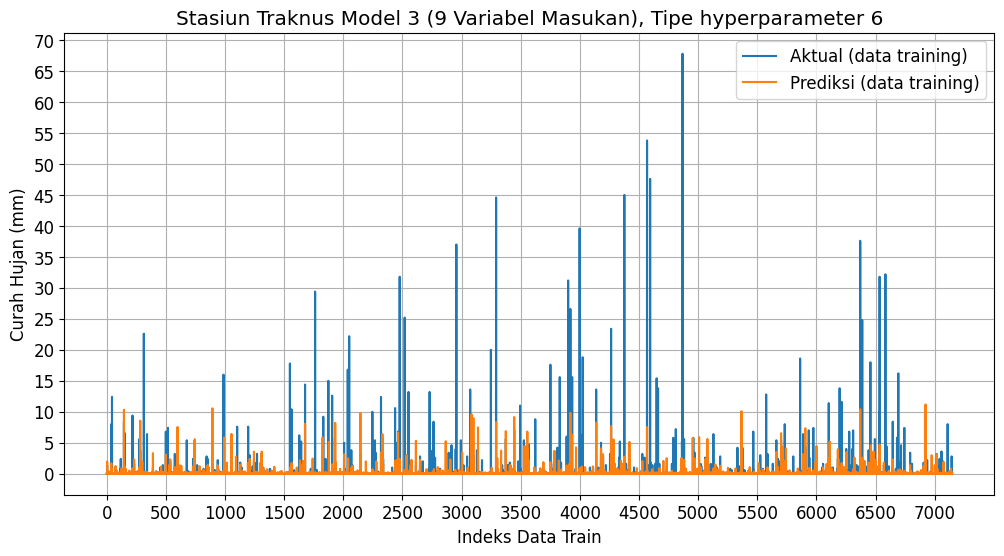

In [ ]:
# @title Plot Hasil Prediksi Data Training

# Membuat dataframe untuk nilai aktual dan prediksi dari data pengujian
df_result_train = pd.DataFrame({'Aktual': trainY_denormalized.flatten(), 'Prediksi': trainY_pred_denormalized.flatten()})
#df_result_train['Aktual'] = df_result_train['Aktual'].shift(1)

# Plot data pengujian
plt.figure(figsize=(12, 6))
plt.plot(df_result_train.index, df_result_train['Aktual'], label='Aktual (data training)')
plt.plot(df_result_train.index, df_result_train['Prediksi'], label='Prediksi (data training)')
plt.title('Stasiun Traknus Model 3 (9 Variabel Masukan), Tipe hyperparameter 6')
plt.xlabel('Indeks Data Train')
plt.ylabel('Curah Hujan (mm)')
#plt.xlim([0,7500])
plt.yticks(np.arange(0, 75, 5))
plt.xticks(np.arange(0, 7200, 500))
plt.grid()
plt.legend()
plt.show()

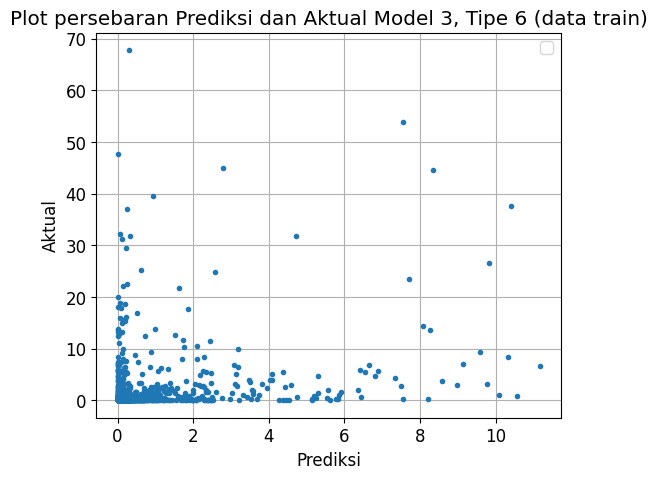

In [ ]:
# @title persebaran prediksi dan aktual data train
plt.figure(figsize=(6, 5))
plt.plot(df_result_train['Prediksi'], df_result_train['Aktual'], '.')
plt.title('Plot persebaran Prediksi dan Aktual Model 3, Tipe 6 (data train)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
# plt.xlim([0,6500])
plt.grid()
plt.legend()
plt.show()

In [ ]:
# @title buat dataframe training
# Membuat DataFrame dengan nilai prediksi dan aktual
df_result_train = pd.DataFrame({'Aktual': trainY_denormalized.flatten(), 'Prediksi': trainY_pred_denormalized.flatten()})
# df_result_train['Aktual'] = df_result_train['Aktual'].shift(1)
# Menampilkan DataFrame
from IPython.display import display
# Menampilkan DataFrame
display(df_result_train)

Aktual  Prediksi
0        0.0  0.063063
1        0.0  0.000000
2        0.0  0.000000
3        0.0  0.002479
4        1.4  1.983520
...      ...       ...
7143     2.8  0.337017
7144     0.0  0.000000
7145     0.0  0.000000
7146     0.0  0.080159
7147     0.0  0.069348

[7148 rows x 2 columns]

In [ ]:
# @title thrashold data training
# DATA TRAINING
# Menentukan ambang batas untuk menentukan apakah hujan atau tidak
threshold = 0.5  # Anda dapat menyesuaikan nilai threshold sesuai kebutuhan

# Menambahkan kolom 'Hujan' berdasarkan threshold
df_result_train['Hujan_Aktual'] = np.where(df_result_train['Aktual'] >= threshold, 'Hujan', 'Tidak Hujan')
df_result_train['Hujan_Prediksi'] = np.where(df_result_train['Prediksi'] >= threshold, 'Hujan', 'Tidak Hujan')

from IPython.display import display
# Menampilkan DataFrame
display(df_result_train)

Aktual  Prediksi Hujan_Aktual Hujan_Prediksi
0        0.0  0.063063  Tidak Hujan    Tidak Hujan
1        0.0  0.000000  Tidak Hujan    Tidak Hujan
2        0.0  0.000000  Tidak Hujan    Tidak Hujan
3        0.0  0.002479  Tidak Hujan    Tidak Hujan
4        1.4  1.983520        Hujan          Hujan
...      ...       ...          ...            ...
7143     2.8  0.337017        Hujan    Tidak Hujan
7144     0.0  0.000000  Tidak Hujan    Tidak Hujan
7145     0.0  0.000000  Tidak Hujan    Tidak Hujan
7146     0.0  0.080159  Tidak Hujan    Tidak Hujan
7147     0.0  0.069348  Tidak Hujan    Tidak Hujan

[7148 rows x 4 columns]

In [ ]:
# @title nilai persen CH training
# Menghitung jumlah data pada setiap kategori
jumlah_hujan_prediksi_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Hujan') & (df_result_train['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_train['Prediksi'] >= threshold)].shape[0]
jumlah_tidak_hujan_prediksi_tidak_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Tidak Hujan') & (df_result_train['Prediksi'] < threshold)].shape[0]
jumlah_hujan_prediksi_tidak_hujan = df_result_train[(df_result_train['Hujan_Aktual'] == 'Hujan') & (df_result_train['Prediksi'] < threshold)].shape[0]

# Menghitung total data
total_data = df_result_train.shape[0]

# Menghitung persentase
persentase_hujan_prediksi_hujan = (jumlah_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_hujan = (jumlah_tidak_hujan_prediksi_hujan / total_data) * 100
persentase_tidak_hujan_prediksi_tidak_hujan = (jumlah_tidak_hujan_prediksi_tidak_hujan / total_data) * 100
persentase_hujan_prediksi_tidak_hujan = (jumlah_hujan_prediksi_tidak_hujan / total_data) * 100

# Menampilkan hasil
print(f'Persentase Hujan Aktual dan Prediksi Hujan: {persentase_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Hujan: {persentase_tidak_hujan_prediksi_hujan:.2f}%')
print(f'Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: {persentase_tidak_hujan_prediksi_tidak_hujan:.2f}%')
print(f'Persentase Hujan Aktual dan Prediksi Tidak Hujan: {persentase_hujan_prediksi_tidak_hujan:.2f}%')


Persentase Hujan Aktual dan Prediksi Hujan: 2.25%
Persentase Tidak Hujan Aktual dan Prediksi Hujan: 1.59%
Persentase Tidak Hujan Aktual dan Prediksi Tidak Hujan: 93.62%
Persentase Hujan Aktual dan Prediksi Tidak Hujan: 2.53%


In [ ]:
# @title Confusion Matrix TRAINING
# Buat Confusion Matrix Untuk Hasil Prediksi DATA Train
from sklearn.metrics import confusion_matrix

# Mengubah prediksi menjadi biner berdasarkan ambang batas (threshold)
df_result_train['Prediksi_Biner'] = df_result_train['Prediksi'].apply(lambda x: 'Hujan' if x >= threshold else 'Tidak Hujan')

# Menghitung matriks kebingungan
c_matrix = confusion_matrix(df_result_train['Hujan_Aktual'], df_result_train['Hujan_Prediksi'])

# Menampilkan matriks kebingungan
print(c_matrix)

[[ 161  181]
 [ 114 6692]]


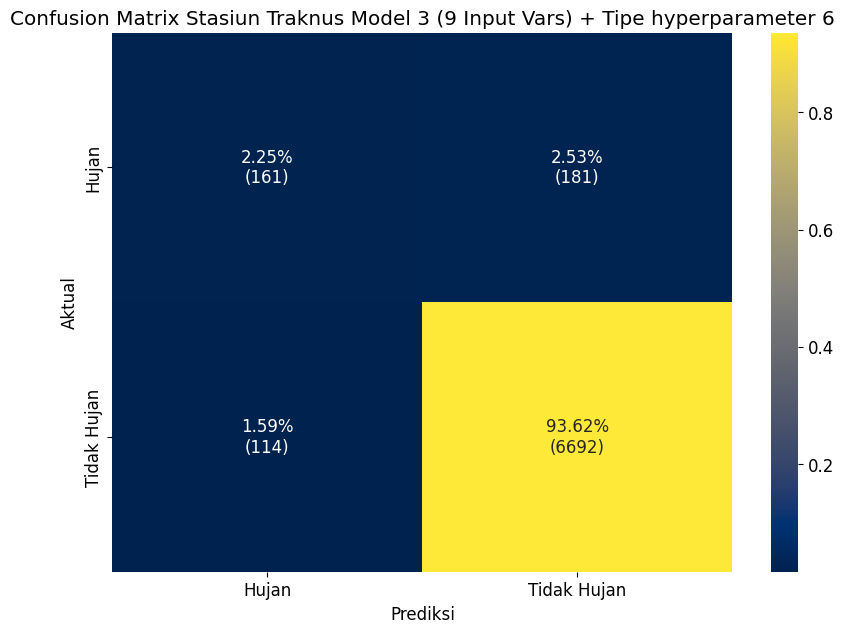

In [ ]:
# @title PLot Confusion Matrix Data Training
# Membuat DataFrame dari matriks kebingungan
df_cm = pd.DataFrame(c_matrix, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Menghitung persentase untuk setiap kelas dalam matriks kebingungan
c_matrix_percentage = c_matrix / np.sum(c_matrix)

# Membuat DataFrame dari matriks kebingungan persentase
df_cm_percentage = pd.DataFrame(c_matrix_percentage, index=['Hujan', 'Tidak Hujan'], columns=['Hujan', 'Tidak Hujan'])

# Membuat anotasi baru dengan jumlah dan persentase
annotations = df_cm_percentage.applymap(lambda x: '{:.2%}'.format(x)) + '\n(' + df_cm.astype(str) + ')'

# Membuat heatmap dari DataFrame
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_percentage, annot=annotations, fmt='', cmap='cividis')
plt.title('Confusion Matrix Stasiun Traknus Model 3 (9 Input Vars) + Tipe hyperparameter 6')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()